In [1]:
import sys
sys.path.insert(0, '/home/christo/notebooks/christo/prod/')
sys.path.insert(0, '/home/christo/notebooks/christo/company_maintenance_scripts/')
import re
import pandas as pd
from NedbankSpendPy import  client
import time
from datetime import datetime 

In [2]:
import numpy as np

In [3]:
import subprocess

In [4]:
from nedbank_companies_addition_lib import maxindexfn, mongo_regex_searchstring
from nedbank_companies_addition_lib import nedbankcompany_class_check, classlookupfn, input_dict_fn, mongo_regex_searchstring_row
from nedbank_companies_addition_lib import  nedbank_companies_db, regex_searchstring

In [5]:
collectionname='aggregated_company_spend'

#### Look at all available extracted_date tags, choose one.

In [6]:
list(client.lookups[collectionname].distinct('extracted_date'))

['20200225', '20200407', '20200408']

#### set the extracted date string here:

In [7]:
extracted_date='20200407'

#### Extract all entries pertaining to THAT extracted date:

In [8]:
df=pd.DataFrame(list(client.lookups[collectionname].find({'extracted_date':extracted_date})))

In [9]:
df.head()

,Seg_L2_Num,Seg_L2_STR,_id,amount_201801,amount_201802,amount_201803,amount_201804,amount_201805,amount_201806,amount_201807,...,n_uniqueclients_201903,n_uniqueclients_201904,n_uniqueclients_201905,n_uniqueclients_201906,n_uniqueclients_201907,n_uniqueclients_201908,n_uniqueclients_201909,n_uniqueclients_201910,n_uniqueclients_201911,n_uniqueclients_201912
0,121.0,Business Banking,5e8c85b50ef767d028613d71,-530.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32.0,CB - PBCVM - Middle Market,5e8c85b50ef767d028613d72,-10320.7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,61.0,ESTABLISHED,5e8c85b50ef767d028613d73,-1480.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,22.0,PB - Gold,5e8c85b50ef767d028613d74,-9919.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.0,PB - Platinum,5e8c85b50ef767d028613d75,-5934.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Save the dataframe to a \*.csv file

In [ ]:
df.to_csv(path_or_buf='/home/christo/data/aggregated_company_spend_{extracted_date}.csv'.format(extracted_date=extracted_date), index = False)

In [ ]:
zip_command = subprocess.run(["zip", 
                             '/home/christo/data/aggregated_company_spend_{extracted_date}.zip'.format(extracted_date=extracted_date),
                            '/home/christo/data/aggregated_company_spend_{extracted_date}.csv'.format(extracted_date=extracted_date)])

#### Create *.zip file to copy to a local drive:

In [ ]:
print('zip file name equals: ','/home/christo/data/aggregated_company_spend_{extracted_date}.zip'.format(extracted_date=extracted_date))

In [ ]:
print(len(df.companyname),len(set(df.companyname)))

In [ ]:
len(np.where(df.amount_201803.notnull())[0])

In [12]:
cols=list(df)

In [13]:
# n_uniqueclients_201909
client_cols=[]
for col in cols:
#     print(col[:6])
    if col[:6]=='n_uniq':
        client_cols.append(col)

In [14]:
count_cols=[]
for col in cols:
#     print(col[:6])
    if col[:6]=='count_':
        count_cols.append(col)

In [15]:
amount_cols=[]
for col in cols:
#     print(col[:7])
    if col[:7]=='amount_':
        amount_cols.append(col)

In [16]:
count_cols

['count_201801',
 'count_201802',
 'count_201803',
 'count_201804',
 'count_201805',
 'count_201806',
 'count_201807',
 'count_201808',
 'count_201809',
 'count_201810',
 'count_201811',
 'count_201812',
 'count_201901',
 'count_201902',
 'count_201903',
 'count_201904',
 'count_201905',
 'count_201906',
 'count_201907',
 'count_201908',
 'count_201909',
 'count_201910',
 'count_201911',
 'count_201912']

In [20]:
list(df)

['Seg_L2_Num',
 'Seg_L2_STR',
 '_id',
 'amount_201801',
 'amount_201802',
 'amount_201803',
 'amount_201804',
 'amount_201805',
 'amount_201806',
 'amount_201807',
 'amount_201808',
 'amount_201809',
 'amount_201810',
 'amount_201811',
 'amount_201812',
 'amount_201901',
 'amount_201902',
 'amount_201903',
 'amount_201904',
 'amount_201905',
 'amount_201906',
 'amount_201907',
 'amount_201908',
 'amount_201909',
 'amount_201910',
 'amount_201911',
 'amount_201912',
 'companyindex',
 'companyname',
 'count_201801',
 'count_201802',
 'count_201803',
 'count_201804',
 'count_201805',
 'count_201806',
 'count_201807',
 'count_201808',
 'count_201809',
 'count_201810',
 'count_201811',
 'count_201812',
 'count_201901',
 'count_201902',
 'count_201903',
 'count_201904',
 'count_201905',
 'count_201906',
 'count_201907',
 'count_201908',
 'count_201909',
 'count_201910',
 'count_201911',
 'count_201912',
 'extracted_date',
 'n_uniqueclients_201801',
 'n_uniqueclients_201802',
 'n_uniqueclient

In [26]:
list(temp0_df)

['amount_201801',
 'n_uniqueclients_201801',
 'count_201801',
 'companyname',
 'Seg_L2_STR']

In [24]:
set(list(df))-set(list(count_cols))-set(list(amount_cols))-set(list(client_cols))

{'Seg_L2_Num',
 'Seg_L2_STR',
 '_id',
 'companyindex',
 'companyname',
 'extracted_date'}

In [36]:
ind=0
amount_col=amount_cols[ind]
client_col=client_cols[ind]
count_col=count_cols[ind]
inds=np.where(df[amount_col].notnull())[0]
temp0_df=df.loc[inds,[amount_col,client_col,count_col, 'companyname','Seg_L2_STR','Seg_L2_Num']].copy()
temp0_df.set_index(['companyname','Seg_L2_Num'], inplace=True)

In [37]:
ind=1
amount_col=amount_cols[ind]
client_col=client_cols[ind]
count_col=count_cols[ind]
inds=np.where(df[amount_col].notnull())[0]
temp1_df=df.loc[inds,[amount_col,client_col,count_col, 'companyname','Seg_L2_STR','Seg_L2_Num']].copy()
temp1_df.set_index(['companyname','Seg_L2_Num'], inplace=True)

In [38]:
list(temp0_df)

['amount_201801', 'n_uniqueclients_201801', 'count_201801', 'Seg_L2_STR']

The following is for a strictly company aggregattion:

In [41]:
ind=0
amount_col=amount_cols[ind]
client_col=client_cols[ind]
count_col=count_cols[ind]
inds=np.where(df[amount_col].notnull())[0]
temp0_df=df.loc[inds,[amount_col,client_col,count_col, 'companyname','Seg_L2_STR','Seg_L2_Num']].copy()
temp0_df.set_index(['companyname','Seg_L2_Num'], inplace=True)
gf=pd.DataFrame(index=temp0_df.index)
gf

Empty DataFrame
Columns: []
Index: [(54 ON BATH, 121.0), (54 ON BATH, 32.0), (54 ON BATH, 61.0), (54 ON BATH, 22.0), (54 ON BATH, 21.0), (ABSOLUTE PETS, 1.0), (ABSOLUTE PETS, 121.0), (ABSOLUTE PETS, 42.0), (ABSOLUTE PETS, 41.0), (ABSOLUTE PETS, 31.0), (ABSOLUTE PETS, 31.0), (ABSOLUTE PETS, 32.0), (ABSOLUTE PETS, 33.0), (ABSOLUTE PETS, 30.0), (ABSOLUTE PETS, 61.0), (ABSOLUTE PETS, 28.0), (ABSOLUTE PETS, 24.0), (ABSOLUTE PETS, 23.0), (ABSOLUTE PETS, 22.0), (ABSOLUTE PETS, 21.0), (ABSOLUTE PETS, 29.0), (ABSOLUTE PETS, 62.0), (ACCESSORIZE, 1.0), (ACCESSORIZE, 121.0), (ACCESSORIZE, 41.0), (ACCESSORIZE, 31.0), (ACCESSORIZE, 31.0), (ACCESSORIZE, 32.0), (ACCESSORIZE, 33.0), (ACCESSORIZE, 61.0), (ACCESSORIZE, 28.0), (ACCESSORIZE, 22.0), (ACCESSORIZE, 21.0), (ACCESSORIZE, 29.0), (ACCESSORIZE, 62.0), (ACKERMANS, 1.0), (ACKERMANS, 121.0), (ACKERMANS, 42.0), (ACKERMANS, 41.0), (ACKERMANS, 31.0), (ACKERMANS, 31.0), (ACKERMANS, 32.0), (ACKERMANS, 33.0), (ACKERMANS, 30.0), (ACKERMANS, 131.0), (ACKERMANS, 61.0), (ACKERMANS, 63.0), (ACKERMANS, 141.0), (ACKERMANS, 999.0), (ACKERMANS, 28.0), (ACKERMANS, 24.0), (ACKERMANS, 23.0), (ACKERMANS, 22.0), (ACKERMANS, 25.0), (ACKERMANS, 21.0), (ACKERMANS, 29.0), (ACKERMANS, 62.0), (ACSA, 1.0), (ACSA, 121.0), (ACSA, 42.0), (ACSA, 41.0), (ACSA, 31.0), (ACSA, 31.0), (ACSA, 32.0), (ACSA, 33.0), (ACSA, 30.0), (ACSA, 131.0), (ACSA, 61.0), (ACSA, 28.0), (ACSA, 24.0), (ACSA, 23.0), (ACSA, 22.0), (ACSA, 25.0), (ACSA, 21.0), (ACSA, 29.0), (ACSA, 62.0), (ADIDAS, 1.0), (ADIDAS, 121.0), (ADIDAS, 42.0), (ADIDAS, 41.0), (ADIDAS, 31.0), (ADIDAS, 31.0), (ADIDAS, 32.0), (ADIDAS, 33.0), (ADIDAS, 30.0), (ADIDAS, 61.0), (ADIDAS, 63.0), (ADIDAS, 28.0), (ADIDAS, 24.0), (ADIDAS, 23.0), (ADIDAS, 22.0), (ADIDAS, 21.0), (ADIDAS, 29.0), (ADIDAS, 62.0), (AFRIHOST, 1.0), (AFRIHOST, 121.0), (AFRIHOST, 42.0), (AFRIHOST, 41.0), (AFRIHOST, 31.0), (AFRIHOST, 31.0), ...]

[4908 rows x 0 columns]

In [60]:
df.shape

(118481, 78)

In [61]:
ind=0
gf=[]
temp_df=[]
amount_col=amount_cols[ind]
client_col=client_cols[ind]
count_col=count_cols[ind]
inds=np.where(df[amount_col].notnull())[0]
temp0_df=df.loc[inds,[amount_col,client_col,count_col, 'companyname','Seg_L2_STR','Seg_L2_Num']].copy()
# temp0_df.set_index(['companyname','Seg_L2_Num'], inplace=True)
gf=temp0_df.copy()
for amount_col,client_col,count_col in zip(amount_cols,client_cols,count_cols):
    print(amount_col,client_col,count_col)
    inds=np.where(df[amount_col].notnull())[0]
    temp_df=df.loc[inds,[amount_col,client_col,count_col, 'companyname','Seg_L2_STR','Seg_L2_Num']].copy()
#     temp_df.set_index(['companyname','Seg_L2_Num'], inplace=True)
    gf=gf.merge(temp_df, left_on=['companyname','Seg_L2_STR','Seg_L2_Num'], right_on=['companyname','Seg_L2_STR','Seg_L2_Num'], how='outer')
#     gf=gf.merge(temp_df, left_index=True, right_index=True, how='outer')
    print(' temp_df size: ',temp_df.shape, ', gf size: ',gf.shape,' -------------------------------------------')

amount_201801 n_uniqueclients_201801 count_201801
 temp_df size:  (4908, 6) , gf size:  (4908, 9)  -------------------------------------------
amount_201802 n_uniqueclients_201802 count_201802
 temp_df size:  (4840, 6) , gf size:  (5205, 12)  -------------------------------------------
amount_201803 n_uniqueclients_201803 count_201803
 temp_df size:  (4967, 6) , gf size:  (5425, 15)  -------------------------------------------
amount_201804 n_uniqueclients_201804 count_201804
 temp_df size:  (4943, 6) , gf size:  (5560, 18)  -------------------------------------------
amount_201805 n_uniqueclients_201805 count_201805
 temp_df size:  (4972, 6) , gf size:  (5661, 21)  -------------------------------------------
amount_201806 n_uniqueclients_201806 count_201806
 temp_df size:  (4943, 6) , gf size:  (5730, 24)  -------------------------------------------
amount_201807 n_uniqueclients_201807 count_201807
 temp_df size:  (4963, 6) , gf size:  (5818, 27)  -------------------------------------

In [62]:
list(gf)

['amount_201801_x',
 'n_uniqueclients_201801_x',
 'count_201801_x',
 'companyname',
 'Seg_L2_STR',
 'Seg_L2_Num',
 'amount_201801_y',
 'n_uniqueclients_201801_y',
 'count_201801_y',
 'amount_201802',
 'n_uniqueclients_201802',
 'count_201802',
 'amount_201803',
 'n_uniqueclients_201803',
 'count_201803',
 'amount_201804',
 'n_uniqueclients_201804',
 'count_201804',
 'amount_201805',
 'n_uniqueclients_201805',
 'count_201805',
 'amount_201806',
 'n_uniqueclients_201806',
 'count_201806',
 'amount_201807',
 'n_uniqueclients_201807',
 'count_201807',
 'amount_201808',
 'n_uniqueclients_201808',
 'count_201808',
 'amount_201809',
 'n_uniqueclients_201809',
 'count_201809',
 'amount_201810',
 'n_uniqueclients_201810',
 'count_201810',
 'amount_201811',
 'n_uniqueclients_201811',
 'count_201811',
 'amount_201812',
 'n_uniqueclients_201812',
 'count_201812',
 'amount_201901',
 'n_uniqueclients_201901',
 'count_201901',
 'amount_201902',
 'n_uniqueclients_201902',
 'count_201902',
 'amount_201

In [63]:
gf.drop(['amount_201801_y',
 'n_uniqueclients_201801_y',
 'count_201801_y',], axis=1, inplace=True)
gf.drop(['amount_201801_x',
 'n_uniqueclients_201801_x',
 'count_201801_x',], axis=1, inplace=True)

In [68]:
amount_cols.remove('amount_201801')

In [64]:
gf.to_csv(path_or_buf='/home/christo/data/company_segment_aggregation.csv', index=False)

In [75]:
# missing values by column:

In [74]:
gf.isnull().sum()

companyname                  0
Seg_L2_STR                   0
Seg_L2_Num                   0
amount_201802             1476
n_uniqueclients_201802    1476
count_201802              1476
amount_201803             1349
n_uniqueclients_201803    1349
count_201803              1349
amount_201804             1357
n_uniqueclients_201804    1357
count_201804              1357
amount_201805             1344
n_uniqueclients_201805    1344
count_201805              1344
amount_201806             1385
n_uniqueclients_201806    1385
count_201806              1385
amount_201807             1358
n_uniqueclients_201807    1358
count_201807              1358
amount_201808             1341
n_uniqueclients_201808    1341
count_201808              1341
amount_201809             1393
n_uniqueclients_201809    1393
count_201809              1393
amount_201810             1348
n_uniqueclients_201810    1348
count_201810              1348
                          ... 
amount_201903             1349
n_unique

In [78]:
gf.set_index(['companyname','Seg_L2_Num','Seg_L2_STR'])

amount_201802  \
companyname        Seg_L2_Num Seg_L2_STR                                    
54 ON BATH         121.0      Business Banking                        NaN   
                   32.0       CB - PBCVM - Middle Market        -44427.00   
                   61.0       ESTABLISHED                       -26214.35   
                   22.0       PB - Gold                          -7210.80   
                   21.0       PB - Platinum                      -7426.30   
ABSOLUTE PETS      1.0        BOE                              -108219.61   
                   121.0      Business Banking                  -88828.36   
                   42.0       CB - Other - Non-Individuals        -312.50   
                   41.0       CB - Other - Non-Residents         -5060.50   
                   31.0       CB - PBCVM - Mass Market           -7030.20   
                              CB - PBCVM - Mass Market           -4478.75   
                   32.0       CB - PBCVM - Middle Market       -698516.44   
                   33.0       CB - PBCVM - Youth                -17072.59   
                   30.0       CB - X-Clients                          NaN   
                   61.0       ESTABLISHED                      -142283.18   
                   28.0       PB - Acquisition                   -7562.50   
                   24.0       PB - Business Banking               -303.00   
                   23.0       PB - Exec Banking                  -4045.00   
                   22.0       PB - Gold                        -161387.07   
                   21.0       PB - Platinum                    -143360.60   
                   29.0       PB - UNDEFINED                    -47319.00   
                   62.0       PROFESSIONAL                      -22781.00   
ACCESSORIZE        1.0        BOE                                -9575.64   
                   121.0      Business Banking                   -5405.00   
                   41.0       CB - Other - Non-Residents         -3157.00   
                   31.0       CB - PBCVM - Mass Market           -8619.90   
                              CB - PBCVM - Mass Market           -2434.70   
                   32.0       CB - PBCVM - Middle Market       -105832.50   
                   33.0       CB - PBCVM - Youth                 -8552.20   
                   61.0       ESTABLISHED                       -17040.00   
...                                                                   ...   
PIZZA HUT          27.0       PB - Legal                              NaN   
RIVERSIDE          131.0      Corporate                               NaN   
ROMANS PIZZA       40.0       CB - OTHER - X-CLIENTS                  NaN   
SUN CITY           30.0       CB - X-Clients                          NaN   
                   23.0       PB - Exec Banking                       NaN   
THE CAROUSEL       24.0       PB - Business Banking                   NaN   
TUGELA TOLL PLAZA  27.0       PB - Legal                              NaN   
TYRES & MORE       131.0      Corporate                               NaN   
VIDA E CAFFE       27.0       PB - Legal                              NaN   
WILGE TOLL PLAZA   27.0       PB - Legal                              NaN   
YUPPIECHEF         999.0      Other                                   NaN   
ABSOLUTE PETS      27.0       PB - Legal                              NaN   
BOLT               27.0       PB - Legal                              NaN   
CABANAS            999.0      Other                                   NaN   
CAROUSEL HOTEL     21.0       PB - Platinum                           NaN   
CHESTER BUTCHER    27.0       PB - Legal                              NaN   
CORICRAFT          27.0       PB - Legal                              NaN   
EDGARS ACTIVE      42.0       CB - Other - Non-Individuals            NaN   
ETIHAD             27.0       PB - Legal                              NaN   
INTERNET SOLUTIONS 131.0      Corporate                 

In [82]:
nansums=np.zeros(len(gf.index))

In [84]:
# nanarray
for i in range(len(gf.index)) :
    print("Nan in row ", i , " : " ,  gf.iloc[i].isnull().sum())
    nansums[i]=gf.iloc[i].isnull().sum()

Nan in row  0  :  9
Nan in row  1  :  0
Nan in row  2  :  18
Nan in row  3  :  15
Nan in row  4  :  0
Nan in row  5  :  0
Nan in row  6  :  0
Nan in row  7  :  42
Nan in row  8  :  0
Nan in row  9  :  0
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  54
Nan in row  14  :  0
Nan in row  15  :  0
Nan in row  16  :  0
Nan in row  17  :  0
Nan in row  18  :  0
Nan in row  19  :  0
Nan in row  20  :  0
Nan in row  21  :  0
Nan in row  22  :  0
Nan in row  23  :  0
Nan in row  24  :  18
Nan in row  25  :  3
Nan in row  26  :  12
Nan in row  27  :  0
Nan in row  28  :  0
Nan in row  29  :  0
Nan in row  30  :  48
Nan in row  31  :  0
Nan in row  32  :  0
Nan in row  33  :  0
Nan in row  34  :  3
Nan in row  35  :  0
Nan in row  36  :  0
Nan in row  37  :  0
Nan in row  38  :  0
Nan in row  39  :  0
Nan in row  40  :  0
Nan in row  41  :  0
Nan in row  42  :  0
Nan in row  43  :  0
Nan in row  44  :  9
Nan in row  45  :  0
Nan in row  46  :  0
Nan in row  47  

Nan in row  483  :  0
Nan in row  484  :  0
Nan in row  485  :  0
Nan in row  486  :  0
Nan in row  487  :  0
Nan in row  488  :  0
Nan in row  489  :  0
Nan in row  490  :  0
Nan in row  491  :  0
Nan in row  492  :  0
Nan in row  493  :  0
Nan in row  494  :  0
Nan in row  495  :  0
Nan in row  496  :  0
Nan in row  497  :  0
Nan in row  498  :  0
Nan in row  499  :  0
Nan in row  500  :  0
Nan in row  501  :  30
Nan in row  502  :  6
Nan in row  503  :  0
Nan in row  504  :  0
Nan in row  505  :  0
Nan in row  506  :  0
Nan in row  507  :  0
Nan in row  508  :  0
Nan in row  509  :  0
Nan in row  510  :  0
Nan in row  511  :  0
Nan in row  512  :  0
Nan in row  513  :  0
Nan in row  514  :  0
Nan in row  515  :  0
Nan in row  516  :  0
Nan in row  517  :  0
Nan in row  518  :  0
Nan in row  519  :  0
Nan in row  520  :  0
Nan in row  521  :  0
Nan in row  522  :  0
Nan in row  523  :  39
Nan in row  524  :  0
Nan in row  525  :  0
Nan in row  526  :  0
Nan in row  527  :  0
Nan in r

Nan in row  1015  :  0
Nan in row  1016  :  0
Nan in row  1017  :  0
Nan in row  1018  :  0
Nan in row  1019  :  0
Nan in row  1020  :  0
Nan in row  1021  :  0
Nan in row  1022  :  0
Nan in row  1023  :  0
Nan in row  1024  :  0
Nan in row  1025  :  0
Nan in row  1026  :  0
Nan in row  1027  :  0
Nan in row  1028  :  0
Nan in row  1029  :  0
Nan in row  1030  :  0
Nan in row  1031  :  0
Nan in row  1032  :  0
Nan in row  1033  :  0
Nan in row  1034  :  0
Nan in row  1035  :  0
Nan in row  1036  :  0
Nan in row  1037  :  0
Nan in row  1038  :  0
Nan in row  1039  :  0
Nan in row  1040  :  0
Nan in row  1041  :  0
Nan in row  1042  :  0
Nan in row  1043  :  0
Nan in row  1044  :  0
Nan in row  1045  :  0
Nan in row  1046  :  0
Nan in row  1047  :  0
Nan in row  1048  :  0
Nan in row  1049  :  0
Nan in row  1050  :  0
Nan in row  1051  :  0
Nan in row  1052  :  0
Nan in row  1053  :  0
Nan in row  1054  :  0
Nan in row  1055  :  0
Nan in row  1056  :  0
Nan in row  1057  :  0
Nan in row 

Nan in row  1535  :  0
Nan in row  1536  :  0
Nan in row  1537  :  0
Nan in row  1538  :  0
Nan in row  1539  :  0
Nan in row  1540  :  0
Nan in row  1541  :  0
Nan in row  1542  :  0
Nan in row  1543  :  0
Nan in row  1544  :  0
Nan in row  1545  :  0
Nan in row  1546  :  0
Nan in row  1547  :  0
Nan in row  1548  :  0
Nan in row  1549  :  0
Nan in row  1550  :  0
Nan in row  1551  :  0
Nan in row  1552  :  0
Nan in row  1553  :  0
Nan in row  1554  :  0
Nan in row  1555  :  0
Nan in row  1556  :  0
Nan in row  1557  :  0
Nan in row  1558  :  0
Nan in row  1559  :  0
Nan in row  1560  :  0
Nan in row  1561  :  0
Nan in row  1562  :  0
Nan in row  1563  :  0
Nan in row  1564  :  0
Nan in row  1565  :  0
Nan in row  1566  :  0
Nan in row  1567  :  0
Nan in row  1568  :  0
Nan in row  1569  :  0
Nan in row  1570  :  0
Nan in row  1571  :  0
Nan in row  1572  :  0
Nan in row  1573  :  0
Nan in row  1574  :  0
Nan in row  1575  :  0
Nan in row  1576  :  0
Nan in row  1577  :  0
Nan in row 

Nan in row  2063  :  0
Nan in row  2064  :  0
Nan in row  2065  :  0
Nan in row  2066  :  0
Nan in row  2067  :  0
Nan in row  2068  :  0
Nan in row  2069  :  0
Nan in row  2070  :  0
Nan in row  2071  :  0
Nan in row  2072  :  0
Nan in row  2073  :  0
Nan in row  2074  :  0
Nan in row  2075  :  0
Nan in row  2076  :  0
Nan in row  2077  :  0
Nan in row  2078  :  0
Nan in row  2079  :  0
Nan in row  2080  :  0
Nan in row  2081  :  0
Nan in row  2082  :  0
Nan in row  2083  :  0
Nan in row  2084  :  0
Nan in row  2085  :  0
Nan in row  2086  :  0
Nan in row  2087  :  0
Nan in row  2088  :  0
Nan in row  2089  :  0
Nan in row  2090  :  0
Nan in row  2091  :  0
Nan in row  2092  :  0
Nan in row  2093  :  0
Nan in row  2094  :  0
Nan in row  2095  :  0
Nan in row  2096  :  0
Nan in row  2097  :  0
Nan in row  2098  :  0
Nan in row  2099  :  0
Nan in row  2100  :  0
Nan in row  2101  :  0
Nan in row  2102  :  0
Nan in row  2103  :  0
Nan in row  2104  :  0
Nan in row  2105  :  0
Nan in row 

Nan in row  2564  :  0
Nan in row  2565  :  0
Nan in row  2566  :  0
Nan in row  2567  :  0
Nan in row  2568  :  0
Nan in row  2569  :  0
Nan in row  2570  :  0
Nan in row  2571  :  0
Nan in row  2572  :  0
Nan in row  2573  :  0
Nan in row  2574  :  0
Nan in row  2575  :  0
Nan in row  2576  :  0
Nan in row  2577  :  0
Nan in row  2578  :  0
Nan in row  2579  :  0
Nan in row  2580  :  0
Nan in row  2581  :  0
Nan in row  2582  :  0
Nan in row  2583  :  0
Nan in row  2584  :  0
Nan in row  2585  :  0
Nan in row  2586  :  0
Nan in row  2587  :  0
Nan in row  2588  :  0
Nan in row  2589  :  0
Nan in row  2590  :  0
Nan in row  2591  :  0
Nan in row  2592  :  0
Nan in row  2593  :  0
Nan in row  2594  :  0
Nan in row  2595  :  0
Nan in row  2596  :  0
Nan in row  2597  :  0
Nan in row  2598  :  0
Nan in row  2599  :  0
Nan in row  2600  :  0
Nan in row  2601  :  0
Nan in row  2602  :  0
Nan in row  2603  :  0
Nan in row  2604  :  0
Nan in row  2605  :  0
Nan in row  2606  :  0
Nan in row 

Nan in row  3050  :  0
Nan in row  3051  :  0
Nan in row  3052  :  0
Nan in row  3053  :  0
Nan in row  3054  :  0
Nan in row  3055  :  0
Nan in row  3056  :  0
Nan in row  3057  :  0
Nan in row  3058  :  0
Nan in row  3059  :  0
Nan in row  3060  :  0
Nan in row  3061  :  0
Nan in row  3062  :  0
Nan in row  3063  :  0
Nan in row  3064  :  0
Nan in row  3065  :  0
Nan in row  3066  :  0
Nan in row  3067  :  0
Nan in row  3068  :  0
Nan in row  3069  :  0
Nan in row  3070  :  0
Nan in row  3071  :  0
Nan in row  3072  :  0
Nan in row  3073  :  0
Nan in row  3074  :  0
Nan in row  3075  :  0
Nan in row  3076  :  0
Nan in row  3077  :  0
Nan in row  3078  :  0
Nan in row  3079  :  0
Nan in row  3080  :  0
Nan in row  3081  :  0
Nan in row  3082  :  0
Nan in row  3083  :  0
Nan in row  3084  :  0
Nan in row  3085  :  0
Nan in row  3086  :  0
Nan in row  3087  :  0
Nan in row  3088  :  0
Nan in row  3089  :  0
Nan in row  3090  :  0
Nan in row  3091  :  0
Nan in row  3092  :  0
Nan in row 

Nan in row  3537  :  0
Nan in row  3538  :  0
Nan in row  3539  :  0
Nan in row  3540  :  0
Nan in row  3541  :  0
Nan in row  3542  :  0
Nan in row  3543  :  0
Nan in row  3544  :  0
Nan in row  3545  :  0
Nan in row  3546  :  0
Nan in row  3547  :  0
Nan in row  3548  :  0
Nan in row  3549  :  0
Nan in row  3550  :  0
Nan in row  3551  :  0
Nan in row  3552  :  0
Nan in row  3553  :  0
Nan in row  3554  :  0
Nan in row  3555  :  0
Nan in row  3556  :  0
Nan in row  3557  :  0
Nan in row  3558  :  0
Nan in row  3559  :  0
Nan in row  3560  :  0
Nan in row  3561  :  0
Nan in row  3562  :  0
Nan in row  3563  :  0
Nan in row  3564  :  0
Nan in row  3565  :  0
Nan in row  3566  :  0
Nan in row  3567  :  0
Nan in row  3568  :  0
Nan in row  3569  :  0
Nan in row  3570  :  0
Nan in row  3571  :  0
Nan in row  3572  :  0
Nan in row  3573  :  0
Nan in row  3574  :  0
Nan in row  3575  :  0
Nan in row  3576  :  0
Nan in row  3577  :  0
Nan in row  3578  :  0
Nan in row  3579  :  0
Nan in row 

Nan in row  4048  :  0
Nan in row  4049  :  0
Nan in row  4050  :  0
Nan in row  4051  :  0
Nan in row  4052  :  0
Nan in row  4053  :  0
Nan in row  4054  :  0
Nan in row  4055  :  0
Nan in row  4056  :  0
Nan in row  4057  :  0
Nan in row  4058  :  0
Nan in row  4059  :  0
Nan in row  4060  :  0
Nan in row  4061  :  0
Nan in row  4062  :  0
Nan in row  4063  :  0
Nan in row  4064  :  0
Nan in row  4065  :  0
Nan in row  4066  :  0
Nan in row  4067  :  0
Nan in row  4068  :  0
Nan in row  4069  :  0
Nan in row  4070  :  0
Nan in row  4071  :  0
Nan in row  4072  :  0
Nan in row  4073  :  0
Nan in row  4074  :  0
Nan in row  4075  :  0
Nan in row  4076  :  0
Nan in row  4077  :  0
Nan in row  4078  :  0
Nan in row  4079  :  0
Nan in row  4080  :  0
Nan in row  4081  :  0
Nan in row  4082  :  0
Nan in row  4083  :  0
Nan in row  4084  :  0
Nan in row  4085  :  0
Nan in row  4086  :  0
Nan in row  4087  :  0
Nan in row  4088  :  0
Nan in row  4089  :  0
Nan in row  4090  :  0
Nan in row 

Nan in row  4525  :  0
Nan in row  4526  :  0
Nan in row  4527  :  0
Nan in row  4528  :  0
Nan in row  4529  :  0
Nan in row  4530  :  0
Nan in row  4531  :  0
Nan in row  4532  :  0
Nan in row  4533  :  0
Nan in row  4534  :  0
Nan in row  4535  :  0
Nan in row  4536  :  0
Nan in row  4537  :  0
Nan in row  4538  :  0
Nan in row  4539  :  0
Nan in row  4540  :  0
Nan in row  4541  :  0
Nan in row  4542  :  0
Nan in row  4543  :  0
Nan in row  4544  :  0
Nan in row  4545  :  0
Nan in row  4546  :  0
Nan in row  4547  :  0
Nan in row  4548  :  0
Nan in row  4549  :  0
Nan in row  4550  :  0
Nan in row  4551  :  0
Nan in row  4552  :  0
Nan in row  4553  :  0
Nan in row  4554  :  0
Nan in row  4555  :  0
Nan in row  4556  :  0
Nan in row  4557  :  0
Nan in row  4558  :  0
Nan in row  4559  :  0
Nan in row  4560  :  0
Nan in row  4561  :  0
Nan in row  4562  :  0
Nan in row  4563  :  0
Nan in row  4564  :  0
Nan in row  4565  :  0
Nan in row  4566  :  0
Nan in row  4567  :  0
Nan in row 

Nan in row  5053  :  0
Nan in row  5054  :  0
Nan in row  5055  :  0
Nan in row  5056  :  0
Nan in row  5057  :  0
Nan in row  5058  :  0
Nan in row  5059  :  0
Nan in row  5060  :  0
Nan in row  5061  :  0
Nan in row  5062  :  0
Nan in row  5063  :  0
Nan in row  5064  :  0
Nan in row  5065  :  0
Nan in row  5066  :  0
Nan in row  5067  :  0
Nan in row  5068  :  0
Nan in row  5069  :  0
Nan in row  5070  :  0
Nan in row  5071  :  0
Nan in row  5072  :  0
Nan in row  5073  :  0
Nan in row  5074  :  0
Nan in row  5075  :  0
Nan in row  5076  :  0
Nan in row  5077  :  0
Nan in row  5078  :  0
Nan in row  5079  :  0
Nan in row  5080  :  0
Nan in row  5081  :  0
Nan in row  5082  :  0
Nan in row  5083  :  0
Nan in row  5084  :  0
Nan in row  5085  :  0
Nan in row  5086  :  0
Nan in row  5087  :  0
Nan in row  5088  :  0
Nan in row  5089  :  0
Nan in row  5090  :  0
Nan in row  5091  :  0
Nan in row  5092  :  0
Nan in row  5093  :  0
Nan in row  5094  :  0
Nan in row  5095  :  0
Nan in row 

Nan in row  5528  :  0
Nan in row  5529  :  0
Nan in row  5530  :  0
Nan in row  5531  :  0
Nan in row  5532  :  0
Nan in row  5533  :  0
Nan in row  5534  :  0
Nan in row  5535  :  0
Nan in row  5536  :  0
Nan in row  5537  :  0
Nan in row  5538  :  0
Nan in row  5539  :  0
Nan in row  5540  :  0
Nan in row  5541  :  0
Nan in row  5542  :  0
Nan in row  5543  :  0
Nan in row  5544  :  0
Nan in row  5545  :  0
Nan in row  5546  :  0
Nan in row  5547  :  0
Nan in row  5548  :  0
Nan in row  5549  :  0
Nan in row  5550  :  0
Nan in row  5551  :  0
Nan in row  5552  :  0
Nan in row  5553  :  0
Nan in row  5554  :  0
Nan in row  5555  :  0
Nan in row  5556  :  0
Nan in row  5557  :  0
Nan in row  5558  :  0
Nan in row  5559  :  0
Nan in row  5560  :  0
Nan in row  5561  :  0
Nan in row  5562  :  0
Nan in row  5563  :  0
Nan in row  5564  :  0
Nan in row  5565  :  0
Nan in row  5566  :  0
Nan in row  5567  :  0
Nan in row  5568  :  0
Nan in row  5569  :  0
Nan in row  5570  :  0
Nan in row 

Nan in row  6062  :  0
Nan in row  6063  :  0
Nan in row  6064  :  0
Nan in row  6065  :  0
Nan in row  6066  :  0
Nan in row  6067  :  0
Nan in row  6068  :  0
Nan in row  6069  :  0
Nan in row  6070  :  0
Nan in row  6071  :  0
Nan in row  6072  :  0
Nan in row  6073  :  0
Nan in row  6074  :  0
Nan in row  6075  :  0
Nan in row  6076  :  0
Nan in row  6077  :  0
Nan in row  6078  :  0
Nan in row  6079  :  0
Nan in row  6080  :  0
Nan in row  6081  :  0
Nan in row  6082  :  0
Nan in row  6083  :  0
Nan in row  6084  :  0
Nan in row  6085  :  0
Nan in row  6086  :  0
Nan in row  6087  :  0
Nan in row  6088  :  0
Nan in row  6089  :  0
Nan in row  6090  :  0
Nan in row  6091  :  0
Nan in row  6092  :  0
Nan in row  6093  :  0
Nan in row  6094  :  0
Nan in row  6095  :  0
Nan in row  6096  :  0
Nan in row  6097  :  0
Nan in row  6098  :  0
Nan in row  6099  :  0
Nan in row  6100  :  0
Nan in row  6101  :  0
Nan in row  6102  :  0
Nan in row  6103  :  0
Nan in row  6104  :  0
Nan in row 

Nan in row  6574  :  0
Nan in row  6575  :  0
Nan in row  6576  :  0
Nan in row  6577  :  0
Nan in row  6578  :  0
Nan in row  6579  :  0
Nan in row  6580  :  0
Nan in row  6581  :  0
Nan in row  6582  :  0
Nan in row  6583  :  0
Nan in row  6584  :  0
Nan in row  6585  :  0
Nan in row  6586  :  0
Nan in row  6587  :  0
Nan in row  6588  :  0
Nan in row  6589  :  0
Nan in row  6590  :  0
Nan in row  6591  :  0
Nan in row  6592  :  0
Nan in row  6593  :  0
Nan in row  6594  :  0
Nan in row  6595  :  0
Nan in row  6596  :  0
Nan in row  6597  :  0
Nan in row  6598  :  0
Nan in row  6599  :  0
Nan in row  6600  :  0
Nan in row  6601  :  0
Nan in row  6602  :  0
Nan in row  6603  :  0
Nan in row  6604  :  0
Nan in row  6605  :  0
Nan in row  6606  :  0
Nan in row  6607  :  0
Nan in row  6608  :  0
Nan in row  6609  :  0
Nan in row  6610  :  0
Nan in row  6611  :  0
Nan in row  6612  :  0
Nan in row  6613  :  0
Nan in row  6614  :  0
Nan in row  6615  :  0
Nan in row  6616  :  0
Nan in row 

Nan in row  7030  :  0
Nan in row  7031  :  0
Nan in row  7032  :  0
Nan in row  7033  :  0
Nan in row  7034  :  0
Nan in row  7035  :  0
Nan in row  7036  :  0
Nan in row  7037  :  0
Nan in row  7038  :  0
Nan in row  7039  :  0
Nan in row  7040  :  0
Nan in row  7041  :  0
Nan in row  7042  :  0
Nan in row  7043  :  0
Nan in row  7044  :  0
Nan in row  7045  :  0
Nan in row  7046  :  0
Nan in row  7047  :  0
Nan in row  7048  :  0
Nan in row  7049  :  0
Nan in row  7050  :  0
Nan in row  7051  :  0
Nan in row  7052  :  0
Nan in row  7053  :  0
Nan in row  7054  :  0
Nan in row  7055  :  0
Nan in row  7056  :  0
Nan in row  7057  :  0
Nan in row  7058  :  0
Nan in row  7059  :  0
Nan in row  7060  :  0
Nan in row  7061  :  0
Nan in row  7062  :  0
Nan in row  7063  :  0
Nan in row  7064  :  0
Nan in row  7065  :  0
Nan in row  7066  :  0
Nan in row  7067  :  0
Nan in row  7068  :  0
Nan in row  7069  :  0
Nan in row  7070  :  0
Nan in row  7071  :  0
Nan in row  7072  :  0
Nan in row 

Nan in row  7537  :  0
Nan in row  7538  :  0
Nan in row  7539  :  0
Nan in row  7540  :  0
Nan in row  7541  :  0
Nan in row  7542  :  0
Nan in row  7543  :  0
Nan in row  7544  :  0
Nan in row  7545  :  0
Nan in row  7546  :  0
Nan in row  7547  :  0
Nan in row  7548  :  0
Nan in row  7549  :  0
Nan in row  7550  :  0
Nan in row  7551  :  0
Nan in row  7552  :  0
Nan in row  7553  :  0
Nan in row  7554  :  0
Nan in row  7555  :  0
Nan in row  7556  :  0
Nan in row  7557  :  0
Nan in row  7558  :  0
Nan in row  7559  :  0
Nan in row  7560  :  0
Nan in row  7561  :  0
Nan in row  7562  :  0
Nan in row  7563  :  0
Nan in row  7564  :  0
Nan in row  7565  :  0
Nan in row  7566  :  0
Nan in row  7567  :  0
Nan in row  7568  :  0
Nan in row  7569  :  0
Nan in row  7570  :  0
Nan in row  7571  :  0
Nan in row  7572  :  0
Nan in row  7573  :  0
Nan in row  7574  :  0
Nan in row  7575  :  0
Nan in row  7576  :  0
Nan in row  7577  :  0
Nan in row  7578  :  0
Nan in row  7579  :  0
Nan in row 

Nan in row  8033  :  0
Nan in row  8034  :  0
Nan in row  8035  :  0
Nan in row  8036  :  0
Nan in row  8037  :  0
Nan in row  8038  :  0
Nan in row  8039  :  0
Nan in row  8040  :  0
Nan in row  8041  :  0
Nan in row  8042  :  0
Nan in row  8043  :  0
Nan in row  8044  :  0
Nan in row  8045  :  0
Nan in row  8046  :  0
Nan in row  8047  :  0
Nan in row  8048  :  0
Nan in row  8049  :  0
Nan in row  8050  :  0
Nan in row  8051  :  0
Nan in row  8052  :  0
Nan in row  8053  :  0
Nan in row  8054  :  0
Nan in row  8055  :  0
Nan in row  8056  :  0
Nan in row  8057  :  0
Nan in row  8058  :  0
Nan in row  8059  :  0
Nan in row  8060  :  0
Nan in row  8061  :  0
Nan in row  8062  :  0
Nan in row  8063  :  0
Nan in row  8064  :  0
Nan in row  8065  :  0
Nan in row  8066  :  0
Nan in row  8067  :  0
Nan in row  8068  :  0
Nan in row  8069  :  0
Nan in row  8070  :  0
Nan in row  8071  :  0
Nan in row  8072  :  0
Nan in row  8073  :  0
Nan in row  8074  :  0
Nan in row  8075  :  0
Nan in row 

Nan in row  8542  :  0
Nan in row  8543  :  0
Nan in row  8544  :  0
Nan in row  8545  :  0
Nan in row  8546  :  0
Nan in row  8547  :  0
Nan in row  8548  :  0
Nan in row  8549  :  0
Nan in row  8550  :  0
Nan in row  8551  :  0
Nan in row  8552  :  0
Nan in row  8553  :  0
Nan in row  8554  :  0
Nan in row  8555  :  0
Nan in row  8556  :  0
Nan in row  8557  :  0
Nan in row  8558  :  0
Nan in row  8559  :  0
Nan in row  8560  :  0
Nan in row  8561  :  0
Nan in row  8562  :  0
Nan in row  8563  :  0
Nan in row  8564  :  0
Nan in row  8565  :  0
Nan in row  8566  :  0
Nan in row  8567  :  0
Nan in row  8568  :  0
Nan in row  8569  :  0
Nan in row  8570  :  0
Nan in row  8571  :  0
Nan in row  8572  :  0
Nan in row  8573  :  0
Nan in row  8574  :  0
Nan in row  8575  :  0
Nan in row  8576  :  0
Nan in row  8577  :  0
Nan in row  8578  :  0
Nan in row  8579  :  0
Nan in row  8580  :  0
Nan in row  8581  :  0
Nan in row  8582  :  0
Nan in row  8583  :  0
Nan in row  8584  :  0
Nan in row 

Nan in row  9082  :  0
Nan in row  9083  :  0
Nan in row  9084  :  0
Nan in row  9085  :  0
Nan in row  9086  :  0
Nan in row  9087  :  0
Nan in row  9088  :  0
Nan in row  9089  :  0
Nan in row  9090  :  0
Nan in row  9091  :  0
Nan in row  9092  :  0
Nan in row  9093  :  0
Nan in row  9094  :  0
Nan in row  9095  :  0
Nan in row  9096  :  0
Nan in row  9097  :  0
Nan in row  9098  :  0
Nan in row  9099  :  0
Nan in row  9100  :  0
Nan in row  9101  :  0
Nan in row  9102  :  0
Nan in row  9103  :  0
Nan in row  9104  :  0
Nan in row  9105  :  0
Nan in row  9106  :  0
Nan in row  9107  :  0
Nan in row  9108  :  0
Nan in row  9109  :  0
Nan in row  9110  :  0
Nan in row  9111  :  0
Nan in row  9112  :  0
Nan in row  9113  :  0
Nan in row  9114  :  0
Nan in row  9115  :  0
Nan in row  9116  :  0
Nan in row  9117  :  0
Nan in row  9118  :  0
Nan in row  9119  :  0
Nan in row  9120  :  0
Nan in row  9121  :  0
Nan in row  9122  :  0
Nan in row  9123  :  0
Nan in row  9124  :  0
Nan in row 

Nan in row  9539  :  0
Nan in row  9540  :  0
Nan in row  9541  :  0
Nan in row  9542  :  0
Nan in row  9543  :  0
Nan in row  9544  :  0
Nan in row  9545  :  0
Nan in row  9546  :  0
Nan in row  9547  :  0
Nan in row  9548  :  0
Nan in row  9549  :  0
Nan in row  9550  :  0
Nan in row  9551  :  0
Nan in row  9552  :  0
Nan in row  9553  :  0
Nan in row  9554  :  0
Nan in row  9555  :  0
Nan in row  9556  :  0
Nan in row  9557  :  0
Nan in row  9558  :  0
Nan in row  9559  :  0
Nan in row  9560  :  0
Nan in row  9561  :  0
Nan in row  9562  :  0
Nan in row  9563  :  0
Nan in row  9564  :  0
Nan in row  9565  :  0
Nan in row  9566  :  0
Nan in row  9567  :  0
Nan in row  9568  :  0
Nan in row  9569  :  0
Nan in row  9570  :  0
Nan in row  9571  :  0
Nan in row  9572  :  0
Nan in row  9573  :  0
Nan in row  9574  :  0
Nan in row  9575  :  0
Nan in row  9576  :  0
Nan in row  9577  :  0
Nan in row  9578  :  0
Nan in row  9579  :  0
Nan in row  9580  :  0
Nan in row  9581  :  0
Nan in row 

Nan in row  10044  :  0
Nan in row  10045  :  0
Nan in row  10046  :  0
Nan in row  10047  :  0
Nan in row  10048  :  0
Nan in row  10049  :  0
Nan in row  10050  :  0
Nan in row  10051  :  0
Nan in row  10052  :  0
Nan in row  10053  :  0
Nan in row  10054  :  0
Nan in row  10055  :  0
Nan in row  10056  :  0
Nan in row  10057  :  0
Nan in row  10058  :  0
Nan in row  10059  :  0
Nan in row  10060  :  0
Nan in row  10061  :  0
Nan in row  10062  :  0
Nan in row  10063  :  0
Nan in row  10064  :  0
Nan in row  10065  :  0
Nan in row  10066  :  0
Nan in row  10067  :  0
Nan in row  10068  :  0
Nan in row  10069  :  0
Nan in row  10070  :  0
Nan in row  10071  :  0
Nan in row  10072  :  0
Nan in row  10073  :  0
Nan in row  10074  :  0
Nan in row  10075  :  0
Nan in row  10076  :  0
Nan in row  10077  :  0
Nan in row  10078  :  0
Nan in row  10079  :  0
Nan in row  10080  :  0
Nan in row  10081  :  0
Nan in row  10082  :  0
Nan in row  10083  :  0
Nan in row  10084  :  0
Nan in row  1008

Nan in row  10581  :  0
Nan in row  10582  :  0
Nan in row  10583  :  0
Nan in row  10584  :  0
Nan in row  10585  :  0
Nan in row  10586  :  0
Nan in row  10587  :  0
Nan in row  10588  :  0
Nan in row  10589  :  0
Nan in row  10590  :  0
Nan in row  10591  :  0
Nan in row  10592  :  0
Nan in row  10593  :  0
Nan in row  10594  :  0
Nan in row  10595  :  0
Nan in row  10596  :  0
Nan in row  10597  :  0
Nan in row  10598  :  0
Nan in row  10599  :  0
Nan in row  10600  :  0
Nan in row  10601  :  0
Nan in row  10602  :  0
Nan in row  10603  :  0
Nan in row  10604  :  0
Nan in row  10605  :  0
Nan in row  10606  :  0
Nan in row  10607  :  0
Nan in row  10608  :  0
Nan in row  10609  :  0
Nan in row  10610  :  0
Nan in row  10611  :  0
Nan in row  10612  :  0
Nan in row  10613  :  0
Nan in row  10614  :  0
Nan in row  10615  :  0
Nan in row  10616  :  0
Nan in row  10617  :  0
Nan in row  10618  :  0
Nan in row  10619  :  0
Nan in row  10620  :  0
Nan in row  10621  :  0
Nan in row  1062

Nan in row  11154  :  0
Nan in row  11155  :  0
Nan in row  11156  :  0
Nan in row  11157  :  0
Nan in row  11158  :  0
Nan in row  11159  :  0
Nan in row  11160  :  0
Nan in row  11161  :  0
Nan in row  11162  :  0
Nan in row  11163  :  0
Nan in row  11164  :  0
Nan in row  11165  :  0
Nan in row  11166  :  0
Nan in row  11167  :  0
Nan in row  11168  :  0
Nan in row  11169  :  0
Nan in row  11170  :  0
Nan in row  11171  :  0
Nan in row  11172  :  0
Nan in row  11173  :  0
Nan in row  11174  :  0
Nan in row  11175  :  0
Nan in row  11176  :  0
Nan in row  11177  :  0
Nan in row  11178  :  0
Nan in row  11179  :  0
Nan in row  11180  :  0
Nan in row  11181  :  0
Nan in row  11182  :  0
Nan in row  11183  :  0
Nan in row  11184  :  0
Nan in row  11185  :  0
Nan in row  11186  :  0
Nan in row  11187  :  0
Nan in row  11188  :  0
Nan in row  11189  :  0
Nan in row  11190  :  0
Nan in row  11191  :  0
Nan in row  11192  :  0
Nan in row  11193  :  0
Nan in row  11194  :  0
Nan in row  1119

Nan in row  11703  :  0
Nan in row  11704  :  0
Nan in row  11705  :  0
Nan in row  11706  :  0
Nan in row  11707  :  0
Nan in row  11708  :  0
Nan in row  11709  :  0
Nan in row  11710  :  0
Nan in row  11711  :  0
Nan in row  11712  :  0
Nan in row  11713  :  0
Nan in row  11714  :  0
Nan in row  11715  :  0
Nan in row  11716  :  0
Nan in row  11717  :  0
Nan in row  11718  :  0
Nan in row  11719  :  0
Nan in row  11720  :  0
Nan in row  11721  :  0
Nan in row  11722  :  0
Nan in row  11723  :  0
Nan in row  11724  :  0
Nan in row  11725  :  0
Nan in row  11726  :  0
Nan in row  11727  :  0
Nan in row  11728  :  0
Nan in row  11729  :  0
Nan in row  11730  :  0
Nan in row  11731  :  0
Nan in row  11732  :  0
Nan in row  11733  :  0
Nan in row  11734  :  0
Nan in row  11735  :  0
Nan in row  11736  :  0
Nan in row  11737  :  0
Nan in row  11738  :  0
Nan in row  11739  :  0
Nan in row  11740  :  0
Nan in row  11741  :  0
Nan in row  11742  :  0
Nan in row  11743  :  0
Nan in row  1174

Nan in row  12160  :  0
Nan in row  12161  :  0
Nan in row  12162  :  0
Nan in row  12163  :  0
Nan in row  12164  :  0
Nan in row  12165  :  0
Nan in row  12166  :  0
Nan in row  12167  :  0
Nan in row  12168  :  0
Nan in row  12169  :  0
Nan in row  12170  :  0
Nan in row  12171  :  0
Nan in row  12172  :  0
Nan in row  12173  :  0
Nan in row  12174  :  0
Nan in row  12175  :  0
Nan in row  12176  :  0
Nan in row  12177  :  0
Nan in row  12178  :  0
Nan in row  12179  :  0
Nan in row  12180  :  0
Nan in row  12181  :  0
Nan in row  12182  :  0
Nan in row  12183  :  0
Nan in row  12184  :  0
Nan in row  12185  :  0
Nan in row  12186  :  0
Nan in row  12187  :  0
Nan in row  12188  :  0
Nan in row  12189  :  0
Nan in row  12190  :  0
Nan in row  12191  :  0
Nan in row  12192  :  0
Nan in row  12193  :  0
Nan in row  12194  :  0
Nan in row  12195  :  0
Nan in row  12196  :  0
Nan in row  12197  :  0
Nan in row  12198  :  0
Nan in row  12199  :  0
Nan in row  12200  :  0
Nan in row  1220

Nan in row  12686  :  0
Nan in row  12687  :  0
Nan in row  12688  :  0
Nan in row  12689  :  0
Nan in row  12690  :  0
Nan in row  12691  :  0
Nan in row  12692  :  0
Nan in row  12693  :  0
Nan in row  12694  :  0
Nan in row  12695  :  0
Nan in row  12696  :  0
Nan in row  12697  :  0
Nan in row  12698  :  0
Nan in row  12699  :  0
Nan in row  12700  :  0
Nan in row  12701  :  0
Nan in row  12702  :  0
Nan in row  12703  :  0
Nan in row  12704  :  0
Nan in row  12705  :  0
Nan in row  12706  :  0
Nan in row  12707  :  0
Nan in row  12708  :  0
Nan in row  12709  :  0
Nan in row  12710  :  0
Nan in row  12711  :  0
Nan in row  12712  :  0
Nan in row  12713  :  0
Nan in row  12714  :  0
Nan in row  12715  :  0
Nan in row  12716  :  0
Nan in row  12717  :  0
Nan in row  12718  :  0
Nan in row  12719  :  0
Nan in row  12720  :  0
Nan in row  12721  :  0
Nan in row  12722  :  0
Nan in row  12723  :  0
Nan in row  12724  :  0
Nan in row  12725  :  0
Nan in row  12726  :  0
Nan in row  1272

Nan in row  13145  :  0
Nan in row  13146  :  0
Nan in row  13147  :  0
Nan in row  13148  :  0
Nan in row  13149  :  0
Nan in row  13150  :  0
Nan in row  13151  :  0
Nan in row  13152  :  0
Nan in row  13153  :  0
Nan in row  13154  :  0
Nan in row  13155  :  0
Nan in row  13156  :  0
Nan in row  13157  :  0
Nan in row  13158  :  0
Nan in row  13159  :  0
Nan in row  13160  :  0
Nan in row  13161  :  0
Nan in row  13162  :  0
Nan in row  13163  :  0
Nan in row  13164  :  0
Nan in row  13165  :  0
Nan in row  13166  :  0
Nan in row  13167  :  0
Nan in row  13168  :  0
Nan in row  13169  :  0
Nan in row  13170  :  0
Nan in row  13171  :  0
Nan in row  13172  :  0
Nan in row  13173  :  0
Nan in row  13174  :  0
Nan in row  13175  :  0
Nan in row  13176  :  0
Nan in row  13177  :  0
Nan in row  13178  :  0
Nan in row  13179  :  0
Nan in row  13180  :  0
Nan in row  13181  :  0
Nan in row  13182  :  0
Nan in row  13183  :  0
Nan in row  13184  :  0
Nan in row  13185  :  0
Nan in row  1318

Nan in row  13643  :  0
Nan in row  13644  :  0
Nan in row  13645  :  0
Nan in row  13646  :  0
Nan in row  13647  :  0
Nan in row  13648  :  0
Nan in row  13649  :  0
Nan in row  13650  :  0
Nan in row  13651  :  0
Nan in row  13652  :  0
Nan in row  13653  :  0
Nan in row  13654  :  0
Nan in row  13655  :  0
Nan in row  13656  :  0
Nan in row  13657  :  0
Nan in row  13658  :  0
Nan in row  13659  :  0
Nan in row  13660  :  0
Nan in row  13661  :  0
Nan in row  13662  :  0
Nan in row  13663  :  0
Nan in row  13664  :  0
Nan in row  13665  :  0
Nan in row  13666  :  0
Nan in row  13667  :  0
Nan in row  13668  :  0
Nan in row  13669  :  0
Nan in row  13670  :  0
Nan in row  13671  :  0
Nan in row  13672  :  0
Nan in row  13673  :  0
Nan in row  13674  :  0
Nan in row  13675  :  0
Nan in row  13676  :  0
Nan in row  13677  :  0
Nan in row  13678  :  0
Nan in row  13679  :  0
Nan in row  13680  :  0
Nan in row  13681  :  0
Nan in row  13682  :  0
Nan in row  13683  :  0
Nan in row  1368

Nan in row  14183  :  0
Nan in row  14184  :  0
Nan in row  14185  :  0
Nan in row  14186  :  0
Nan in row  14187  :  0
Nan in row  14188  :  0
Nan in row  14189  :  0
Nan in row  14190  :  0
Nan in row  14191  :  0
Nan in row  14192  :  0
Nan in row  14193  :  0
Nan in row  14194  :  0
Nan in row  14195  :  0
Nan in row  14196  :  0
Nan in row  14197  :  0
Nan in row  14198  :  0
Nan in row  14199  :  0
Nan in row  14200  :  0
Nan in row  14201  :  0
Nan in row  14202  :  0
Nan in row  14203  :  0
Nan in row  14204  :  0
Nan in row  14205  :  0
Nan in row  14206  :  0
Nan in row  14207  :  0
Nan in row  14208  :  0
Nan in row  14209  :  0
Nan in row  14210  :  0
Nan in row  14211  :  0
Nan in row  14212  :  0
Nan in row  14213  :  0
Nan in row  14214  :  0
Nan in row  14215  :  0
Nan in row  14216  :  0
Nan in row  14217  :  0
Nan in row  14218  :  0
Nan in row  14219  :  0
Nan in row  14220  :  0
Nan in row  14221  :  0
Nan in row  14222  :  0
Nan in row  14223  :  0
Nan in row  1422

Nan in row  14675  :  0
Nan in row  14676  :  0
Nan in row  14677  :  0
Nan in row  14678  :  0
Nan in row  14679  :  0
Nan in row  14680  :  0
Nan in row  14681  :  0
Nan in row  14682  :  0
Nan in row  14683  :  0
Nan in row  14684  :  0
Nan in row  14685  :  0
Nan in row  14686  :  0
Nan in row  14687  :  0
Nan in row  14688  :  0
Nan in row  14689  :  0
Nan in row  14690  :  0
Nan in row  14691  :  0
Nan in row  14692  :  0
Nan in row  14693  :  0
Nan in row  14694  :  0
Nan in row  14695  :  0
Nan in row  14696  :  0
Nan in row  14697  :  0
Nan in row  14698  :  0
Nan in row  14699  :  0
Nan in row  14700  :  0
Nan in row  14701  :  0
Nan in row  14702  :  0
Nan in row  14703  :  0
Nan in row  14704  :  0
Nan in row  14705  :  0
Nan in row  14706  :  0
Nan in row  14707  :  0
Nan in row  14708  :  0
Nan in row  14709  :  0
Nan in row  14710  :  0
Nan in row  14711  :  0
Nan in row  14712  :  0
Nan in row  14713  :  0
Nan in row  14714  :  0
Nan in row  14715  :  0
Nan in row  1471

Nan in row  15153  :  0
Nan in row  15154  :  0
Nan in row  15155  :  0
Nan in row  15156  :  0
Nan in row  15157  :  0
Nan in row  15158  :  0
Nan in row  15159  :  0
Nan in row  15160  :  0
Nan in row  15161  :  0
Nan in row  15162  :  0
Nan in row  15163  :  0
Nan in row  15164  :  0
Nan in row  15165  :  0
Nan in row  15166  :  0
Nan in row  15167  :  0
Nan in row  15168  :  0
Nan in row  15169  :  0
Nan in row  15170  :  0
Nan in row  15171  :  0
Nan in row  15172  :  0
Nan in row  15173  :  0
Nan in row  15174  :  0
Nan in row  15175  :  0
Nan in row  15176  :  0
Nan in row  15177  :  0
Nan in row  15178  :  0
Nan in row  15179  :  0
Nan in row  15180  :  0
Nan in row  15181  :  0
Nan in row  15182  :  0
Nan in row  15183  :  0
Nan in row  15184  :  0
Nan in row  15185  :  0
Nan in row  15186  :  0
Nan in row  15187  :  0
Nan in row  15188  :  0
Nan in row  15189  :  0
Nan in row  15190  :  0
Nan in row  15191  :  0
Nan in row  15192  :  0
Nan in row  15193  :  0
Nan in row  1519

Nan in row  15668  :  0
Nan in row  15669  :  0
Nan in row  15670  :  0
Nan in row  15671  :  0
Nan in row  15672  :  0
Nan in row  15673  :  0
Nan in row  15674  :  0
Nan in row  15675  :  0
Nan in row  15676  :  0
Nan in row  15677  :  0
Nan in row  15678  :  0
Nan in row  15679  :  0
Nan in row  15680  :  0
Nan in row  15681  :  0
Nan in row  15682  :  0
Nan in row  15683  :  0
Nan in row  15684  :  0
Nan in row  15685  :  0
Nan in row  15686  :  0
Nan in row  15687  :  0
Nan in row  15688  :  0
Nan in row  15689  :  0
Nan in row  15690  :  0
Nan in row  15691  :  0
Nan in row  15692  :  0
Nan in row  15693  :  0
Nan in row  15694  :  0
Nan in row  15695  :  0
Nan in row  15696  :  0
Nan in row  15697  :  0
Nan in row  15698  :  0
Nan in row  15699  :  0
Nan in row  15700  :  0
Nan in row  15701  :  0
Nan in row  15702  :  0
Nan in row  15703  :  0
Nan in row  15704  :  0
Nan in row  15705  :  0
Nan in row  15706  :  0
Nan in row  15707  :  0
Nan in row  15708  :  0
Nan in row  1570

Nan in row  16167  :  0
Nan in row  16168  :  0
Nan in row  16169  :  0
Nan in row  16170  :  0
Nan in row  16171  :  0
Nan in row  16172  :  0
Nan in row  16173  :  0
Nan in row  16174  :  0
Nan in row  16175  :  0
Nan in row  16176  :  0
Nan in row  16177  :  0
Nan in row  16178  :  0
Nan in row  16179  :  0
Nan in row  16180  :  0
Nan in row  16181  :  0
Nan in row  16182  :  0
Nan in row  16183  :  0
Nan in row  16184  :  0
Nan in row  16185  :  0
Nan in row  16186  :  0
Nan in row  16187  :  0
Nan in row  16188  :  0
Nan in row  16189  :  0
Nan in row  16190  :  0
Nan in row  16191  :  0
Nan in row  16192  :  0
Nan in row  16193  :  0
Nan in row  16194  :  0
Nan in row  16195  :  0
Nan in row  16196  :  0
Nan in row  16197  :  0
Nan in row  16198  :  0
Nan in row  16199  :  0
Nan in row  16200  :  0
Nan in row  16201  :  0
Nan in row  16202  :  0
Nan in row  16203  :  0
Nan in row  16204  :  0
Nan in row  16205  :  0
Nan in row  16206  :  0
Nan in row  16207  :  0
Nan in row  1620

Nan in row  16703  :  0
Nan in row  16704  :  0
Nan in row  16705  :  0
Nan in row  16706  :  0
Nan in row  16707  :  0
Nan in row  16708  :  0
Nan in row  16709  :  0
Nan in row  16710  :  0
Nan in row  16711  :  0
Nan in row  16712  :  0
Nan in row  16713  :  0
Nan in row  16714  :  0
Nan in row  16715  :  0
Nan in row  16716  :  0
Nan in row  16717  :  0
Nan in row  16718  :  0
Nan in row  16719  :  0
Nan in row  16720  :  0
Nan in row  16721  :  0
Nan in row  16722  :  0
Nan in row  16723  :  0
Nan in row  16724  :  0
Nan in row  16725  :  0
Nan in row  16726  :  0
Nan in row  16727  :  0
Nan in row  16728  :  0
Nan in row  16729  :  0
Nan in row  16730  :  0
Nan in row  16731  :  0
Nan in row  16732  :  0
Nan in row  16733  :  0
Nan in row  16734  :  0
Nan in row  16735  :  0
Nan in row  16736  :  0
Nan in row  16737  :  0
Nan in row  16738  :  0
Nan in row  16739  :  0
Nan in row  16740  :  0
Nan in row  16741  :  0
Nan in row  16742  :  0
Nan in row  16743  :  0
Nan in row  1674

Nan in row  17173  :  0
Nan in row  17174  :  0
Nan in row  17175  :  0
Nan in row  17176  :  0
Nan in row  17177  :  0
Nan in row  17178  :  0
Nan in row  17179  :  0
Nan in row  17180  :  0
Nan in row  17181  :  0
Nan in row  17182  :  0
Nan in row  17183  :  0
Nan in row  17184  :  0
Nan in row  17185  :  0
Nan in row  17186  :  0
Nan in row  17187  :  0
Nan in row  17188  :  0
Nan in row  17189  :  0
Nan in row  17190  :  0
Nan in row  17191  :  0
Nan in row  17192  :  0
Nan in row  17193  :  0
Nan in row  17194  :  0
Nan in row  17195  :  0
Nan in row  17196  :  0
Nan in row  17197  :  0
Nan in row  17198  :  0
Nan in row  17199  :  0
Nan in row  17200  :  0
Nan in row  17201  :  0
Nan in row  17202  :  0
Nan in row  17203  :  0
Nan in row  17204  :  0
Nan in row  17205  :  0
Nan in row  17206  :  0
Nan in row  17207  :  0
Nan in row  17208  :  0
Nan in row  17209  :  0
Nan in row  17210  :  0
Nan in row  17211  :  0
Nan in row  17212  :  0
Nan in row  17213  :  0
Nan in row  1721

Nan in row  17647  :  0
Nan in row  17648  :  0
Nan in row  17649  :  0
Nan in row  17650  :  0
Nan in row  17651  :  0
Nan in row  17652  :  0
Nan in row  17653  :  0
Nan in row  17654  :  0
Nan in row  17655  :  0
Nan in row  17656  :  0
Nan in row  17657  :  0
Nan in row  17658  :  0
Nan in row  17659  :  0
Nan in row  17660  :  0
Nan in row  17661  :  0
Nan in row  17662  :  0
Nan in row  17663  :  0
Nan in row  17664  :  0
Nan in row  17665  :  0
Nan in row  17666  :  0
Nan in row  17667  :  0
Nan in row  17668  :  0
Nan in row  17669  :  0
Nan in row  17670  :  0
Nan in row  17671  :  0
Nan in row  17672  :  0
Nan in row  17673  :  0
Nan in row  17674  :  0
Nan in row  17675  :  0
Nan in row  17676  :  0
Nan in row  17677  :  0
Nan in row  17678  :  0
Nan in row  17679  :  0
Nan in row  17680  :  0
Nan in row  17681  :  0
Nan in row  17682  :  0
Nan in row  17683  :  0
Nan in row  17684  :  0
Nan in row  17685  :  0
Nan in row  17686  :  0
Nan in row  17687  :  0
Nan in row  1768

Nan in row  18192  :  0
Nan in row  18193  :  0
Nan in row  18194  :  0
Nan in row  18195  :  0
Nan in row  18196  :  0
Nan in row  18197  :  0
Nan in row  18198  :  0
Nan in row  18199  :  0
Nan in row  18200  :  0
Nan in row  18201  :  0
Nan in row  18202  :  0
Nan in row  18203  :  0
Nan in row  18204  :  0
Nan in row  18205  :  0
Nan in row  18206  :  0
Nan in row  18207  :  0
Nan in row  18208  :  0
Nan in row  18209  :  0
Nan in row  18210  :  0
Nan in row  18211  :  0
Nan in row  18212  :  0
Nan in row  18213  :  0
Nan in row  18214  :  0
Nan in row  18215  :  0
Nan in row  18216  :  0
Nan in row  18217  :  0
Nan in row  18218  :  0
Nan in row  18219  :  0
Nan in row  18220  :  0
Nan in row  18221  :  0
Nan in row  18222  :  0
Nan in row  18223  :  0
Nan in row  18224  :  0
Nan in row  18225  :  0
Nan in row  18226  :  0
Nan in row  18227  :  0
Nan in row  18228  :  0
Nan in row  18229  :  0
Nan in row  18230  :  0
Nan in row  18231  :  0
Nan in row  18232  :  0
Nan in row  1823

Nan in row  18686  :  0
Nan in row  18687  :  0
Nan in row  18688  :  0
Nan in row  18689  :  0
Nan in row  18690  :  0
Nan in row  18691  :  0
Nan in row  18692  :  0
Nan in row  18693  :  0
Nan in row  18694  :  0
Nan in row  18695  :  0
Nan in row  18696  :  0
Nan in row  18697  :  0
Nan in row  18698  :  0
Nan in row  18699  :  0
Nan in row  18700  :  0
Nan in row  18701  :  0
Nan in row  18702  :  0
Nan in row  18703  :  0
Nan in row  18704  :  0
Nan in row  18705  :  0
Nan in row  18706  :  0
Nan in row  18707  :  0
Nan in row  18708  :  0
Nan in row  18709  :  0
Nan in row  18710  :  0
Nan in row  18711  :  0
Nan in row  18712  :  0
Nan in row  18713  :  0
Nan in row  18714  :  0
Nan in row  18715  :  0
Nan in row  18716  :  0
Nan in row  18717  :  0
Nan in row  18718  :  0
Nan in row  18719  :  0
Nan in row  18720  :  0
Nan in row  18721  :  0
Nan in row  18722  :  0
Nan in row  18723  :  0
Nan in row  18724  :  0
Nan in row  18725  :  0
Nan in row  18726  :  0
Nan in row  1872

Nan in row  19163  :  0
Nan in row  19164  :  0
Nan in row  19165  :  0
Nan in row  19166  :  0
Nan in row  19167  :  0
Nan in row  19168  :  0
Nan in row  19169  :  0
Nan in row  19170  :  0
Nan in row  19171  :  0
Nan in row  19172  :  0
Nan in row  19173  :  0
Nan in row  19174  :  0
Nan in row  19175  :  0
Nan in row  19176  :  0
Nan in row  19177  :  0
Nan in row  19178  :  0
Nan in row  19179  :  0
Nan in row  19180  :  0
Nan in row  19181  :  0
Nan in row  19182  :  0
Nan in row  19183  :  0
Nan in row  19184  :  0
Nan in row  19185  :  0
Nan in row  19186  :  0
Nan in row  19187  :  0
Nan in row  19188  :  0
Nan in row  19189  :  0
Nan in row  19190  :  0
Nan in row  19191  :  0
Nan in row  19192  :  0
Nan in row  19193  :  0
Nan in row  19194  :  0
Nan in row  19195  :  0
Nan in row  19196  :  0
Nan in row  19197  :  0
Nan in row  19198  :  0
Nan in row  19199  :  0
Nan in row  19200  :  0
Nan in row  19201  :  0
Nan in row  19202  :  0
Nan in row  19203  :  0
Nan in row  1920

Nan in row  19660  :  0
Nan in row  19661  :  0
Nan in row  19662  :  0
Nan in row  19663  :  0
Nan in row  19664  :  0
Nan in row  19665  :  0
Nan in row  19666  :  0
Nan in row  19667  :  0
Nan in row  19668  :  0
Nan in row  19669  :  0
Nan in row  19670  :  0
Nan in row  19671  :  0
Nan in row  19672  :  0
Nan in row  19673  :  0
Nan in row  19674  :  0
Nan in row  19675  :  0
Nan in row  19676  :  0
Nan in row  19677  :  0
Nan in row  19678  :  0
Nan in row  19679  :  0
Nan in row  19680  :  0
Nan in row  19681  :  0
Nan in row  19682  :  0
Nan in row  19683  :  0
Nan in row  19684  :  0
Nan in row  19685  :  0
Nan in row  19686  :  0
Nan in row  19687  :  0
Nan in row  19688  :  0
Nan in row  19689  :  0
Nan in row  19690  :  0
Nan in row  19691  :  0
Nan in row  19692  :  0
Nan in row  19693  :  0
Nan in row  19694  :  0
Nan in row  19695  :  0
Nan in row  19696  :  0
Nan in row  19697  :  0
Nan in row  19698  :  0
Nan in row  19699  :  0
Nan in row  19700  :  0
Nan in row  1970

Nan in row  20201  :  0
Nan in row  20202  :  0
Nan in row  20203  :  0
Nan in row  20204  :  0
Nan in row  20205  :  0
Nan in row  20206  :  0
Nan in row  20207  :  0
Nan in row  20208  :  0
Nan in row  20209  :  0
Nan in row  20210  :  0
Nan in row  20211  :  0
Nan in row  20212  :  0
Nan in row  20213  :  0
Nan in row  20214  :  0
Nan in row  20215  :  0
Nan in row  20216  :  0
Nan in row  20217  :  0
Nan in row  20218  :  0
Nan in row  20219  :  0
Nan in row  20220  :  0
Nan in row  20221  :  0
Nan in row  20222  :  0
Nan in row  20223  :  0
Nan in row  20224  :  0
Nan in row  20225  :  0
Nan in row  20226  :  0
Nan in row  20227  :  0
Nan in row  20228  :  0
Nan in row  20229  :  0
Nan in row  20230  :  0
Nan in row  20231  :  0
Nan in row  20232  :  0
Nan in row  20233  :  0
Nan in row  20234  :  0
Nan in row  20235  :  0
Nan in row  20236  :  0
Nan in row  20237  :  0
Nan in row  20238  :  0
Nan in row  20239  :  0
Nan in row  20240  :  0
Nan in row  20241  :  0
Nan in row  2024

Nan in row  20709  :  0
Nan in row  20710  :  0
Nan in row  20711  :  0
Nan in row  20712  :  0
Nan in row  20713  :  0
Nan in row  20714  :  0
Nan in row  20715  :  0
Nan in row  20716  :  0
Nan in row  20717  :  0
Nan in row  20718  :  0
Nan in row  20719  :  0
Nan in row  20720  :  0
Nan in row  20721  :  0
Nan in row  20722  :  0
Nan in row  20723  :  0
Nan in row  20724  :  0
Nan in row  20725  :  0
Nan in row  20726  :  0
Nan in row  20727  :  0
Nan in row  20728  :  0
Nan in row  20729  :  0
Nan in row  20730  :  0
Nan in row  20731  :  0
Nan in row  20732  :  0
Nan in row  20733  :  0
Nan in row  20734  :  0
Nan in row  20735  :  0
Nan in row  20736  :  0
Nan in row  20737  :  0
Nan in row  20738  :  0
Nan in row  20739  :  0
Nan in row  20740  :  0
Nan in row  20741  :  0
Nan in row  20742  :  0
Nan in row  20743  :  0
Nan in row  20744  :  0
Nan in row  20745  :  0
Nan in row  20746  :  0
Nan in row  20747  :  0
Nan in row  20748  :  0
Nan in row  20749  :  0
Nan in row  2075

Nan in row  21328  :  0
Nan in row  21329  :  0
Nan in row  21330  :  0
Nan in row  21331  :  0
Nan in row  21332  :  0
Nan in row  21333  :  0
Nan in row  21334  :  0
Nan in row  21335  :  0
Nan in row  21336  :  0
Nan in row  21337  :  0
Nan in row  21338  :  0
Nan in row  21339  :  0
Nan in row  21340  :  0
Nan in row  21341  :  0
Nan in row  21342  :  0
Nan in row  21343  :  0
Nan in row  21344  :  0
Nan in row  21345  :  0
Nan in row  21346  :  0
Nan in row  21347  :  0
Nan in row  21348  :  0
Nan in row  21349  :  0
Nan in row  21350  :  0
Nan in row  21351  :  0
Nan in row  21352  :  0
Nan in row  21353  :  0
Nan in row  21354  :  0
Nan in row  21355  :  0
Nan in row  21356  :  0
Nan in row  21357  :  0
Nan in row  21358  :  0
Nan in row  21359  :  0
Nan in row  21360  :  0
Nan in row  21361  :  0
Nan in row  21362  :  0
Nan in row  21363  :  0
Nan in row  21364  :  0
Nan in row  21365  :  0
Nan in row  21366  :  0
Nan in row  21367  :  0
Nan in row  21368  :  0
Nan in row  2136

Nan in row  21850  :  0
Nan in row  21851  :  0
Nan in row  21852  :  0
Nan in row  21853  :  0
Nan in row  21854  :  0
Nan in row  21855  :  0
Nan in row  21856  :  0
Nan in row  21857  :  0
Nan in row  21858  :  0
Nan in row  21859  :  0
Nan in row  21860  :  0
Nan in row  21861  :  0
Nan in row  21862  :  0
Nan in row  21863  :  0
Nan in row  21864  :  0
Nan in row  21865  :  0
Nan in row  21866  :  0
Nan in row  21867  :  0
Nan in row  21868  :  0
Nan in row  21869  :  0
Nan in row  21870  :  0
Nan in row  21871  :  0
Nan in row  21872  :  0
Nan in row  21873  :  0
Nan in row  21874  :  0
Nan in row  21875  :  0
Nan in row  21876  :  0
Nan in row  21877  :  0
Nan in row  21878  :  0
Nan in row  21879  :  0
Nan in row  21880  :  0
Nan in row  21881  :  0
Nan in row  21882  :  0
Nan in row  21883  :  0
Nan in row  21884  :  0
Nan in row  21885  :  0
Nan in row  21886  :  0
Nan in row  21887  :  0
Nan in row  21888  :  0
Nan in row  21889  :  0
Nan in row  21890  :  0
Nan in row  2189

Nan in row  22329  :  0
Nan in row  22330  :  0
Nan in row  22331  :  0
Nan in row  22332  :  0
Nan in row  22333  :  0
Nan in row  22334  :  0
Nan in row  22335  :  0
Nan in row  22336  :  0
Nan in row  22337  :  0
Nan in row  22338  :  0
Nan in row  22339  :  0
Nan in row  22340  :  0
Nan in row  22341  :  0
Nan in row  22342  :  0
Nan in row  22343  :  0
Nan in row  22344  :  0
Nan in row  22345  :  0
Nan in row  22346  :  0
Nan in row  22347  :  0
Nan in row  22348  :  0
Nan in row  22349  :  0
Nan in row  22350  :  0
Nan in row  22351  :  0
Nan in row  22352  :  0
Nan in row  22353  :  0
Nan in row  22354  :  0
Nan in row  22355  :  0
Nan in row  22356  :  0
Nan in row  22357  :  0
Nan in row  22358  :  0
Nan in row  22359  :  0
Nan in row  22360  :  0
Nan in row  22361  :  0
Nan in row  22362  :  0
Nan in row  22363  :  0
Nan in row  22364  :  0
Nan in row  22365  :  0
Nan in row  22366  :  0
Nan in row  22367  :  0
Nan in row  22368  :  0
Nan in row  22369  :  0
Nan in row  2237

Nan in row  22758  :  0
Nan in row  22759  :  0
Nan in row  22760  :  0
Nan in row  22761  :  0
Nan in row  22762  :  0
Nan in row  22763  :  0
Nan in row  22764  :  0
Nan in row  22765  :  0
Nan in row  22766  :  0
Nan in row  22767  :  0
Nan in row  22768  :  0
Nan in row  22769  :  0
Nan in row  22770  :  0
Nan in row  22771  :  0
Nan in row  22772  :  0
Nan in row  22773  :  0
Nan in row  22774  :  0
Nan in row  22775  :  0
Nan in row  22776  :  0
Nan in row  22777  :  0
Nan in row  22778  :  0
Nan in row  22779  :  0
Nan in row  22780  :  0
Nan in row  22781  :  0
Nan in row  22782  :  0
Nan in row  22783  :  0
Nan in row  22784  :  0
Nan in row  22785  :  0
Nan in row  22786  :  0
Nan in row  22787  :  0
Nan in row  22788  :  0
Nan in row  22789  :  0
Nan in row  22790  :  0
Nan in row  22791  :  0
Nan in row  22792  :  0
Nan in row  22793  :  0
Nan in row  22794  :  0
Nan in row  22795  :  0
Nan in row  22796  :  0
Nan in row  22797  :  0
Nan in row  22798  :  0
Nan in row  2279

Nan in row  23325  :  0
Nan in row  23326  :  0
Nan in row  23327  :  0
Nan in row  23328  :  0
Nan in row  23329  :  0
Nan in row  23330  :  0
Nan in row  23331  :  0
Nan in row  23332  :  0
Nan in row  23333  :  0
Nan in row  23334  :  0
Nan in row  23335  :  0
Nan in row  23336  :  0
Nan in row  23337  :  0
Nan in row  23338  :  0
Nan in row  23339  :  0
Nan in row  23340  :  0
Nan in row  23341  :  0
Nan in row  23342  :  0
Nan in row  23343  :  0
Nan in row  23344  :  0
Nan in row  23345  :  0
Nan in row  23346  :  0
Nan in row  23347  :  0
Nan in row  23348  :  0
Nan in row  23349  :  0
Nan in row  23350  :  0
Nan in row  23351  :  0
Nan in row  23352  :  0
Nan in row  23353  :  0
Nan in row  23354  :  0
Nan in row  23355  :  0
Nan in row  23356  :  0
Nan in row  23357  :  0
Nan in row  23358  :  0
Nan in row  23359  :  0
Nan in row  23360  :  0
Nan in row  23361  :  0
Nan in row  23362  :  0
Nan in row  23363  :  0
Nan in row  23364  :  0
Nan in row  23365  :  0
Nan in row  2336

Nan in row  23810  :  0
Nan in row  23811  :  0
Nan in row  23812  :  0
Nan in row  23813  :  0
Nan in row  23814  :  0
Nan in row  23815  :  0
Nan in row  23816  :  0
Nan in row  23817  :  0
Nan in row  23818  :  0
Nan in row  23819  :  0
Nan in row  23820  :  0
Nan in row  23821  :  0
Nan in row  23822  :  0
Nan in row  23823  :  0
Nan in row  23824  :  0
Nan in row  23825  :  0
Nan in row  23826  :  0
Nan in row  23827  :  0
Nan in row  23828  :  0
Nan in row  23829  :  0
Nan in row  23830  :  0
Nan in row  23831  :  0
Nan in row  23832  :  0
Nan in row  23833  :  0
Nan in row  23834  :  0
Nan in row  23835  :  0
Nan in row  23836  :  0
Nan in row  23837  :  0
Nan in row  23838  :  0
Nan in row  23839  :  0
Nan in row  23840  :  0
Nan in row  23841  :  0
Nan in row  23842  :  0
Nan in row  23843  :  0
Nan in row  23844  :  0
Nan in row  23845  :  0
Nan in row  23846  :  0
Nan in row  23847  :  0
Nan in row  23848  :  0
Nan in row  23849  :  0
Nan in row  23850  :  0
Nan in row  2385

Nan in row  24281  :  0
Nan in row  24282  :  0
Nan in row  24283  :  0
Nan in row  24284  :  0
Nan in row  24285  :  0
Nan in row  24286  :  0
Nan in row  24287  :  0
Nan in row  24288  :  0
Nan in row  24289  :  0
Nan in row  24290  :  0
Nan in row  24291  :  0
Nan in row  24292  :  0
Nan in row  24293  :  0
Nan in row  24294  :  0
Nan in row  24295  :  0
Nan in row  24296  :  0
Nan in row  24297  :  0
Nan in row  24298  :  0
Nan in row  24299  :  0
Nan in row  24300  :  0
Nan in row  24301  :  0
Nan in row  24302  :  0
Nan in row  24303  :  0
Nan in row  24304  :  0
Nan in row  24305  :  0
Nan in row  24306  :  0
Nan in row  24307  :  0
Nan in row  24308  :  0
Nan in row  24309  :  0
Nan in row  24310  :  0
Nan in row  24311  :  0
Nan in row  24312  :  0
Nan in row  24313  :  0
Nan in row  24314  :  0
Nan in row  24315  :  0
Nan in row  24316  :  0
Nan in row  24317  :  0
Nan in row  24318  :  0
Nan in row  24319  :  0
Nan in row  24320  :  0
Nan in row  24321  :  0
Nan in row  2432

Nan in row  24770  :  0
Nan in row  24771  :  0
Nan in row  24772  :  0
Nan in row  24773  :  0
Nan in row  24774  :  0
Nan in row  24775  :  0
Nan in row  24776  :  0
Nan in row  24777  :  0
Nan in row  24778  :  0
Nan in row  24779  :  0
Nan in row  24780  :  0
Nan in row  24781  :  0
Nan in row  24782  :  0
Nan in row  24783  :  0
Nan in row  24784  :  0
Nan in row  24785  :  0
Nan in row  24786  :  0
Nan in row  24787  :  0
Nan in row  24788  :  0
Nan in row  24789  :  0
Nan in row  24790  :  0
Nan in row  24791  :  0
Nan in row  24792  :  0
Nan in row  24793  :  0
Nan in row  24794  :  0
Nan in row  24795  :  0
Nan in row  24796  :  0
Nan in row  24797  :  0
Nan in row  24798  :  0
Nan in row  24799  :  0
Nan in row  24800  :  0
Nan in row  24801  :  0
Nan in row  24802  :  0
Nan in row  24803  :  0
Nan in row  24804  :  0
Nan in row  24805  :  0
Nan in row  24806  :  0
Nan in row  24807  :  0
Nan in row  24808  :  0
Nan in row  24809  :  0
Nan in row  24810  :  0
Nan in row  2481

Nan in row  25292  :  0
Nan in row  25293  :  0
Nan in row  25294  :  0
Nan in row  25295  :  0
Nan in row  25296  :  0
Nan in row  25297  :  0
Nan in row  25298  :  0
Nan in row  25299  :  0
Nan in row  25300  :  0
Nan in row  25301  :  0
Nan in row  25302  :  0
Nan in row  25303  :  0
Nan in row  25304  :  0
Nan in row  25305  :  0
Nan in row  25306  :  0
Nan in row  25307  :  0
Nan in row  25308  :  0
Nan in row  25309  :  0
Nan in row  25310  :  0
Nan in row  25311  :  0
Nan in row  25312  :  0
Nan in row  25313  :  0
Nan in row  25314  :  0
Nan in row  25315  :  0
Nan in row  25316  :  0
Nan in row  25317  :  0
Nan in row  25318  :  0
Nan in row  25319  :  0
Nan in row  25320  :  0
Nan in row  25321  :  0
Nan in row  25322  :  0
Nan in row  25323  :  0
Nan in row  25324  :  0
Nan in row  25325  :  0
Nan in row  25326  :  0
Nan in row  25327  :  0
Nan in row  25328  :  0
Nan in row  25329  :  0
Nan in row  25330  :  0
Nan in row  25331  :  0
Nan in row  25332  :  0
Nan in row  2533

Nan in row  25804  :  0
Nan in row  25805  :  0
Nan in row  25806  :  0
Nan in row  25807  :  0
Nan in row  25808  :  0
Nan in row  25809  :  0
Nan in row  25810  :  0
Nan in row  25811  :  0
Nan in row  25812  :  0
Nan in row  25813  :  0
Nan in row  25814  :  0
Nan in row  25815  :  0
Nan in row  25816  :  0
Nan in row  25817  :  0
Nan in row  25818  :  0
Nan in row  25819  :  0
Nan in row  25820  :  0
Nan in row  25821  :  0
Nan in row  25822  :  0
Nan in row  25823  :  0
Nan in row  25824  :  0
Nan in row  25825  :  0
Nan in row  25826  :  0
Nan in row  25827  :  0
Nan in row  25828  :  0
Nan in row  25829  :  0
Nan in row  25830  :  0
Nan in row  25831  :  0
Nan in row  25832  :  0
Nan in row  25833  :  0
Nan in row  25834  :  0
Nan in row  25835  :  0
Nan in row  25836  :  0
Nan in row  25837  :  0
Nan in row  25838  :  0
Nan in row  25839  :  0
Nan in row  25840  :  0
Nan in row  25841  :  0
Nan in row  25842  :  0
Nan in row  25843  :  0
Nan in row  25844  :  0
Nan in row  2584

Nan in row  26304  :  0
Nan in row  26305  :  0
Nan in row  26306  :  0
Nan in row  26307  :  0
Nan in row  26308  :  0
Nan in row  26309  :  0
Nan in row  26310  :  0
Nan in row  26311  :  0
Nan in row  26312  :  0
Nan in row  26313  :  0
Nan in row  26314  :  0
Nan in row  26315  :  0
Nan in row  26316  :  0
Nan in row  26317  :  0
Nan in row  26318  :  0
Nan in row  26319  :  0
Nan in row  26320  :  0
Nan in row  26321  :  0
Nan in row  26322  :  0
Nan in row  26323  :  0
Nan in row  26324  :  0
Nan in row  26325  :  0
Nan in row  26326  :  0
Nan in row  26327  :  0
Nan in row  26328  :  0
Nan in row  26329  :  0
Nan in row  26330  :  0
Nan in row  26331  :  0
Nan in row  26332  :  0
Nan in row  26333  :  0
Nan in row  26334  :  0
Nan in row  26335  :  0
Nan in row  26336  :  0
Nan in row  26337  :  0
Nan in row  26338  :  0
Nan in row  26339  :  0
Nan in row  26340  :  0
Nan in row  26341  :  0
Nan in row  26342  :  0
Nan in row  26343  :  0
Nan in row  26344  :  0
Nan in row  2634

Nan in row  26775  :  0
Nan in row  26776  :  0
Nan in row  26777  :  0
Nan in row  26778  :  0
Nan in row  26779  :  0
Nan in row  26780  :  0
Nan in row  26781  :  0
Nan in row  26782  :  0
Nan in row  26783  :  0
Nan in row  26784  :  0
Nan in row  26785  :  0
Nan in row  26786  :  0
Nan in row  26787  :  0
Nan in row  26788  :  0
Nan in row  26789  :  0
Nan in row  26790  :  0
Nan in row  26791  :  0
Nan in row  26792  :  0
Nan in row  26793  :  0
Nan in row  26794  :  0
Nan in row  26795  :  0
Nan in row  26796  :  0
Nan in row  26797  :  0
Nan in row  26798  :  0
Nan in row  26799  :  0
Nan in row  26800  :  0
Nan in row  26801  :  0
Nan in row  26802  :  0
Nan in row  26803  :  0
Nan in row  26804  :  0
Nan in row  26805  :  0
Nan in row  26806  :  0
Nan in row  26807  :  0
Nan in row  26808  :  0
Nan in row  26809  :  0
Nan in row  26810  :  0
Nan in row  26811  :  0
Nan in row  26812  :  0
Nan in row  26813  :  0
Nan in row  26814  :  0
Nan in row  26815  :  0
Nan in row  2681

Nan in row  27292  :  0
Nan in row  27293  :  0
Nan in row  27294  :  0
Nan in row  27295  :  0
Nan in row  27296  :  0
Nan in row  27297  :  0
Nan in row  27298  :  0
Nan in row  27299  :  0
Nan in row  27300  :  0
Nan in row  27301  :  0
Nan in row  27302  :  0
Nan in row  27303  :  0
Nan in row  27304  :  0
Nan in row  27305  :  0
Nan in row  27306  :  0
Nan in row  27307  :  0
Nan in row  27308  :  0
Nan in row  27309  :  0
Nan in row  27310  :  0
Nan in row  27311  :  0
Nan in row  27312  :  0
Nan in row  27313  :  0
Nan in row  27314  :  0
Nan in row  27315  :  0
Nan in row  27316  :  0
Nan in row  27317  :  0
Nan in row  27318  :  0
Nan in row  27319  :  0
Nan in row  27320  :  0
Nan in row  27321  :  0
Nan in row  27322  :  0
Nan in row  27323  :  0
Nan in row  27324  :  0
Nan in row  27325  :  0
Nan in row  27326  :  0
Nan in row  27327  :  0
Nan in row  27328  :  0
Nan in row  27329  :  0
Nan in row  27330  :  0
Nan in row  27331  :  0
Nan in row  27332  :  0
Nan in row  2733

Nan in row  27793  :  0
Nan in row  27794  :  0
Nan in row  27795  :  0
Nan in row  27796  :  0
Nan in row  27797  :  0
Nan in row  27798  :  0
Nan in row  27799  :  0
Nan in row  27800  :  0
Nan in row  27801  :  0
Nan in row  27802  :  0
Nan in row  27803  :  0
Nan in row  27804  :  0
Nan in row  27805  :  0
Nan in row  27806  :  0
Nan in row  27807  :  0
Nan in row  27808  :  0
Nan in row  27809  :  0
Nan in row  27810  :  0
Nan in row  27811  :  0
Nan in row  27812  :  0
Nan in row  27813  :  0
Nan in row  27814  :  0
Nan in row  27815  :  0
Nan in row  27816  :  0
Nan in row  27817  :  0
Nan in row  27818  :  0
Nan in row  27819  :  0
Nan in row  27820  :  0
Nan in row  27821  :  0
Nan in row  27822  :  0
Nan in row  27823  :  0
Nan in row  27824  :  0
Nan in row  27825  :  0
Nan in row  27826  :  0
Nan in row  27827  :  0
Nan in row  27828  :  0
Nan in row  27829  :  0
Nan in row  27830  :  0
Nan in row  27831  :  0
Nan in row  27832  :  0
Nan in row  27833  :  0
Nan in row  2783

Nan in row  28276  :  0
Nan in row  28277  :  0
Nan in row  28278  :  0
Nan in row  28279  :  0
Nan in row  28280  :  0
Nan in row  28281  :  0
Nan in row  28282  :  0
Nan in row  28283  :  0
Nan in row  28284  :  0
Nan in row  28285  :  0
Nan in row  28286  :  0
Nan in row  28287  :  0
Nan in row  28288  :  0
Nan in row  28289  :  0
Nan in row  28290  :  0
Nan in row  28291  :  0
Nan in row  28292  :  0
Nan in row  28293  :  0
Nan in row  28294  :  0
Nan in row  28295  :  0
Nan in row  28296  :  0
Nan in row  28297  :  0
Nan in row  28298  :  0
Nan in row  28299  :  0
Nan in row  28300  :  0
Nan in row  28301  :  0
Nan in row  28302  :  0
Nan in row  28303  :  0
Nan in row  28304  :  0
Nan in row  28305  :  0
Nan in row  28306  :  0
Nan in row  28307  :  0
Nan in row  28308  :  0
Nan in row  28309  :  0
Nan in row  28310  :  0
Nan in row  28311  :  0
Nan in row  28312  :  0
Nan in row  28313  :  0
Nan in row  28314  :  0
Nan in row  28315  :  0
Nan in row  28316  :  0
Nan in row  2831

Nan in row  28774  :  0
Nan in row  28775  :  0
Nan in row  28776  :  0
Nan in row  28777  :  0
Nan in row  28778  :  0
Nan in row  28779  :  0
Nan in row  28780  :  0
Nan in row  28781  :  0
Nan in row  28782  :  0
Nan in row  28783  :  0
Nan in row  28784  :  0
Nan in row  28785  :  0
Nan in row  28786  :  0
Nan in row  28787  :  0
Nan in row  28788  :  0
Nan in row  28789  :  0
Nan in row  28790  :  0
Nan in row  28791  :  0
Nan in row  28792  :  0
Nan in row  28793  :  0
Nan in row  28794  :  0
Nan in row  28795  :  0
Nan in row  28796  :  0
Nan in row  28797  :  0
Nan in row  28798  :  0
Nan in row  28799  :  0
Nan in row  28800  :  0
Nan in row  28801  :  0
Nan in row  28802  :  0
Nan in row  28803  :  0
Nan in row  28804  :  0
Nan in row  28805  :  0
Nan in row  28806  :  0
Nan in row  28807  :  0
Nan in row  28808  :  0
Nan in row  28809  :  0
Nan in row  28810  :  0
Nan in row  28811  :  0
Nan in row  28812  :  0
Nan in row  28813  :  0
Nan in row  28814  :  0
Nan in row  2881

Nan in row  29274  :  0
Nan in row  29275  :  0
Nan in row  29276  :  0
Nan in row  29277  :  0
Nan in row  29278  :  0
Nan in row  29279  :  0
Nan in row  29280  :  0
Nan in row  29281  :  0
Nan in row  29282  :  0
Nan in row  29283  :  0
Nan in row  29284  :  0
Nan in row  29285  :  0
Nan in row  29286  :  0
Nan in row  29287  :  0
Nan in row  29288  :  0
Nan in row  29289  :  0
Nan in row  29290  :  0
Nan in row  29291  :  0
Nan in row  29292  :  0
Nan in row  29293  :  0
Nan in row  29294  :  0
Nan in row  29295  :  0
Nan in row  29296  :  0
Nan in row  29297  :  0
Nan in row  29298  :  0
Nan in row  29299  :  0
Nan in row  29300  :  0
Nan in row  29301  :  0
Nan in row  29302  :  0
Nan in row  29303  :  0
Nan in row  29304  :  0
Nan in row  29305  :  0
Nan in row  29306  :  0
Nan in row  29307  :  0
Nan in row  29308  :  0
Nan in row  29309  :  0
Nan in row  29310  :  0
Nan in row  29311  :  0
Nan in row  29312  :  0
Nan in row  29313  :  0
Nan in row  29314  :  0
Nan in row  2931

Nan in row  29787  :  0
Nan in row  29788  :  0
Nan in row  29789  :  0
Nan in row  29790  :  0
Nan in row  29791  :  0
Nan in row  29792  :  0
Nan in row  29793  :  0
Nan in row  29794  :  0
Nan in row  29795  :  0
Nan in row  29796  :  0
Nan in row  29797  :  0
Nan in row  29798  :  0
Nan in row  29799  :  0
Nan in row  29800  :  0
Nan in row  29801  :  0
Nan in row  29802  :  0
Nan in row  29803  :  0
Nan in row  29804  :  0
Nan in row  29805  :  0
Nan in row  29806  :  0
Nan in row  29807  :  0
Nan in row  29808  :  0
Nan in row  29809  :  0
Nan in row  29810  :  0
Nan in row  29811  :  0
Nan in row  29812  :  0
Nan in row  29813  :  0
Nan in row  29814  :  0
Nan in row  29815  :  0
Nan in row  29816  :  0
Nan in row  29817  :  0
Nan in row  29818  :  0
Nan in row  29819  :  0
Nan in row  29820  :  0
Nan in row  29821  :  0
Nan in row  29822  :  0
Nan in row  29823  :  0
Nan in row  29824  :  0
Nan in row  29825  :  0
Nan in row  29826  :  0
Nan in row  29827  :  0
Nan in row  2982

Nan in row  30307  :  0
Nan in row  30308  :  0
Nan in row  30309  :  0
Nan in row  30310  :  0
Nan in row  30311  :  0
Nan in row  30312  :  0
Nan in row  30313  :  0
Nan in row  30314  :  0
Nan in row  30315  :  0
Nan in row  30316  :  0
Nan in row  30317  :  0
Nan in row  30318  :  0
Nan in row  30319  :  0
Nan in row  30320  :  0
Nan in row  30321  :  0
Nan in row  30322  :  0
Nan in row  30323  :  0
Nan in row  30324  :  0
Nan in row  30325  :  0
Nan in row  30326  :  0
Nan in row  30327  :  0
Nan in row  30328  :  0
Nan in row  30329  :  0
Nan in row  30330  :  0
Nan in row  30331  :  0
Nan in row  30332  :  0
Nan in row  30333  :  0
Nan in row  30334  :  0
Nan in row  30335  :  0
Nan in row  30336  :  0
Nan in row  30337  :  0
Nan in row  30338  :  0
Nan in row  30339  :  0
Nan in row  30340  :  0
Nan in row  30341  :  0
Nan in row  30342  :  0
Nan in row  30343  :  0
Nan in row  30344  :  0
Nan in row  30345  :  0
Nan in row  30346  :  0
Nan in row  30347  :  0
Nan in row  3034

Nan in row  30813  :  0
Nan in row  30814  :  0
Nan in row  30815  :  0
Nan in row  30816  :  0
Nan in row  30817  :  0
Nan in row  30818  :  0
Nan in row  30819  :  0
Nan in row  30820  :  0
Nan in row  30821  :  0
Nan in row  30822  :  0
Nan in row  30823  :  0
Nan in row  30824  :  0
Nan in row  30825  :  0
Nan in row  30826  :  0
Nan in row  30827  :  0
Nan in row  30828  :  0
Nan in row  30829  :  0
Nan in row  30830  :  0
Nan in row  30831  :  0
Nan in row  30832  :  0
Nan in row  30833  :  0
Nan in row  30834  :  0
Nan in row  30835  :  0
Nan in row  30836  :  0
Nan in row  30837  :  0
Nan in row  30838  :  0
Nan in row  30839  :  0
Nan in row  30840  :  0
Nan in row  30841  :  0
Nan in row  30842  :  0
Nan in row  30843  :  0
Nan in row  30844  :  0
Nan in row  30845  :  0
Nan in row  30846  :  0
Nan in row  30847  :  0
Nan in row  30848  :  0
Nan in row  30849  :  0
Nan in row  30850  :  0
Nan in row  30851  :  0
Nan in row  30852  :  0
Nan in row  30853  :  0
Nan in row  3085

Nan in row  31319  :  0
Nan in row  31320  :  0
Nan in row  31321  :  0
Nan in row  31322  :  0
Nan in row  31323  :  0
Nan in row  31324  :  0
Nan in row  31325  :  0
Nan in row  31326  :  0
Nan in row  31327  :  0
Nan in row  31328  :  0
Nan in row  31329  :  0
Nan in row  31330  :  0
Nan in row  31331  :  0
Nan in row  31332  :  0
Nan in row  31333  :  0
Nan in row  31334  :  0
Nan in row  31335  :  0
Nan in row  31336  :  0
Nan in row  31337  :  0
Nan in row  31338  :  0
Nan in row  31339  :  0
Nan in row  31340  :  0
Nan in row  31341  :  0
Nan in row  31342  :  0
Nan in row  31343  :  0
Nan in row  31344  :  0
Nan in row  31345  :  0
Nan in row  31346  :  0
Nan in row  31347  :  0
Nan in row  31348  :  0
Nan in row  31349  :  0
Nan in row  31350  :  0
Nan in row  31351  :  0
Nan in row  31352  :  0
Nan in row  31353  :  0
Nan in row  31354  :  0
Nan in row  31355  :  0
Nan in row  31356  :  0
Nan in row  31357  :  0
Nan in row  31358  :  0
Nan in row  31359  :  0
Nan in row  3136

Nan in row  31761  :  0
Nan in row  31762  :  0
Nan in row  31763  :  0
Nan in row  31764  :  0
Nan in row  31765  :  0
Nan in row  31766  :  0
Nan in row  31767  :  0
Nan in row  31768  :  0
Nan in row  31769  :  0
Nan in row  31770  :  0
Nan in row  31771  :  0
Nan in row  31772  :  0
Nan in row  31773  :  0
Nan in row  31774  :  0
Nan in row  31775  :  0
Nan in row  31776  :  0
Nan in row  31777  :  0
Nan in row  31778  :  0
Nan in row  31779  :  0
Nan in row  31780  :  0
Nan in row  31781  :  0
Nan in row  31782  :  0
Nan in row  31783  :  0
Nan in row  31784  :  0
Nan in row  31785  :  0
Nan in row  31786  :  0
Nan in row  31787  :  0
Nan in row  31788  :  0
Nan in row  31789  :  0
Nan in row  31790  :  0
Nan in row  31791  :  0
Nan in row  31792  :  0
Nan in row  31793  :  0
Nan in row  31794  :  0
Nan in row  31795  :  0
Nan in row  31796  :  0
Nan in row  31797  :  0
Nan in row  31798  :  0
Nan in row  31799  :  0
Nan in row  31800  :  0
Nan in row  31801  :  0
Nan in row  3180

Nan in row  32288  :  0
Nan in row  32289  :  0
Nan in row  32290  :  0
Nan in row  32291  :  0
Nan in row  32292  :  0
Nan in row  32293  :  0
Nan in row  32294  :  0
Nan in row  32295  :  0
Nan in row  32296  :  0
Nan in row  32297  :  0
Nan in row  32298  :  0
Nan in row  32299  :  0
Nan in row  32300  :  0
Nan in row  32301  :  0
Nan in row  32302  :  0
Nan in row  32303  :  0
Nan in row  32304  :  0
Nan in row  32305  :  0
Nan in row  32306  :  0
Nan in row  32307  :  0
Nan in row  32308  :  0
Nan in row  32309  :  0
Nan in row  32310  :  0
Nan in row  32311  :  0
Nan in row  32312  :  0
Nan in row  32313  :  0
Nan in row  32314  :  0
Nan in row  32315  :  0
Nan in row  32316  :  0
Nan in row  32317  :  0
Nan in row  32318  :  0
Nan in row  32319  :  0
Nan in row  32320  :  0
Nan in row  32321  :  0
Nan in row  32322  :  0
Nan in row  32323  :  0
Nan in row  32324  :  0
Nan in row  32325  :  0
Nan in row  32326  :  0
Nan in row  32327  :  0
Nan in row  32328  :  0
Nan in row  3232

Nan in row  32788  :  0
Nan in row  32789  :  0
Nan in row  32790  :  0
Nan in row  32791  :  0
Nan in row  32792  :  0
Nan in row  32793  :  0
Nan in row  32794  :  0
Nan in row  32795  :  0
Nan in row  32796  :  0
Nan in row  32797  :  0
Nan in row  32798  :  0
Nan in row  32799  :  0
Nan in row  32800  :  0
Nan in row  32801  :  0
Nan in row  32802  :  0
Nan in row  32803  :  0
Nan in row  32804  :  0
Nan in row  32805  :  0
Nan in row  32806  :  0
Nan in row  32807  :  0
Nan in row  32808  :  0
Nan in row  32809  :  0
Nan in row  32810  :  0
Nan in row  32811  :  0
Nan in row  32812  :  0
Nan in row  32813  :  0
Nan in row  32814  :  0
Nan in row  32815  :  0
Nan in row  32816  :  0
Nan in row  32817  :  0
Nan in row  32818  :  0
Nan in row  32819  :  0
Nan in row  32820  :  0
Nan in row  32821  :  0
Nan in row  32822  :  0
Nan in row  32823  :  0
Nan in row  32824  :  0
Nan in row  32825  :  0
Nan in row  32826  :  0
Nan in row  32827  :  0
Nan in row  32828  :  0
Nan in row  3282

Nan in row  33320  :  0
Nan in row  33321  :  0
Nan in row  33322  :  0
Nan in row  33323  :  0
Nan in row  33324  :  0
Nan in row  33325  :  0
Nan in row  33326  :  0
Nan in row  33327  :  0
Nan in row  33328  :  0
Nan in row  33329  :  0
Nan in row  33330  :  0
Nan in row  33331  :  0
Nan in row  33332  :  0
Nan in row  33333  :  0
Nan in row  33334  :  0
Nan in row  33335  :  0
Nan in row  33336  :  0
Nan in row  33337  :  0
Nan in row  33338  :  0
Nan in row  33339  :  0
Nan in row  33340  :  0
Nan in row  33341  :  0
Nan in row  33342  :  0
Nan in row  33343  :  0
Nan in row  33344  :  0
Nan in row  33345  :  0
Nan in row  33346  :  0
Nan in row  33347  :  0
Nan in row  33348  :  0
Nan in row  33349  :  0
Nan in row  33350  :  0
Nan in row  33351  :  0
Nan in row  33352  :  0
Nan in row  33353  :  0
Nan in row  33354  :  0
Nan in row  33355  :  0
Nan in row  33356  :  0
Nan in row  33357  :  0
Nan in row  33358  :  0
Nan in row  33359  :  0
Nan in row  33360  :  0
Nan in row  3336

Nan in row  33860  :  0
Nan in row  33861  :  0
Nan in row  33862  :  0
Nan in row  33863  :  0
Nan in row  33864  :  0
Nan in row  33865  :  0
Nan in row  33866  :  0
Nan in row  33867  :  0
Nan in row  33868  :  0
Nan in row  33869  :  0
Nan in row  33870  :  0
Nan in row  33871  :  0
Nan in row  33872  :  0
Nan in row  33873  :  0
Nan in row  33874  :  0
Nan in row  33875  :  0
Nan in row  33876  :  0
Nan in row  33877  :  0
Nan in row  33878  :  0
Nan in row  33879  :  0
Nan in row  33880  :  0
Nan in row  33881  :  0
Nan in row  33882  :  0
Nan in row  33883  :  0
Nan in row  33884  :  0
Nan in row  33885  :  0
Nan in row  33886  :  0
Nan in row  33887  :  0
Nan in row  33888  :  0
Nan in row  33889  :  0
Nan in row  33890  :  0
Nan in row  33891  :  0
Nan in row  33892  :  0
Nan in row  33893  :  0
Nan in row  33894  :  0
Nan in row  33895  :  0
Nan in row  33896  :  0
Nan in row  33897  :  0
Nan in row  33898  :  0
Nan in row  33899  :  0
Nan in row  33900  :  0
Nan in row  3390

Nan in row  34389  :  0
Nan in row  34390  :  0
Nan in row  34391  :  0
Nan in row  34392  :  0
Nan in row  34393  :  0
Nan in row  34394  :  0
Nan in row  34395  :  0
Nan in row  34396  :  0
Nan in row  34397  :  0
Nan in row  34398  :  0
Nan in row  34399  :  0
Nan in row  34400  :  0
Nan in row  34401  :  0
Nan in row  34402  :  0
Nan in row  34403  :  0
Nan in row  34404  :  0
Nan in row  34405  :  0
Nan in row  34406  :  0
Nan in row  34407  :  0
Nan in row  34408  :  0
Nan in row  34409  :  0
Nan in row  34410  :  0
Nan in row  34411  :  0
Nan in row  34412  :  0
Nan in row  34413  :  0
Nan in row  34414  :  0
Nan in row  34415  :  0
Nan in row  34416  :  0
Nan in row  34417  :  0
Nan in row  34418  :  0
Nan in row  34419  :  0
Nan in row  34420  :  0
Nan in row  34421  :  0
Nan in row  34422  :  0
Nan in row  34423  :  0
Nan in row  34424  :  0
Nan in row  34425  :  0
Nan in row  34426  :  0
Nan in row  34427  :  0
Nan in row  34428  :  0
Nan in row  34429  :  0
Nan in row  3443

Nan in row  34906  :  0
Nan in row  34907  :  0
Nan in row  34908  :  0
Nan in row  34909  :  0
Nan in row  34910  :  0
Nan in row  34911  :  0
Nan in row  34912  :  0
Nan in row  34913  :  0
Nan in row  34914  :  0
Nan in row  34915  :  0
Nan in row  34916  :  0
Nan in row  34917  :  0
Nan in row  34918  :  0
Nan in row  34919  :  0
Nan in row  34920  :  0
Nan in row  34921  :  0
Nan in row  34922  :  0
Nan in row  34923  :  0
Nan in row  34924  :  0
Nan in row  34925  :  0
Nan in row  34926  :  0
Nan in row  34927  :  0
Nan in row  34928  :  0
Nan in row  34929  :  0
Nan in row  34930  :  0
Nan in row  34931  :  0
Nan in row  34932  :  0
Nan in row  34933  :  0
Nan in row  34934  :  0
Nan in row  34935  :  0
Nan in row  34936  :  0
Nan in row  34937  :  0
Nan in row  34938  :  0
Nan in row  34939  :  0
Nan in row  34940  :  0
Nan in row  34941  :  0
Nan in row  34942  :  0
Nan in row  34943  :  0
Nan in row  34944  :  0
Nan in row  34945  :  0
Nan in row  34946  :  0
Nan in row  3494

Nan in row  35415  :  0
Nan in row  35416  :  0
Nan in row  35417  :  0
Nan in row  35418  :  0
Nan in row  35419  :  0
Nan in row  35420  :  0
Nan in row  35421  :  0
Nan in row  35422  :  0
Nan in row  35423  :  0
Nan in row  35424  :  0
Nan in row  35425  :  0
Nan in row  35426  :  0
Nan in row  35427  :  0
Nan in row  35428  :  0
Nan in row  35429  :  0
Nan in row  35430  :  0
Nan in row  35431  :  0
Nan in row  35432  :  0
Nan in row  35433  :  0
Nan in row  35434  :  0
Nan in row  35435  :  0
Nan in row  35436  :  0
Nan in row  35437  :  0
Nan in row  35438  :  0
Nan in row  35439  :  0
Nan in row  35440  :  0
Nan in row  35441  :  0
Nan in row  35442  :  0
Nan in row  35443  :  0
Nan in row  35444  :  0
Nan in row  35445  :  0
Nan in row  35446  :  0
Nan in row  35447  :  0
Nan in row  35448  :  0
Nan in row  35449  :  0
Nan in row  35450  :  0
Nan in row  35451  :  0
Nan in row  35452  :  0
Nan in row  35453  :  0
Nan in row  35454  :  0
Nan in row  35455  :  0
Nan in row  3545

Nan in row  35880  :  0
Nan in row  35881  :  0
Nan in row  35882  :  0
Nan in row  35883  :  0
Nan in row  35884  :  0
Nan in row  35885  :  0
Nan in row  35886  :  0
Nan in row  35887  :  0
Nan in row  35888  :  0
Nan in row  35889  :  0
Nan in row  35890  :  0
Nan in row  35891  :  0
Nan in row  35892  :  0
Nan in row  35893  :  0
Nan in row  35894  :  0
Nan in row  35895  :  0
Nan in row  35896  :  0
Nan in row  35897  :  0
Nan in row  35898  :  0
Nan in row  35899  :  0
Nan in row  35900  :  0
Nan in row  35901  :  0
Nan in row  35902  :  0
Nan in row  35903  :  0
Nan in row  35904  :  0
Nan in row  35905  :  0
Nan in row  35906  :  0
Nan in row  35907  :  0
Nan in row  35908  :  0
Nan in row  35909  :  0
Nan in row  35910  :  0
Nan in row  35911  :  0
Nan in row  35912  :  0
Nan in row  35913  :  0
Nan in row  35914  :  0
Nan in row  35915  :  0
Nan in row  35916  :  0
Nan in row  35917  :  0
Nan in row  35918  :  0
Nan in row  35919  :  0
Nan in row  35920  :  0
Nan in row  3592

Nan in row  36393  :  0
Nan in row  36394  :  0
Nan in row  36395  :  0
Nan in row  36396  :  0
Nan in row  36397  :  0
Nan in row  36398  :  0
Nan in row  36399  :  0
Nan in row  36400  :  0
Nan in row  36401  :  0
Nan in row  36402  :  0
Nan in row  36403  :  0
Nan in row  36404  :  0
Nan in row  36405  :  0
Nan in row  36406  :  0
Nan in row  36407  :  0
Nan in row  36408  :  0
Nan in row  36409  :  0
Nan in row  36410  :  0
Nan in row  36411  :  0
Nan in row  36412  :  0
Nan in row  36413  :  0
Nan in row  36414  :  0
Nan in row  36415  :  0
Nan in row  36416  :  0
Nan in row  36417  :  0
Nan in row  36418  :  0
Nan in row  36419  :  0
Nan in row  36420  :  0
Nan in row  36421  :  0
Nan in row  36422  :  0
Nan in row  36423  :  0
Nan in row  36424  :  0
Nan in row  36425  :  0
Nan in row  36426  :  0
Nan in row  36427  :  0
Nan in row  36428  :  0
Nan in row  36429  :  0
Nan in row  36430  :  0
Nan in row  36431  :  0
Nan in row  36432  :  0
Nan in row  36433  :  0
Nan in row  3643

Nan in row  36890  :  0
Nan in row  36891  :  0
Nan in row  36892  :  0
Nan in row  36893  :  0
Nan in row  36894  :  0
Nan in row  36895  :  0
Nan in row  36896  :  0
Nan in row  36897  :  0
Nan in row  36898  :  0
Nan in row  36899  :  0
Nan in row  36900  :  0
Nan in row  36901  :  0
Nan in row  36902  :  0
Nan in row  36903  :  0
Nan in row  36904  :  0
Nan in row  36905  :  0
Nan in row  36906  :  0
Nan in row  36907  :  0
Nan in row  36908  :  0
Nan in row  36909  :  0
Nan in row  36910  :  0
Nan in row  36911  :  0
Nan in row  36912  :  0
Nan in row  36913  :  0
Nan in row  36914  :  0
Nan in row  36915  :  0
Nan in row  36916  :  0
Nan in row  36917  :  0
Nan in row  36918  :  0
Nan in row  36919  :  0
Nan in row  36920  :  0
Nan in row  36921  :  0
Nan in row  36922  :  0
Nan in row  36923  :  0
Nan in row  36924  :  0
Nan in row  36925  :  0
Nan in row  36926  :  0
Nan in row  36927  :  0
Nan in row  36928  :  0
Nan in row  36929  :  0
Nan in row  36930  :  0
Nan in row  3693

Nan in row  37386  :  0
Nan in row  37387  :  0
Nan in row  37388  :  0
Nan in row  37389  :  0
Nan in row  37390  :  0
Nan in row  37391  :  0
Nan in row  37392  :  0
Nan in row  37393  :  0
Nan in row  37394  :  0
Nan in row  37395  :  0
Nan in row  37396  :  0
Nan in row  37397  :  0
Nan in row  37398  :  0
Nan in row  37399  :  0
Nan in row  37400  :  0
Nan in row  37401  :  0
Nan in row  37402  :  0
Nan in row  37403  :  0
Nan in row  37404  :  0
Nan in row  37405  :  0
Nan in row  37406  :  0
Nan in row  37407  :  0
Nan in row  37408  :  0
Nan in row  37409  :  0
Nan in row  37410  :  0
Nan in row  37411  :  0
Nan in row  37412  :  0
Nan in row  37413  :  0
Nan in row  37414  :  0
Nan in row  37415  :  0
Nan in row  37416  :  0
Nan in row  37417  :  0
Nan in row  37418  :  0
Nan in row  37419  :  0
Nan in row  37420  :  0
Nan in row  37421  :  0
Nan in row  37422  :  0
Nan in row  37423  :  0
Nan in row  37424  :  0
Nan in row  37425  :  0
Nan in row  37426  :  0
Nan in row  3742

Nan in row  37890  :  0
Nan in row  37891  :  0
Nan in row  37892  :  0
Nan in row  37893  :  0
Nan in row  37894  :  0
Nan in row  37895  :  0
Nan in row  37896  :  0
Nan in row  37897  :  0
Nan in row  37898  :  0
Nan in row  37899  :  0
Nan in row  37900  :  0
Nan in row  37901  :  0
Nan in row  37902  :  0
Nan in row  37903  :  0
Nan in row  37904  :  0
Nan in row  37905  :  0
Nan in row  37906  :  0
Nan in row  37907  :  0
Nan in row  37908  :  0
Nan in row  37909  :  0
Nan in row  37910  :  0
Nan in row  37911  :  0
Nan in row  37912  :  0
Nan in row  37913  :  0
Nan in row  37914  :  0
Nan in row  37915  :  0
Nan in row  37916  :  0
Nan in row  37917  :  0
Nan in row  37918  :  0
Nan in row  37919  :  0
Nan in row  37920  :  0
Nan in row  37921  :  0
Nan in row  37922  :  0
Nan in row  37923  :  0
Nan in row  37924  :  0
Nan in row  37925  :  0
Nan in row  37926  :  0
Nan in row  37927  :  0
Nan in row  37928  :  0
Nan in row  37929  :  0
Nan in row  37930  :  0
Nan in row  3793

Nan in row  38389  :  0
Nan in row  38390  :  0
Nan in row  38391  :  0
Nan in row  38392  :  0
Nan in row  38393  :  0
Nan in row  38394  :  0
Nan in row  38395  :  0
Nan in row  38396  :  0
Nan in row  38397  :  0
Nan in row  38398  :  0
Nan in row  38399  :  0
Nan in row  38400  :  0
Nan in row  38401  :  0
Nan in row  38402  :  0
Nan in row  38403  :  0
Nan in row  38404  :  0
Nan in row  38405  :  0
Nan in row  38406  :  0
Nan in row  38407  :  0
Nan in row  38408  :  0
Nan in row  38409  :  0
Nan in row  38410  :  0
Nan in row  38411  :  0
Nan in row  38412  :  0
Nan in row  38413  :  0
Nan in row  38414  :  0
Nan in row  38415  :  0
Nan in row  38416  :  0
Nan in row  38417  :  0
Nan in row  38418  :  0
Nan in row  38419  :  0
Nan in row  38420  :  0
Nan in row  38421  :  0
Nan in row  38422  :  0
Nan in row  38423  :  0
Nan in row  38424  :  0
Nan in row  38425  :  0
Nan in row  38426  :  0
Nan in row  38427  :  0
Nan in row  38428  :  0
Nan in row  38429  :  0
Nan in row  3843

Nan in row  38908  :  0
Nan in row  38909  :  0
Nan in row  38910  :  0
Nan in row  38911  :  0
Nan in row  38912  :  0
Nan in row  38913  :  0
Nan in row  38914  :  0
Nan in row  38915  :  0
Nan in row  38916  :  0
Nan in row  38917  :  0
Nan in row  38918  :  0
Nan in row  38919  :  0
Nan in row  38920  :  0
Nan in row  38921  :  0
Nan in row  38922  :  0
Nan in row  38923  :  0
Nan in row  38924  :  0
Nan in row  38925  :  0
Nan in row  38926  :  0
Nan in row  38927  :  0
Nan in row  38928  :  0
Nan in row  38929  :  0
Nan in row  38930  :  0
Nan in row  38931  :  0
Nan in row  38932  :  0
Nan in row  38933  :  0
Nan in row  38934  :  0
Nan in row  38935  :  0
Nan in row  38936  :  0
Nan in row  38937  :  0
Nan in row  38938  :  0
Nan in row  38939  :  0
Nan in row  38940  :  0
Nan in row  38941  :  0
Nan in row  38942  :  0
Nan in row  38943  :  0
Nan in row  38944  :  0
Nan in row  38945  :  0
Nan in row  38946  :  0
Nan in row  38947  :  0
Nan in row  38948  :  0
Nan in row  3894

Nan in row  39387  :  0
Nan in row  39388  :  0
Nan in row  39389  :  0
Nan in row  39390  :  0
Nan in row  39391  :  0
Nan in row  39392  :  0
Nan in row  39393  :  0
Nan in row  39394  :  0
Nan in row  39395  :  0
Nan in row  39396  :  0
Nan in row  39397  :  0
Nan in row  39398  :  0
Nan in row  39399  :  0
Nan in row  39400  :  0
Nan in row  39401  :  0
Nan in row  39402  :  0
Nan in row  39403  :  0
Nan in row  39404  :  0
Nan in row  39405  :  0
Nan in row  39406  :  0
Nan in row  39407  :  0
Nan in row  39408  :  0
Nan in row  39409  :  0
Nan in row  39410  :  0
Nan in row  39411  :  0
Nan in row  39412  :  0
Nan in row  39413  :  0
Nan in row  39414  :  0
Nan in row  39415  :  0
Nan in row  39416  :  0
Nan in row  39417  :  0
Nan in row  39418  :  0
Nan in row  39419  :  0
Nan in row  39420  :  0
Nan in row  39421  :  0
Nan in row  39422  :  0
Nan in row  39423  :  0
Nan in row  39424  :  0
Nan in row  39425  :  0
Nan in row  39426  :  0
Nan in row  39427  :  0
Nan in row  3942

Nan in row  39883  :  0
Nan in row  39884  :  0
Nan in row  39885  :  0
Nan in row  39886  :  0
Nan in row  39887  :  0
Nan in row  39888  :  0
Nan in row  39889  :  0
Nan in row  39890  :  0
Nan in row  39891  :  0
Nan in row  39892  :  0
Nan in row  39893  :  0
Nan in row  39894  :  0
Nan in row  39895  :  0
Nan in row  39896  :  0
Nan in row  39897  :  0
Nan in row  39898  :  0
Nan in row  39899  :  0
Nan in row  39900  :  0
Nan in row  39901  :  0
Nan in row  39902  :  0
Nan in row  39903  :  0
Nan in row  39904  :  0
Nan in row  39905  :  0
Nan in row  39906  :  0
Nan in row  39907  :  0
Nan in row  39908  :  0
Nan in row  39909  :  0
Nan in row  39910  :  0
Nan in row  39911  :  0
Nan in row  39912  :  0
Nan in row  39913  :  0
Nan in row  39914  :  0
Nan in row  39915  :  0
Nan in row  39916  :  0
Nan in row  39917  :  0
Nan in row  39918  :  0
Nan in row  39919  :  0
Nan in row  39920  :  0
Nan in row  39921  :  0
Nan in row  39922  :  0
Nan in row  39923  :  0
Nan in row  3992

Nan in row  40373  :  0
Nan in row  40374  :  0
Nan in row  40375  :  0
Nan in row  40376  :  0
Nan in row  40377  :  0
Nan in row  40378  :  0
Nan in row  40379  :  0
Nan in row  40380  :  0
Nan in row  40381  :  0
Nan in row  40382  :  0
Nan in row  40383  :  0
Nan in row  40384  :  0
Nan in row  40385  :  0
Nan in row  40386  :  0
Nan in row  40387  :  0
Nan in row  40388  :  0
Nan in row  40389  :  0
Nan in row  40390  :  0
Nan in row  40391  :  0
Nan in row  40392  :  0
Nan in row  40393  :  0
Nan in row  40394  :  0
Nan in row  40395  :  0
Nan in row  40396  :  0
Nan in row  40397  :  0
Nan in row  40398  :  0
Nan in row  40399  :  0
Nan in row  40400  :  0
Nan in row  40401  :  0
Nan in row  40402  :  0
Nan in row  40403  :  0
Nan in row  40404  :  0
Nan in row  40405  :  0
Nan in row  40406  :  0
Nan in row  40407  :  0
Nan in row  40408  :  0
Nan in row  40409  :  0
Nan in row  40410  :  0
Nan in row  40411  :  0
Nan in row  40412  :  0
Nan in row  40413  :  0
Nan in row  4041

Nan in row  40880  :  0
Nan in row  40881  :  0
Nan in row  40882  :  0
Nan in row  40883  :  0
Nan in row  40884  :  0
Nan in row  40885  :  0
Nan in row  40886  :  0
Nan in row  40887  :  0
Nan in row  40888  :  0
Nan in row  40889  :  0
Nan in row  40890  :  0
Nan in row  40891  :  0
Nan in row  40892  :  0
Nan in row  40893  :  0
Nan in row  40894  :  0
Nan in row  40895  :  0
Nan in row  40896  :  0
Nan in row  40897  :  0
Nan in row  40898  :  0
Nan in row  40899  :  0
Nan in row  40900  :  0
Nan in row  40901  :  0
Nan in row  40902  :  0
Nan in row  40903  :  0
Nan in row  40904  :  0
Nan in row  40905  :  0
Nan in row  40906  :  0
Nan in row  40907  :  0
Nan in row  40908  :  0
Nan in row  40909  :  0
Nan in row  40910  :  0
Nan in row  40911  :  0
Nan in row  40912  :  0
Nan in row  40913  :  0
Nan in row  40914  :  0
Nan in row  40915  :  0
Nan in row  40916  :  0
Nan in row  40917  :  0
Nan in row  40918  :  0
Nan in row  40919  :  0
Nan in row  40920  :  0
Nan in row  4092

Nan in row  41378  :  0
Nan in row  41379  :  0
Nan in row  41380  :  0
Nan in row  41381  :  0
Nan in row  41382  :  0
Nan in row  41383  :  0
Nan in row  41384  :  0
Nan in row  41385  :  0
Nan in row  41386  :  0
Nan in row  41387  :  0
Nan in row  41388  :  0
Nan in row  41389  :  0
Nan in row  41390  :  0
Nan in row  41391  :  0
Nan in row  41392  :  0
Nan in row  41393  :  0
Nan in row  41394  :  0
Nan in row  41395  :  0
Nan in row  41396  :  0
Nan in row  41397  :  0
Nan in row  41398  :  0
Nan in row  41399  :  0
Nan in row  41400  :  0
Nan in row  41401  :  0
Nan in row  41402  :  0
Nan in row  41403  :  0
Nan in row  41404  :  0
Nan in row  41405  :  0
Nan in row  41406  :  0
Nan in row  41407  :  0
Nan in row  41408  :  0
Nan in row  41409  :  0
Nan in row  41410  :  0
Nan in row  41411  :  0
Nan in row  41412  :  0
Nan in row  41413  :  0
Nan in row  41414  :  0
Nan in row  41415  :  0
Nan in row  41416  :  0
Nan in row  41417  :  0
Nan in row  41418  :  0
Nan in row  4141

Nan in row  41867  :  0
Nan in row  41868  :  0
Nan in row  41869  :  0
Nan in row  41870  :  0
Nan in row  41871  :  0
Nan in row  41872  :  0
Nan in row  41873  :  0
Nan in row  41874  :  0
Nan in row  41875  :  0
Nan in row  41876  :  0
Nan in row  41877  :  0
Nan in row  41878  :  0
Nan in row  41879  :  0
Nan in row  41880  :  0
Nan in row  41881  :  0
Nan in row  41882  :  0
Nan in row  41883  :  0
Nan in row  41884  :  0
Nan in row  41885  :  0
Nan in row  41886  :  0
Nan in row  41887  :  0
Nan in row  41888  :  0
Nan in row  41889  :  0
Nan in row  41890  :  0
Nan in row  41891  :  0
Nan in row  41892  :  0
Nan in row  41893  :  0
Nan in row  41894  :  0
Nan in row  41895  :  0
Nan in row  41896  :  0
Nan in row  41897  :  0
Nan in row  41898  :  0
Nan in row  41899  :  0
Nan in row  41900  :  0
Nan in row  41901  :  0
Nan in row  41902  :  0
Nan in row  41903  :  0
Nan in row  41904  :  0
Nan in row  41905  :  0
Nan in row  41906  :  0
Nan in row  41907  :  0
Nan in row  4190

Nan in row  42388  :  0
Nan in row  42389  :  0
Nan in row  42390  :  0
Nan in row  42391  :  0
Nan in row  42392  :  0
Nan in row  42393  :  0
Nan in row  42394  :  0
Nan in row  42395  :  0
Nan in row  42396  :  0
Nan in row  42397  :  0
Nan in row  42398  :  0
Nan in row  42399  :  0
Nan in row  42400  :  0
Nan in row  42401  :  0
Nan in row  42402  :  0
Nan in row  42403  :  0
Nan in row  42404  :  0
Nan in row  42405  :  0
Nan in row  42406  :  0
Nan in row  42407  :  0
Nan in row  42408  :  0
Nan in row  42409  :  0
Nan in row  42410  :  0
Nan in row  42411  :  0
Nan in row  42412  :  0
Nan in row  42413  :  0
Nan in row  42414  :  0
Nan in row  42415  :  0
Nan in row  42416  :  0
Nan in row  42417  :  0
Nan in row  42418  :  0
Nan in row  42419  :  0
Nan in row  42420  :  0
Nan in row  42421  :  0
Nan in row  42422  :  0
Nan in row  42423  :  0
Nan in row  42424  :  0
Nan in row  42425  :  0
Nan in row  42426  :  0
Nan in row  42427  :  0
Nan in row  42428  :  0
Nan in row  4242

Nan in row  42874  :  0
Nan in row  42875  :  0
Nan in row  42876  :  0
Nan in row  42877  :  0
Nan in row  42878  :  0
Nan in row  42879  :  0
Nan in row  42880  :  0
Nan in row  42881  :  0
Nan in row  42882  :  0
Nan in row  42883  :  0
Nan in row  42884  :  0
Nan in row  42885  :  0
Nan in row  42886  :  0
Nan in row  42887  :  0
Nan in row  42888  :  0
Nan in row  42889  :  0
Nan in row  42890  :  0
Nan in row  42891  :  0
Nan in row  42892  :  0
Nan in row  42893  :  0
Nan in row  42894  :  0
Nan in row  42895  :  0
Nan in row  42896  :  0
Nan in row  42897  :  0
Nan in row  42898  :  0
Nan in row  42899  :  0
Nan in row  42900  :  0
Nan in row  42901  :  0
Nan in row  42902  :  0
Nan in row  42903  :  0
Nan in row  42904  :  0
Nan in row  42905  :  0
Nan in row  42906  :  0
Nan in row  42907  :  0
Nan in row  42908  :  0
Nan in row  42909  :  0
Nan in row  42910  :  0
Nan in row  42911  :  0
Nan in row  42912  :  0
Nan in row  42913  :  0
Nan in row  42914  :  0
Nan in row  4291

Nan in row  43382  :  0
Nan in row  43383  :  0
Nan in row  43384  :  0
Nan in row  43385  :  0
Nan in row  43386  :  0
Nan in row  43387  :  0
Nan in row  43388  :  0
Nan in row  43389  :  0
Nan in row  43390  :  0
Nan in row  43391  :  0
Nan in row  43392  :  0
Nan in row  43393  :  0
Nan in row  43394  :  0
Nan in row  43395  :  0
Nan in row  43396  :  0
Nan in row  43397  :  0
Nan in row  43398  :  0
Nan in row  43399  :  0
Nan in row  43400  :  0
Nan in row  43401  :  0
Nan in row  43402  :  0
Nan in row  43403  :  0
Nan in row  43404  :  0
Nan in row  43405  :  0
Nan in row  43406  :  0
Nan in row  43407  :  0
Nan in row  43408  :  0
Nan in row  43409  :  0
Nan in row  43410  :  0
Nan in row  43411  :  0
Nan in row  43412  :  0
Nan in row  43413  :  0
Nan in row  43414  :  0
Nan in row  43415  :  0
Nan in row  43416  :  0
Nan in row  43417  :  0
Nan in row  43418  :  0
Nan in row  43419  :  0
Nan in row  43420  :  0
Nan in row  43421  :  0
Nan in row  43422  :  0
Nan in row  4342

Nan in row  43894  :  0
Nan in row  43895  :  0
Nan in row  43896  :  0
Nan in row  43897  :  0
Nan in row  43898  :  0
Nan in row  43899  :  0
Nan in row  43900  :  0
Nan in row  43901  :  0
Nan in row  43902  :  0
Nan in row  43903  :  0
Nan in row  43904  :  0
Nan in row  43905  :  0
Nan in row  43906  :  0
Nan in row  43907  :  0
Nan in row  43908  :  0
Nan in row  43909  :  0
Nan in row  43910  :  0
Nan in row  43911  :  0
Nan in row  43912  :  0
Nan in row  43913  :  0
Nan in row  43914  :  0
Nan in row  43915  :  0
Nan in row  43916  :  0
Nan in row  43917  :  0
Nan in row  43918  :  0
Nan in row  43919  :  0
Nan in row  43920  :  0
Nan in row  43921  :  0
Nan in row  43922  :  0
Nan in row  43923  :  0
Nan in row  43924  :  0
Nan in row  43925  :  0
Nan in row  43926  :  0
Nan in row  43927  :  0
Nan in row  43928  :  0
Nan in row  43929  :  0
Nan in row  43930  :  0
Nan in row  43931  :  0
Nan in row  43932  :  0
Nan in row  43933  :  0
Nan in row  43934  :  0
Nan in row  4393

Nan in row  44386  :  0
Nan in row  44387  :  0
Nan in row  44388  :  0
Nan in row  44389  :  0
Nan in row  44390  :  0
Nan in row  44391  :  0
Nan in row  44392  :  0
Nan in row  44393  :  0
Nan in row  44394  :  0
Nan in row  44395  :  0
Nan in row  44396  :  0
Nan in row  44397  :  0
Nan in row  44398  :  0
Nan in row  44399  :  0
Nan in row  44400  :  0
Nan in row  44401  :  0
Nan in row  44402  :  0
Nan in row  44403  :  0
Nan in row  44404  :  0
Nan in row  44405  :  0
Nan in row  44406  :  0
Nan in row  44407  :  0
Nan in row  44408  :  0
Nan in row  44409  :  0
Nan in row  44410  :  0
Nan in row  44411  :  0
Nan in row  44412  :  0
Nan in row  44413  :  0
Nan in row  44414  :  0
Nan in row  44415  :  0
Nan in row  44416  :  0
Nan in row  44417  :  0
Nan in row  44418  :  0
Nan in row  44419  :  0
Nan in row  44420  :  0
Nan in row  44421  :  0
Nan in row  44422  :  0
Nan in row  44423  :  0
Nan in row  44424  :  0
Nan in row  44425  :  0
Nan in row  44426  :  0
Nan in row  4442

Nan in row  44893  :  0
Nan in row  44894  :  0
Nan in row  44895  :  0
Nan in row  44896  :  0
Nan in row  44897  :  0
Nan in row  44898  :  0
Nan in row  44899  :  0
Nan in row  44900  :  0
Nan in row  44901  :  0
Nan in row  44902  :  0
Nan in row  44903  :  0
Nan in row  44904  :  0
Nan in row  44905  :  0
Nan in row  44906  :  0
Nan in row  44907  :  0
Nan in row  44908  :  0
Nan in row  44909  :  0
Nan in row  44910  :  0
Nan in row  44911  :  0
Nan in row  44912  :  0
Nan in row  44913  :  0
Nan in row  44914  :  0
Nan in row  44915  :  0
Nan in row  44916  :  0
Nan in row  44917  :  0
Nan in row  44918  :  0
Nan in row  44919  :  0
Nan in row  44920  :  0
Nan in row  44921  :  0
Nan in row  44922  :  0
Nan in row  44923  :  0
Nan in row  44924  :  0
Nan in row  44925  :  0
Nan in row  44926  :  0
Nan in row  44927  :  0
Nan in row  44928  :  0
Nan in row  44929  :  0
Nan in row  44930  :  0
Nan in row  44931  :  0
Nan in row  44932  :  0
Nan in row  44933  :  0
Nan in row  4493

Nan in row  45424  :  0
Nan in row  45425  :  0
Nan in row  45426  :  0
Nan in row  45427  :  0
Nan in row  45428  :  0
Nan in row  45429  :  0
Nan in row  45430  :  0
Nan in row  45431  :  0
Nan in row  45432  :  0
Nan in row  45433  :  0
Nan in row  45434  :  0
Nan in row  45435  :  0
Nan in row  45436  :  0
Nan in row  45437  :  0
Nan in row  45438  :  0
Nan in row  45439  :  0
Nan in row  45440  :  0
Nan in row  45441  :  0
Nan in row  45442  :  0
Nan in row  45443  :  0
Nan in row  45444  :  0
Nan in row  45445  :  0
Nan in row  45446  :  0
Nan in row  45447  :  0
Nan in row  45448  :  0
Nan in row  45449  :  0
Nan in row  45450  :  0
Nan in row  45451  :  0
Nan in row  45452  :  0
Nan in row  45453  :  0
Nan in row  45454  :  0
Nan in row  45455  :  0
Nan in row  45456  :  0
Nan in row  45457  :  0
Nan in row  45458  :  0
Nan in row  45459  :  0
Nan in row  45460  :  0
Nan in row  45461  :  0
Nan in row  45462  :  0
Nan in row  45463  :  0
Nan in row  45464  :  0
Nan in row  4546

Nan in row  45893  :  0
Nan in row  45894  :  0
Nan in row  45895  :  0
Nan in row  45896  :  0
Nan in row  45897  :  0
Nan in row  45898  :  0
Nan in row  45899  :  0
Nan in row  45900  :  0
Nan in row  45901  :  0
Nan in row  45902  :  0
Nan in row  45903  :  0
Nan in row  45904  :  0
Nan in row  45905  :  0
Nan in row  45906  :  0
Nan in row  45907  :  0
Nan in row  45908  :  0
Nan in row  45909  :  0
Nan in row  45910  :  0
Nan in row  45911  :  0
Nan in row  45912  :  0
Nan in row  45913  :  0
Nan in row  45914  :  0
Nan in row  45915  :  0
Nan in row  45916  :  0
Nan in row  45917  :  0
Nan in row  45918  :  0
Nan in row  45919  :  0
Nan in row  45920  :  0
Nan in row  45921  :  0
Nan in row  45922  :  0
Nan in row  45923  :  0
Nan in row  45924  :  0
Nan in row  45925  :  0
Nan in row  45926  :  0
Nan in row  45927  :  0
Nan in row  45928  :  0
Nan in row  45929  :  0
Nan in row  45930  :  0
Nan in row  45931  :  0
Nan in row  45932  :  0
Nan in row  45933  :  0
Nan in row  4593

Nan in row  46397  :  0
Nan in row  46398  :  0
Nan in row  46399  :  0
Nan in row  46400  :  0
Nan in row  46401  :  0
Nan in row  46402  :  0
Nan in row  46403  :  0
Nan in row  46404  :  0
Nan in row  46405  :  0
Nan in row  46406  :  0
Nan in row  46407  :  0
Nan in row  46408  :  0
Nan in row  46409  :  0
Nan in row  46410  :  0
Nan in row  46411  :  0
Nan in row  46412  :  0
Nan in row  46413  :  0
Nan in row  46414  :  0
Nan in row  46415  :  0
Nan in row  46416  :  0
Nan in row  46417  :  0
Nan in row  46418  :  0
Nan in row  46419  :  0
Nan in row  46420  :  0
Nan in row  46421  :  0
Nan in row  46422  :  0
Nan in row  46423  :  0
Nan in row  46424  :  0
Nan in row  46425  :  0
Nan in row  46426  :  0
Nan in row  46427  :  0
Nan in row  46428  :  0
Nan in row  46429  :  0
Nan in row  46430  :  0
Nan in row  46431  :  0
Nan in row  46432  :  0
Nan in row  46433  :  0
Nan in row  46434  :  0
Nan in row  46435  :  0
Nan in row  46436  :  0
Nan in row  46437  :  0
Nan in row  4643

Nan in row  46884  :  0
Nan in row  46885  :  0
Nan in row  46886  :  0
Nan in row  46887  :  0
Nan in row  46888  :  0
Nan in row  46889  :  0
Nan in row  46890  :  0
Nan in row  46891  :  0
Nan in row  46892  :  0
Nan in row  46893  :  0
Nan in row  46894  :  0
Nan in row  46895  :  0
Nan in row  46896  :  0
Nan in row  46897  :  0
Nan in row  46898  :  0
Nan in row  46899  :  0
Nan in row  46900  :  0
Nan in row  46901  :  0
Nan in row  46902  :  0
Nan in row  46903  :  0
Nan in row  46904  :  0
Nan in row  46905  :  0
Nan in row  46906  :  0
Nan in row  46907  :  0
Nan in row  46908  :  0
Nan in row  46909  :  0
Nan in row  46910  :  0
Nan in row  46911  :  0
Nan in row  46912  :  0
Nan in row  46913  :  0
Nan in row  46914  :  0
Nan in row  46915  :  0
Nan in row  46916  :  0
Nan in row  46917  :  0
Nan in row  46918  :  0
Nan in row  46919  :  0
Nan in row  46920  :  0
Nan in row  46921  :  0
Nan in row  46922  :  0
Nan in row  46923  :  0
Nan in row  46924  :  0
Nan in row  4692

Nan in row  47409  :  0
Nan in row  47410  :  0
Nan in row  47411  :  0
Nan in row  47412  :  0
Nan in row  47413  :  0
Nan in row  47414  :  0
Nan in row  47415  :  0
Nan in row  47416  :  0
Nan in row  47417  :  0
Nan in row  47418  :  0
Nan in row  47419  :  0
Nan in row  47420  :  0
Nan in row  47421  :  0
Nan in row  47422  :  0
Nan in row  47423  :  0
Nan in row  47424  :  0
Nan in row  47425  :  0
Nan in row  47426  :  0
Nan in row  47427  :  0
Nan in row  47428  :  0
Nan in row  47429  :  0
Nan in row  47430  :  0
Nan in row  47431  :  0
Nan in row  47432  :  0
Nan in row  47433  :  0
Nan in row  47434  :  0
Nan in row  47435  :  0
Nan in row  47436  :  0
Nan in row  47437  :  0
Nan in row  47438  :  0
Nan in row  47439  :  0
Nan in row  47440  :  0
Nan in row  47441  :  0
Nan in row  47442  :  0
Nan in row  47443  :  0
Nan in row  47444  :  0
Nan in row  47445  :  0
Nan in row  47446  :  0
Nan in row  47447  :  0
Nan in row  47448  :  0
Nan in row  47449  :  0
Nan in row  4745

Nan in row  47885  :  0
Nan in row  47886  :  0
Nan in row  47887  :  0
Nan in row  47888  :  0
Nan in row  47889  :  0
Nan in row  47890  :  0
Nan in row  47891  :  0
Nan in row  47892  :  0
Nan in row  47893  :  0
Nan in row  47894  :  0
Nan in row  47895  :  0
Nan in row  47896  :  0
Nan in row  47897  :  0
Nan in row  47898  :  0
Nan in row  47899  :  0
Nan in row  47900  :  0
Nan in row  47901  :  0
Nan in row  47902  :  0
Nan in row  47903  :  0
Nan in row  47904  :  0
Nan in row  47905  :  0
Nan in row  47906  :  0
Nan in row  47907  :  0
Nan in row  47908  :  0
Nan in row  47909  :  0
Nan in row  47910  :  0
Nan in row  47911  :  0
Nan in row  47912  :  0
Nan in row  47913  :  0
Nan in row  47914  :  0
Nan in row  47915  :  0
Nan in row  47916  :  0
Nan in row  47917  :  0
Nan in row  47918  :  0
Nan in row  47919  :  0
Nan in row  47920  :  0
Nan in row  47921  :  0
Nan in row  47922  :  0
Nan in row  47923  :  0
Nan in row  47924  :  0
Nan in row  47925  :  0
Nan in row  4792

Nan in row  48405  :  0
Nan in row  48406  :  0
Nan in row  48407  :  0
Nan in row  48408  :  0
Nan in row  48409  :  0
Nan in row  48410  :  0
Nan in row  48411  :  0
Nan in row  48412  :  0
Nan in row  48413  :  0
Nan in row  48414  :  0
Nan in row  48415  :  0
Nan in row  48416  :  0
Nan in row  48417  :  0
Nan in row  48418  :  0
Nan in row  48419  :  0
Nan in row  48420  :  0
Nan in row  48421  :  0
Nan in row  48422  :  0
Nan in row  48423  :  0
Nan in row  48424  :  0
Nan in row  48425  :  0
Nan in row  48426  :  0
Nan in row  48427  :  0
Nan in row  48428  :  0
Nan in row  48429  :  0
Nan in row  48430  :  0
Nan in row  48431  :  0
Nan in row  48432  :  0
Nan in row  48433  :  0
Nan in row  48434  :  0
Nan in row  48435  :  0
Nan in row  48436  :  0
Nan in row  48437  :  0
Nan in row  48438  :  0
Nan in row  48439  :  0
Nan in row  48440  :  0
Nan in row  48441  :  0
Nan in row  48442  :  0
Nan in row  48443  :  0
Nan in row  48444  :  0
Nan in row  48445  :  0
Nan in row  4844

Nan in row  48893  :  0
Nan in row  48894  :  0
Nan in row  48895  :  0
Nan in row  48896  :  0
Nan in row  48897  :  0
Nan in row  48898  :  0
Nan in row  48899  :  0
Nan in row  48900  :  0
Nan in row  48901  :  0
Nan in row  48902  :  0
Nan in row  48903  :  0
Nan in row  48904  :  0
Nan in row  48905  :  0
Nan in row  48906  :  0
Nan in row  48907  :  0
Nan in row  48908  :  0
Nan in row  48909  :  0
Nan in row  48910  :  0
Nan in row  48911  :  0
Nan in row  48912  :  0
Nan in row  48913  :  0
Nan in row  48914  :  0
Nan in row  48915  :  0
Nan in row  48916  :  0
Nan in row  48917  :  0
Nan in row  48918  :  0
Nan in row  48919  :  0
Nan in row  48920  :  0
Nan in row  48921  :  0
Nan in row  48922  :  0
Nan in row  48923  :  0
Nan in row  48924  :  0
Nan in row  48925  :  0
Nan in row  48926  :  0
Nan in row  48927  :  0
Nan in row  48928  :  0
Nan in row  48929  :  0
Nan in row  48930  :  0
Nan in row  48931  :  0
Nan in row  48932  :  0
Nan in row  48933  :  0
Nan in row  4893

Nan in row  49387  :  0
Nan in row  49388  :  0
Nan in row  49389  :  0
Nan in row  49390  :  0
Nan in row  49391  :  0
Nan in row  49392  :  0
Nan in row  49393  :  0
Nan in row  49394  :  0
Nan in row  49395  :  0
Nan in row  49396  :  0
Nan in row  49397  :  0
Nan in row  49398  :  0
Nan in row  49399  :  0
Nan in row  49400  :  0
Nan in row  49401  :  0
Nan in row  49402  :  0
Nan in row  49403  :  0
Nan in row  49404  :  0
Nan in row  49405  :  0
Nan in row  49406  :  0
Nan in row  49407  :  0
Nan in row  49408  :  0
Nan in row  49409  :  0
Nan in row  49410  :  0
Nan in row  49411  :  0
Nan in row  49412  :  0
Nan in row  49413  :  0
Nan in row  49414  :  0
Nan in row  49415  :  0
Nan in row  49416  :  0
Nan in row  49417  :  0
Nan in row  49418  :  0
Nan in row  49419  :  0
Nan in row  49420  :  0
Nan in row  49421  :  0
Nan in row  49422  :  0
Nan in row  49423  :  0
Nan in row  49424  :  0
Nan in row  49425  :  0
Nan in row  49426  :  0
Nan in row  49427  :  0
Nan in row  4942

Nan in row  49883  :  0
Nan in row  49884  :  0
Nan in row  49885  :  0
Nan in row  49886  :  0
Nan in row  49887  :  0
Nan in row  49888  :  0
Nan in row  49889  :  0
Nan in row  49890  :  0
Nan in row  49891  :  0
Nan in row  49892  :  0
Nan in row  49893  :  0
Nan in row  49894  :  0
Nan in row  49895  :  0
Nan in row  49896  :  0
Nan in row  49897  :  0
Nan in row  49898  :  0
Nan in row  49899  :  0
Nan in row  49900  :  0
Nan in row  49901  :  0
Nan in row  49902  :  0
Nan in row  49903  :  0
Nan in row  49904  :  0
Nan in row  49905  :  0
Nan in row  49906  :  0
Nan in row  49907  :  0
Nan in row  49908  :  0
Nan in row  49909  :  0
Nan in row  49910  :  0
Nan in row  49911  :  0
Nan in row  49912  :  0
Nan in row  49913  :  0
Nan in row  49914  :  0
Nan in row  49915  :  0
Nan in row  49916  :  0
Nan in row  49917  :  0
Nan in row  49918  :  0
Nan in row  49919  :  0
Nan in row  49920  :  0
Nan in row  49921  :  0
Nan in row  49922  :  0
Nan in row  49923  :  0
Nan in row  4992

Nan in row  50378  :  0
Nan in row  50379  :  0
Nan in row  50380  :  0
Nan in row  50381  :  0
Nan in row  50382  :  0
Nan in row  50383  :  0
Nan in row  50384  :  0
Nan in row  50385  :  0
Nan in row  50386  :  0
Nan in row  50387  :  0
Nan in row  50388  :  0
Nan in row  50389  :  0
Nan in row  50390  :  0
Nan in row  50391  :  0
Nan in row  50392  :  0
Nan in row  50393  :  0
Nan in row  50394  :  0
Nan in row  50395  :  0
Nan in row  50396  :  0
Nan in row  50397  :  0
Nan in row  50398  :  0
Nan in row  50399  :  0
Nan in row  50400  :  0
Nan in row  50401  :  0
Nan in row  50402  :  0
Nan in row  50403  :  0
Nan in row  50404  :  0
Nan in row  50405  :  0
Nan in row  50406  :  0
Nan in row  50407  :  0
Nan in row  50408  :  0
Nan in row  50409  :  0
Nan in row  50410  :  0
Nan in row  50411  :  0
Nan in row  50412  :  0
Nan in row  50413  :  0
Nan in row  50414  :  0
Nan in row  50415  :  0
Nan in row  50416  :  0
Nan in row  50417  :  0
Nan in row  50418  :  0
Nan in row  5041

Nan in row  50871  :  0
Nan in row  50872  :  0
Nan in row  50873  :  0
Nan in row  50874  :  0
Nan in row  50875  :  0
Nan in row  50876  :  0
Nan in row  50877  :  0
Nan in row  50878  :  0
Nan in row  50879  :  0
Nan in row  50880  :  0
Nan in row  50881  :  0
Nan in row  50882  :  0
Nan in row  50883  :  0
Nan in row  50884  :  0
Nan in row  50885  :  0
Nan in row  50886  :  0
Nan in row  50887  :  0
Nan in row  50888  :  0
Nan in row  50889  :  0
Nan in row  50890  :  0
Nan in row  50891  :  0
Nan in row  50892  :  0
Nan in row  50893  :  0
Nan in row  50894  :  0
Nan in row  50895  :  0
Nan in row  50896  :  0
Nan in row  50897  :  0
Nan in row  50898  :  0
Nan in row  50899  :  0
Nan in row  50900  :  0
Nan in row  50901  :  0
Nan in row  50902  :  0
Nan in row  50903  :  0
Nan in row  50904  :  0
Nan in row  50905  :  0
Nan in row  50906  :  0
Nan in row  50907  :  0
Nan in row  50908  :  0
Nan in row  50909  :  0
Nan in row  50910  :  0
Nan in row  50911  :  0
Nan in row  5091

Nan in row  51366  :  0
Nan in row  51367  :  0
Nan in row  51368  :  0
Nan in row  51369  :  0
Nan in row  51370  :  0
Nan in row  51371  :  0
Nan in row  51372  :  0
Nan in row  51373  :  0
Nan in row  51374  :  0
Nan in row  51375  :  0
Nan in row  51376  :  0
Nan in row  51377  :  0
Nan in row  51378  :  0
Nan in row  51379  :  0
Nan in row  51380  :  0
Nan in row  51381  :  0
Nan in row  51382  :  0
Nan in row  51383  :  0
Nan in row  51384  :  0
Nan in row  51385  :  0
Nan in row  51386  :  0
Nan in row  51387  :  0
Nan in row  51388  :  0
Nan in row  51389  :  0
Nan in row  51390  :  0
Nan in row  51391  :  0
Nan in row  51392  :  0
Nan in row  51393  :  0
Nan in row  51394  :  0
Nan in row  51395  :  0
Nan in row  51396  :  0
Nan in row  51397  :  0
Nan in row  51398  :  0
Nan in row  51399  :  0
Nan in row  51400  :  0
Nan in row  51401  :  0
Nan in row  51402  :  0
Nan in row  51403  :  0
Nan in row  51404  :  0
Nan in row  51405  :  0
Nan in row  51406  :  0
Nan in row  5140

Nan in row  51875  :  0
Nan in row  51876  :  0
Nan in row  51877  :  0
Nan in row  51878  :  0
Nan in row  51879  :  0
Nan in row  51880  :  0
Nan in row  51881  :  0
Nan in row  51882  :  0
Nan in row  51883  :  0
Nan in row  51884  :  0
Nan in row  51885  :  0
Nan in row  51886  :  0
Nan in row  51887  :  0
Nan in row  51888  :  0
Nan in row  51889  :  0
Nan in row  51890  :  0
Nan in row  51891  :  0
Nan in row  51892  :  0
Nan in row  51893  :  0
Nan in row  51894  :  0
Nan in row  51895  :  0
Nan in row  51896  :  0
Nan in row  51897  :  0
Nan in row  51898  :  0
Nan in row  51899  :  0
Nan in row  51900  :  0
Nan in row  51901  :  0
Nan in row  51902  :  0
Nan in row  51903  :  0
Nan in row  51904  :  0
Nan in row  51905  :  0
Nan in row  51906  :  0
Nan in row  51907  :  0
Nan in row  51908  :  0
Nan in row  51909  :  0
Nan in row  51910  :  0
Nan in row  51911  :  0
Nan in row  51912  :  0
Nan in row  51913  :  0
Nan in row  51914  :  0
Nan in row  51915  :  0
Nan in row  5191

Nan in row  52398  :  0
Nan in row  52399  :  0
Nan in row  52400  :  0
Nan in row  52401  :  0
Nan in row  52402  :  0
Nan in row  52403  :  0
Nan in row  52404  :  0
Nan in row  52405  :  0
Nan in row  52406  :  0
Nan in row  52407  :  0
Nan in row  52408  :  0
Nan in row  52409  :  0
Nan in row  52410  :  0
Nan in row  52411  :  0
Nan in row  52412  :  0
Nan in row  52413  :  0
Nan in row  52414  :  0
Nan in row  52415  :  0
Nan in row  52416  :  0
Nan in row  52417  :  0
Nan in row  52418  :  0
Nan in row  52419  :  0
Nan in row  52420  :  0
Nan in row  52421  :  0
Nan in row  52422  :  0
Nan in row  52423  :  0
Nan in row  52424  :  0
Nan in row  52425  :  0
Nan in row  52426  :  0
Nan in row  52427  :  0
Nan in row  52428  :  0
Nan in row  52429  :  0
Nan in row  52430  :  0
Nan in row  52431  :  0
Nan in row  52432  :  0
Nan in row  52433  :  0
Nan in row  52434  :  0
Nan in row  52435  :  0
Nan in row  52436  :  0
Nan in row  52437  :  0
Nan in row  52438  :  0
Nan in row  5243

Nan in row  52881  :  0
Nan in row  52882  :  0
Nan in row  52883  :  0
Nan in row  52884  :  0
Nan in row  52885  :  0
Nan in row  52886  :  0
Nan in row  52887  :  0
Nan in row  52888  :  0
Nan in row  52889  :  0
Nan in row  52890  :  0
Nan in row  52891  :  0
Nan in row  52892  :  0
Nan in row  52893  :  0
Nan in row  52894  :  0
Nan in row  52895  :  0
Nan in row  52896  :  0
Nan in row  52897  :  0
Nan in row  52898  :  0
Nan in row  52899  :  0
Nan in row  52900  :  0
Nan in row  52901  :  0
Nan in row  52902  :  0
Nan in row  52903  :  0
Nan in row  52904  :  0
Nan in row  52905  :  0
Nan in row  52906  :  0
Nan in row  52907  :  0
Nan in row  52908  :  0
Nan in row  52909  :  0
Nan in row  52910  :  0
Nan in row  52911  :  0
Nan in row  52912  :  0
Nan in row  52913  :  0
Nan in row  52914  :  0
Nan in row  52915  :  0
Nan in row  52916  :  0
Nan in row  52917  :  0
Nan in row  52918  :  0
Nan in row  52919  :  0
Nan in row  52920  :  0
Nan in row  52921  :  0
Nan in row  5292

Nan in row  53407  :  0
Nan in row  53408  :  0
Nan in row  53409  :  0
Nan in row  53410  :  0
Nan in row  53411  :  0
Nan in row  53412  :  0
Nan in row  53413  :  0
Nan in row  53414  :  0
Nan in row  53415  :  0
Nan in row  53416  :  0
Nan in row  53417  :  0
Nan in row  53418  :  0
Nan in row  53419  :  0
Nan in row  53420  :  0
Nan in row  53421  :  0
Nan in row  53422  :  0
Nan in row  53423  :  0
Nan in row  53424  :  0
Nan in row  53425  :  0
Nan in row  53426  :  0
Nan in row  53427  :  0
Nan in row  53428  :  0
Nan in row  53429  :  0
Nan in row  53430  :  0
Nan in row  53431  :  0
Nan in row  53432  :  0
Nan in row  53433  :  0
Nan in row  53434  :  0
Nan in row  53435  :  0
Nan in row  53436  :  0
Nan in row  53437  :  0
Nan in row  53438  :  0
Nan in row  53439  :  0
Nan in row  53440  :  0
Nan in row  53441  :  0
Nan in row  53442  :  0
Nan in row  53443  :  0
Nan in row  53444  :  0
Nan in row  53445  :  0
Nan in row  53446  :  0
Nan in row  53447  :  0
Nan in row  5344

Nan in row  53860  :  0
Nan in row  53861  :  0
Nan in row  53862  :  0
Nan in row  53863  :  0
Nan in row  53864  :  0
Nan in row  53865  :  0
Nan in row  53866  :  0
Nan in row  53867  :  0
Nan in row  53868  :  0
Nan in row  53869  :  0
Nan in row  53870  :  0
Nan in row  53871  :  0
Nan in row  53872  :  0
Nan in row  53873  :  0
Nan in row  53874  :  0
Nan in row  53875  :  0
Nan in row  53876  :  0
Nan in row  53877  :  0
Nan in row  53878  :  0
Nan in row  53879  :  0
Nan in row  53880  :  0
Nan in row  53881  :  0
Nan in row  53882  :  0
Nan in row  53883  :  0
Nan in row  53884  :  0
Nan in row  53885  :  0
Nan in row  53886  :  0
Nan in row  53887  :  0
Nan in row  53888  :  0
Nan in row  53889  :  0
Nan in row  53890  :  0
Nan in row  53891  :  0
Nan in row  53892  :  0
Nan in row  53893  :  0
Nan in row  53894  :  0
Nan in row  53895  :  0
Nan in row  53896  :  0
Nan in row  53897  :  0
Nan in row  53898  :  0
Nan in row  53899  :  0
Nan in row  53900  :  0
Nan in row  5390

Nan in row  54388  :  0
Nan in row  54389  :  0
Nan in row  54390  :  0
Nan in row  54391  :  0
Nan in row  54392  :  0
Nan in row  54393  :  0
Nan in row  54394  :  0
Nan in row  54395  :  0
Nan in row  54396  :  0
Nan in row  54397  :  0
Nan in row  54398  :  0
Nan in row  54399  :  0
Nan in row  54400  :  0
Nan in row  54401  :  0
Nan in row  54402  :  0
Nan in row  54403  :  0
Nan in row  54404  :  0
Nan in row  54405  :  0
Nan in row  54406  :  0
Nan in row  54407  :  0
Nan in row  54408  :  0
Nan in row  54409  :  0
Nan in row  54410  :  0
Nan in row  54411  :  0
Nan in row  54412  :  0
Nan in row  54413  :  0
Nan in row  54414  :  0
Nan in row  54415  :  0
Nan in row  54416  :  0
Nan in row  54417  :  0
Nan in row  54418  :  0
Nan in row  54419  :  0
Nan in row  54420  :  0
Nan in row  54421  :  0
Nan in row  54422  :  0
Nan in row  54423  :  0
Nan in row  54424  :  0
Nan in row  54425  :  0
Nan in row  54426  :  0
Nan in row  54427  :  0
Nan in row  54428  :  0
Nan in row  5442

Nan in row  54882  :  0
Nan in row  54883  :  0
Nan in row  54884  :  0
Nan in row  54885  :  0
Nan in row  54886  :  0
Nan in row  54887  :  0
Nan in row  54888  :  0
Nan in row  54889  :  0
Nan in row  54890  :  0
Nan in row  54891  :  0
Nan in row  54892  :  0
Nan in row  54893  :  0
Nan in row  54894  :  0
Nan in row  54895  :  0
Nan in row  54896  :  0
Nan in row  54897  :  0
Nan in row  54898  :  0
Nan in row  54899  :  0
Nan in row  54900  :  0
Nan in row  54901  :  0
Nan in row  54902  :  0
Nan in row  54903  :  0
Nan in row  54904  :  0
Nan in row  54905  :  0
Nan in row  54906  :  0
Nan in row  54907  :  0
Nan in row  54908  :  0
Nan in row  54909  :  0
Nan in row  54910  :  0
Nan in row  54911  :  0
Nan in row  54912  :  0
Nan in row  54913  :  0
Nan in row  54914  :  0
Nan in row  54915  :  0
Nan in row  54916  :  0
Nan in row  54917  :  0
Nan in row  54918  :  0
Nan in row  54919  :  0
Nan in row  54920  :  0
Nan in row  54921  :  0
Nan in row  54922  :  0
Nan in row  5492

Nan in row  55394  :  0
Nan in row  55395  :  0
Nan in row  55396  :  0
Nan in row  55397  :  0
Nan in row  55398  :  0
Nan in row  55399  :  0
Nan in row  55400  :  0
Nan in row  55401  :  0
Nan in row  55402  :  0
Nan in row  55403  :  0
Nan in row  55404  :  0
Nan in row  55405  :  0
Nan in row  55406  :  0
Nan in row  55407  :  0
Nan in row  55408  :  0
Nan in row  55409  :  0
Nan in row  55410  :  0
Nan in row  55411  :  0
Nan in row  55412  :  0
Nan in row  55413  :  0
Nan in row  55414  :  0
Nan in row  55415  :  0
Nan in row  55416  :  0
Nan in row  55417  :  0
Nan in row  55418  :  0
Nan in row  55419  :  0
Nan in row  55420  :  0
Nan in row  55421  :  0
Nan in row  55422  :  0
Nan in row  55423  :  0
Nan in row  55424  :  0
Nan in row  55425  :  0
Nan in row  55426  :  0
Nan in row  55427  :  0
Nan in row  55428  :  0
Nan in row  55429  :  0
Nan in row  55430  :  0
Nan in row  55431  :  0
Nan in row  55432  :  0
Nan in row  55433  :  0
Nan in row  55434  :  0
Nan in row  5543

Nan in row  55880  :  0
Nan in row  55881  :  0
Nan in row  55882  :  0
Nan in row  55883  :  0
Nan in row  55884  :  0
Nan in row  55885  :  0
Nan in row  55886  :  0
Nan in row  55887  :  0
Nan in row  55888  :  0
Nan in row  55889  :  0
Nan in row  55890  :  0
Nan in row  55891  :  0
Nan in row  55892  :  0
Nan in row  55893  :  0
Nan in row  55894  :  0
Nan in row  55895  :  0
Nan in row  55896  :  0
Nan in row  55897  :  0
Nan in row  55898  :  0
Nan in row  55899  :  0
Nan in row  55900  :  0
Nan in row  55901  :  0
Nan in row  55902  :  0
Nan in row  55903  :  0
Nan in row  55904  :  0
Nan in row  55905  :  0
Nan in row  55906  :  0
Nan in row  55907  :  0
Nan in row  55908  :  0
Nan in row  55909  :  0
Nan in row  55910  :  0
Nan in row  55911  :  0
Nan in row  55912  :  0
Nan in row  55913  :  0
Nan in row  55914  :  0
Nan in row  55915  :  0
Nan in row  55916  :  0
Nan in row  55917  :  0
Nan in row  55918  :  0
Nan in row  55919  :  0
Nan in row  55920  :  0
Nan in row  5592

Nan in row  56375  :  0
Nan in row  56376  :  0
Nan in row  56377  :  0
Nan in row  56378  :  0
Nan in row  56379  :  0
Nan in row  56380  :  0
Nan in row  56381  :  0
Nan in row  56382  :  0
Nan in row  56383  :  0
Nan in row  56384  :  0
Nan in row  56385  :  0
Nan in row  56386  :  0
Nan in row  56387  :  0
Nan in row  56388  :  0
Nan in row  56389  :  0
Nan in row  56390  :  0
Nan in row  56391  :  0
Nan in row  56392  :  0
Nan in row  56393  :  0
Nan in row  56394  :  0
Nan in row  56395  :  0
Nan in row  56396  :  0
Nan in row  56397  :  0
Nan in row  56398  :  0
Nan in row  56399  :  0
Nan in row  56400  :  0
Nan in row  56401  :  0
Nan in row  56402  :  0
Nan in row  56403  :  0
Nan in row  56404  :  0
Nan in row  56405  :  0
Nan in row  56406  :  0
Nan in row  56407  :  0
Nan in row  56408  :  0
Nan in row  56409  :  0
Nan in row  56410  :  0
Nan in row  56411  :  0
Nan in row  56412  :  0
Nan in row  56413  :  0
Nan in row  56414  :  0
Nan in row  56415  :  0
Nan in row  5641

Nan in row  56888  :  0
Nan in row  56889  :  0
Nan in row  56890  :  0
Nan in row  56891  :  0
Nan in row  56892  :  0
Nan in row  56893  :  0
Nan in row  56894  :  0
Nan in row  56895  :  0
Nan in row  56896  :  0
Nan in row  56897  :  0
Nan in row  56898  :  0
Nan in row  56899  :  0
Nan in row  56900  :  0
Nan in row  56901  :  0
Nan in row  56902  :  0
Nan in row  56903  :  0
Nan in row  56904  :  0
Nan in row  56905  :  0
Nan in row  56906  :  0
Nan in row  56907  :  0
Nan in row  56908  :  0
Nan in row  56909  :  0
Nan in row  56910  :  0
Nan in row  56911  :  0
Nan in row  56912  :  0
Nan in row  56913  :  0
Nan in row  56914  :  0
Nan in row  56915  :  0
Nan in row  56916  :  0
Nan in row  56917  :  0
Nan in row  56918  :  0
Nan in row  56919  :  0
Nan in row  56920  :  0
Nan in row  56921  :  0
Nan in row  56922  :  0
Nan in row  56923  :  0
Nan in row  56924  :  0
Nan in row  56925  :  0
Nan in row  56926  :  0
Nan in row  56927  :  0
Nan in row  56928  :  0
Nan in row  5692

Nan in row  57388  :  0
Nan in row  57389  :  0
Nan in row  57390  :  0
Nan in row  57391  :  0
Nan in row  57392  :  0
Nan in row  57393  :  0
Nan in row  57394  :  0
Nan in row  57395  :  0
Nan in row  57396  :  0
Nan in row  57397  :  0
Nan in row  57398  :  0
Nan in row  57399  :  0
Nan in row  57400  :  0
Nan in row  57401  :  0
Nan in row  57402  :  0
Nan in row  57403  :  0
Nan in row  57404  :  0
Nan in row  57405  :  0
Nan in row  57406  :  0
Nan in row  57407  :  0
Nan in row  57408  :  0
Nan in row  57409  :  0
Nan in row  57410  :  0
Nan in row  57411  :  0
Nan in row  57412  :  0
Nan in row  57413  :  0
Nan in row  57414  :  0
Nan in row  57415  :  0
Nan in row  57416  :  0
Nan in row  57417  :  0
Nan in row  57418  :  0
Nan in row  57419  :  0
Nan in row  57420  :  0
Nan in row  57421  :  0
Nan in row  57422  :  0
Nan in row  57423  :  0
Nan in row  57424  :  0
Nan in row  57425  :  0
Nan in row  57426  :  0
Nan in row  57427  :  0
Nan in row  57428  :  0
Nan in row  5742

Nan in row  57882  :  0
Nan in row  57883  :  0
Nan in row  57884  :  0
Nan in row  57885  :  0
Nan in row  57886  :  0
Nan in row  57887  :  0
Nan in row  57888  :  0
Nan in row  57889  :  0
Nan in row  57890  :  0
Nan in row  57891  :  0
Nan in row  57892  :  0
Nan in row  57893  :  0
Nan in row  57894  :  0
Nan in row  57895  :  0
Nan in row  57896  :  0
Nan in row  57897  :  0
Nan in row  57898  :  0
Nan in row  57899  :  0
Nan in row  57900  :  0
Nan in row  57901  :  0
Nan in row  57902  :  0
Nan in row  57903  :  0
Nan in row  57904  :  0
Nan in row  57905  :  0
Nan in row  57906  :  0
Nan in row  57907  :  0
Nan in row  57908  :  0
Nan in row  57909  :  0
Nan in row  57910  :  0
Nan in row  57911  :  0
Nan in row  57912  :  0
Nan in row  57913  :  0
Nan in row  57914  :  0
Nan in row  57915  :  0
Nan in row  57916  :  0
Nan in row  57917  :  0
Nan in row  57918  :  0
Nan in row  57919  :  0
Nan in row  57920  :  0
Nan in row  57921  :  0
Nan in row  57922  :  0
Nan in row  5792

Nan in row  58407  :  0
Nan in row  58408  :  0
Nan in row  58409  :  0
Nan in row  58410  :  0
Nan in row  58411  :  0
Nan in row  58412  :  0
Nan in row  58413  :  0
Nan in row  58414  :  0
Nan in row  58415  :  0
Nan in row  58416  :  0
Nan in row  58417  :  0
Nan in row  58418  :  0
Nan in row  58419  :  0
Nan in row  58420  :  0
Nan in row  58421  :  0
Nan in row  58422  :  0
Nan in row  58423  :  0
Nan in row  58424  :  0
Nan in row  58425  :  0
Nan in row  58426  :  0
Nan in row  58427  :  0
Nan in row  58428  :  0
Nan in row  58429  :  0
Nan in row  58430  :  0
Nan in row  58431  :  0
Nan in row  58432  :  0
Nan in row  58433  :  0
Nan in row  58434  :  0
Nan in row  58435  :  0
Nan in row  58436  :  0
Nan in row  58437  :  0
Nan in row  58438  :  0
Nan in row  58439  :  0
Nan in row  58440  :  0
Nan in row  58441  :  0
Nan in row  58442  :  0
Nan in row  58443  :  0
Nan in row  58444  :  0
Nan in row  58445  :  0
Nan in row  58446  :  0
Nan in row  58447  :  0
Nan in row  5844

Nan in row  58886  :  0
Nan in row  58887  :  0
Nan in row  58888  :  0
Nan in row  58889  :  0
Nan in row  58890  :  0
Nan in row  58891  :  0
Nan in row  58892  :  0
Nan in row  58893  :  0
Nan in row  58894  :  0
Nan in row  58895  :  0
Nan in row  58896  :  0
Nan in row  58897  :  0
Nan in row  58898  :  0
Nan in row  58899  :  0
Nan in row  58900  :  0
Nan in row  58901  :  0
Nan in row  58902  :  0
Nan in row  58903  :  0
Nan in row  58904  :  0
Nan in row  58905  :  0
Nan in row  58906  :  0
Nan in row  58907  :  0
Nan in row  58908  :  0
Nan in row  58909  :  0
Nan in row  58910  :  0
Nan in row  58911  :  0
Nan in row  58912  :  0
Nan in row  58913  :  0
Nan in row  58914  :  0
Nan in row  58915  :  0
Nan in row  58916  :  0
Nan in row  58917  :  0
Nan in row  58918  :  0
Nan in row  58919  :  0
Nan in row  58920  :  0
Nan in row  58921  :  0
Nan in row  58922  :  0
Nan in row  58923  :  0
Nan in row  58924  :  0
Nan in row  58925  :  0
Nan in row  58926  :  0
Nan in row  5892

Nan in row  59367  :  0
Nan in row  59368  :  0
Nan in row  59369  :  0
Nan in row  59370  :  0
Nan in row  59371  :  0
Nan in row  59372  :  0
Nan in row  59373  :  0
Nan in row  59374  :  0
Nan in row  59375  :  0
Nan in row  59376  :  0
Nan in row  59377  :  0
Nan in row  59378  :  0
Nan in row  59379  :  0
Nan in row  59380  :  0
Nan in row  59381  :  0
Nan in row  59382  :  0
Nan in row  59383  :  0
Nan in row  59384  :  0
Nan in row  59385  :  0
Nan in row  59386  :  0
Nan in row  59387  :  0
Nan in row  59388  :  0
Nan in row  59389  :  0
Nan in row  59390  :  0
Nan in row  59391  :  0
Nan in row  59392  :  0
Nan in row  59393  :  0
Nan in row  59394  :  0
Nan in row  59395  :  0
Nan in row  59396  :  0
Nan in row  59397  :  0
Nan in row  59398  :  0
Nan in row  59399  :  0
Nan in row  59400  :  0
Nan in row  59401  :  0
Nan in row  59402  :  0
Nan in row  59403  :  0
Nan in row  59404  :  0
Nan in row  59405  :  0
Nan in row  59406  :  0
Nan in row  59407  :  0
Nan in row  5940

Nan in row  59868  :  0
Nan in row  59869  :  0
Nan in row  59870  :  0
Nan in row  59871  :  0
Nan in row  59872  :  0
Nan in row  59873  :  0
Nan in row  59874  :  0
Nan in row  59875  :  0
Nan in row  59876  :  0
Nan in row  59877  :  0
Nan in row  59878  :  0
Nan in row  59879  :  0
Nan in row  59880  :  0
Nan in row  59881  :  0
Nan in row  59882  :  0
Nan in row  59883  :  0
Nan in row  59884  :  0
Nan in row  59885  :  0
Nan in row  59886  :  0
Nan in row  59887  :  0
Nan in row  59888  :  0
Nan in row  59889  :  0
Nan in row  59890  :  0
Nan in row  59891  :  0
Nan in row  59892  :  0
Nan in row  59893  :  0
Nan in row  59894  :  0
Nan in row  59895  :  0
Nan in row  59896  :  0
Nan in row  59897  :  0
Nan in row  59898  :  0
Nan in row  59899  :  0
Nan in row  59900  :  0
Nan in row  59901  :  0
Nan in row  59902  :  0
Nan in row  59903  :  0
Nan in row  59904  :  0
Nan in row  59905  :  0
Nan in row  59906  :  0
Nan in row  59907  :  0
Nan in row  59908  :  0
Nan in row  5990

Nan in row  60378  :  0
Nan in row  60379  :  0
Nan in row  60380  :  0
Nan in row  60381  :  0
Nan in row  60382  :  0
Nan in row  60383  :  0
Nan in row  60384  :  0
Nan in row  60385  :  0
Nan in row  60386  :  0
Nan in row  60387  :  0
Nan in row  60388  :  0
Nan in row  60389  :  0
Nan in row  60390  :  0
Nan in row  60391  :  0
Nan in row  60392  :  0
Nan in row  60393  :  0
Nan in row  60394  :  0
Nan in row  60395  :  0
Nan in row  60396  :  0
Nan in row  60397  :  0
Nan in row  60398  :  0
Nan in row  60399  :  0
Nan in row  60400  :  0
Nan in row  60401  :  0
Nan in row  60402  :  0
Nan in row  60403  :  0
Nan in row  60404  :  0
Nan in row  60405  :  0
Nan in row  60406  :  0
Nan in row  60407  :  0
Nan in row  60408  :  0
Nan in row  60409  :  0
Nan in row  60410  :  0
Nan in row  60411  :  0
Nan in row  60412  :  0
Nan in row  60413  :  0
Nan in row  60414  :  0
Nan in row  60415  :  0
Nan in row  60416  :  0
Nan in row  60417  :  0
Nan in row  60418  :  0
Nan in row  6041

Nan in row  60871  :  0
Nan in row  60872  :  0
Nan in row  60873  :  0
Nan in row  60874  :  0
Nan in row  60875  :  0
Nan in row  60876  :  0
Nan in row  60877  :  0
Nan in row  60878  :  0
Nan in row  60879  :  0
Nan in row  60880  :  0
Nan in row  60881  :  0
Nan in row  60882  :  0
Nan in row  60883  :  0
Nan in row  60884  :  0
Nan in row  60885  :  0
Nan in row  60886  :  0
Nan in row  60887  :  0
Nan in row  60888  :  0
Nan in row  60889  :  0
Nan in row  60890  :  0
Nan in row  60891  :  0
Nan in row  60892  :  0
Nan in row  60893  :  0
Nan in row  60894  :  0
Nan in row  60895  :  0
Nan in row  60896  :  0
Nan in row  60897  :  0
Nan in row  60898  :  0
Nan in row  60899  :  0
Nan in row  60900  :  0
Nan in row  60901  :  0
Nan in row  60902  :  0
Nan in row  60903  :  0
Nan in row  60904  :  0
Nan in row  60905  :  0
Nan in row  60906  :  0
Nan in row  60907  :  0
Nan in row  60908  :  0
Nan in row  60909  :  0
Nan in row  60910  :  0
Nan in row  60911  :  0
Nan in row  6091

Nan in row  61368  :  0
Nan in row  61369  :  0
Nan in row  61370  :  0
Nan in row  61371  :  0
Nan in row  61372  :  0
Nan in row  61373  :  0
Nan in row  61374  :  0
Nan in row  61375  :  0
Nan in row  61376  :  0
Nan in row  61377  :  0
Nan in row  61378  :  0
Nan in row  61379  :  0
Nan in row  61380  :  0
Nan in row  61381  :  0
Nan in row  61382  :  0
Nan in row  61383  :  0
Nan in row  61384  :  0
Nan in row  61385  :  0
Nan in row  61386  :  0
Nan in row  61387  :  0
Nan in row  61388  :  0
Nan in row  61389  :  0
Nan in row  61390  :  0
Nan in row  61391  :  0
Nan in row  61392  :  0
Nan in row  61393  :  0
Nan in row  61394  :  0
Nan in row  61395  :  0
Nan in row  61396  :  0
Nan in row  61397  :  0
Nan in row  61398  :  0
Nan in row  61399  :  0
Nan in row  61400  :  0
Nan in row  61401  :  0
Nan in row  61402  :  0
Nan in row  61403  :  0
Nan in row  61404  :  0
Nan in row  61405  :  0
Nan in row  61406  :  0
Nan in row  61407  :  0
Nan in row  61408  :  0
Nan in row  6140

Nan in row  61883  :  0
Nan in row  61884  :  0
Nan in row  61885  :  0
Nan in row  61886  :  0
Nan in row  61887  :  0
Nan in row  61888  :  0
Nan in row  61889  :  0
Nan in row  61890  :  0
Nan in row  61891  :  0
Nan in row  61892  :  0
Nan in row  61893  :  0
Nan in row  61894  :  0
Nan in row  61895  :  0
Nan in row  61896  :  0
Nan in row  61897  :  0
Nan in row  61898  :  0
Nan in row  61899  :  0
Nan in row  61900  :  0
Nan in row  61901  :  0
Nan in row  61902  :  0
Nan in row  61903  :  0
Nan in row  61904  :  0
Nan in row  61905  :  0
Nan in row  61906  :  0
Nan in row  61907  :  0
Nan in row  61908  :  0
Nan in row  61909  :  0
Nan in row  61910  :  0
Nan in row  61911  :  0
Nan in row  61912  :  0
Nan in row  61913  :  0
Nan in row  61914  :  0
Nan in row  61915  :  0
Nan in row  61916  :  0
Nan in row  61917  :  0
Nan in row  61918  :  0
Nan in row  61919  :  0
Nan in row  61920  :  0
Nan in row  61921  :  0
Nan in row  61922  :  0
Nan in row  61923  :  0
Nan in row  6192

Nan in row  62364  :  0
Nan in row  62365  :  0
Nan in row  62366  :  0
Nan in row  62367  :  0
Nan in row  62368  :  0
Nan in row  62369  :  0
Nan in row  62370  :  0
Nan in row  62371  :  0
Nan in row  62372  :  0
Nan in row  62373  :  0
Nan in row  62374  :  0
Nan in row  62375  :  0
Nan in row  62376  :  0
Nan in row  62377  :  0
Nan in row  62378  :  0
Nan in row  62379  :  0
Nan in row  62380  :  0
Nan in row  62381  :  0
Nan in row  62382  :  0
Nan in row  62383  :  0
Nan in row  62384  :  0
Nan in row  62385  :  0
Nan in row  62386  :  0
Nan in row  62387  :  0
Nan in row  62388  :  0
Nan in row  62389  :  0
Nan in row  62390  :  0
Nan in row  62391  :  0
Nan in row  62392  :  0
Nan in row  62393  :  0
Nan in row  62394  :  0
Nan in row  62395  :  0
Nan in row  62396  :  0
Nan in row  62397  :  0
Nan in row  62398  :  0
Nan in row  62399  :  0
Nan in row  62400  :  0
Nan in row  62401  :  0
Nan in row  62402  :  0
Nan in row  62403  :  0
Nan in row  62404  :  0
Nan in row  6240

Nan in row  62856  :  0
Nan in row  62857  :  0
Nan in row  62858  :  0
Nan in row  62859  :  0
Nan in row  62860  :  0
Nan in row  62861  :  0
Nan in row  62862  :  0
Nan in row  62863  :  0
Nan in row  62864  :  0
Nan in row  62865  :  0
Nan in row  62866  :  0
Nan in row  62867  :  0
Nan in row  62868  :  0
Nan in row  62869  :  0
Nan in row  62870  :  0
Nan in row  62871  :  0
Nan in row  62872  :  0
Nan in row  62873  :  0
Nan in row  62874  :  0
Nan in row  62875  :  0
Nan in row  62876  :  0
Nan in row  62877  :  0
Nan in row  62878  :  0
Nan in row  62879  :  0
Nan in row  62880  :  0
Nan in row  62881  :  0
Nan in row  62882  :  0
Nan in row  62883  :  0
Nan in row  62884  :  0
Nan in row  62885  :  0
Nan in row  62886  :  0
Nan in row  62887  :  0
Nan in row  62888  :  0
Nan in row  62889  :  0
Nan in row  62890  :  0
Nan in row  62891  :  0
Nan in row  62892  :  0
Nan in row  62893  :  0
Nan in row  62894  :  0
Nan in row  62895  :  0
Nan in row  62896  :  0
Nan in row  6289

Nan in row  63384  :  0
Nan in row  63385  :  0
Nan in row  63386  :  0
Nan in row  63387  :  0
Nan in row  63388  :  0
Nan in row  63389  :  0
Nan in row  63390  :  0
Nan in row  63391  :  0
Nan in row  63392  :  0
Nan in row  63393  :  0
Nan in row  63394  :  0
Nan in row  63395  :  0
Nan in row  63396  :  0
Nan in row  63397  :  0
Nan in row  63398  :  0
Nan in row  63399  :  0
Nan in row  63400  :  0
Nan in row  63401  :  0
Nan in row  63402  :  0
Nan in row  63403  :  0
Nan in row  63404  :  0
Nan in row  63405  :  0
Nan in row  63406  :  0
Nan in row  63407  :  0
Nan in row  63408  :  0
Nan in row  63409  :  0
Nan in row  63410  :  0
Nan in row  63411  :  0
Nan in row  63412  :  0
Nan in row  63413  :  0
Nan in row  63414  :  0
Nan in row  63415  :  0
Nan in row  63416  :  0
Nan in row  63417  :  0
Nan in row  63418  :  0
Nan in row  63419  :  0
Nan in row  63420  :  0
Nan in row  63421  :  0
Nan in row  63422  :  0
Nan in row  63423  :  0
Nan in row  63424  :  0
Nan in row  6342

Nan in row  63867  :  0
Nan in row  63868  :  0
Nan in row  63869  :  0
Nan in row  63870  :  0
Nan in row  63871  :  0
Nan in row  63872  :  0
Nan in row  63873  :  0
Nan in row  63874  :  0
Nan in row  63875  :  0
Nan in row  63876  :  0
Nan in row  63877  :  0
Nan in row  63878  :  0
Nan in row  63879  :  0
Nan in row  63880  :  0
Nan in row  63881  :  0
Nan in row  63882  :  0
Nan in row  63883  :  0
Nan in row  63884  :  0
Nan in row  63885  :  0
Nan in row  63886  :  0
Nan in row  63887  :  0
Nan in row  63888  :  0
Nan in row  63889  :  0
Nan in row  63890  :  0
Nan in row  63891  :  0
Nan in row  63892  :  0
Nan in row  63893  :  0
Nan in row  63894  :  0
Nan in row  63895  :  0
Nan in row  63896  :  0
Nan in row  63897  :  0
Nan in row  63898  :  0
Nan in row  63899  :  0
Nan in row  63900  :  0
Nan in row  63901  :  0
Nan in row  63902  :  0
Nan in row  63903  :  0
Nan in row  63904  :  0
Nan in row  63905  :  0
Nan in row  63906  :  0
Nan in row  63907  :  0
Nan in row  6390

Nan in row  64353  :  0
Nan in row  64354  :  0
Nan in row  64355  :  0
Nan in row  64356  :  0
Nan in row  64357  :  0
Nan in row  64358  :  0
Nan in row  64359  :  0
Nan in row  64360  :  0
Nan in row  64361  :  0
Nan in row  64362  :  0
Nan in row  64363  :  0
Nan in row  64364  :  0
Nan in row  64365  :  0
Nan in row  64366  :  0
Nan in row  64367  :  0
Nan in row  64368  :  0
Nan in row  64369  :  0
Nan in row  64370  :  0
Nan in row  64371  :  0
Nan in row  64372  :  0
Nan in row  64373  :  0
Nan in row  64374  :  0
Nan in row  64375  :  0
Nan in row  64376  :  0
Nan in row  64377  :  0
Nan in row  64378  :  0
Nan in row  64379  :  0
Nan in row  64380  :  0
Nan in row  64381  :  0
Nan in row  64382  :  0
Nan in row  64383  :  0
Nan in row  64384  :  0
Nan in row  64385  :  0
Nan in row  64386  :  0
Nan in row  64387  :  0
Nan in row  64388  :  0
Nan in row  64389  :  0
Nan in row  64390  :  0
Nan in row  64391  :  0
Nan in row  64392  :  0
Nan in row  64393  :  0
Nan in row  6439

Nan in row  64878  :  0
Nan in row  64879  :  0
Nan in row  64880  :  0
Nan in row  64881  :  0
Nan in row  64882  :  0
Nan in row  64883  :  0
Nan in row  64884  :  0
Nan in row  64885  :  0
Nan in row  64886  :  0
Nan in row  64887  :  0
Nan in row  64888  :  0
Nan in row  64889  :  0
Nan in row  64890  :  0
Nan in row  64891  :  0
Nan in row  64892  :  0
Nan in row  64893  :  0
Nan in row  64894  :  0
Nan in row  64895  :  0
Nan in row  64896  :  0
Nan in row  64897  :  0
Nan in row  64898  :  0
Nan in row  64899  :  0
Nan in row  64900  :  0
Nan in row  64901  :  0
Nan in row  64902  :  0
Nan in row  64903  :  0
Nan in row  64904  :  0
Nan in row  64905  :  0
Nan in row  64906  :  0
Nan in row  64907  :  0
Nan in row  64908  :  0
Nan in row  64909  :  0
Nan in row  64910  :  0
Nan in row  64911  :  0
Nan in row  64912  :  0
Nan in row  64913  :  0
Nan in row  64914  :  0
Nan in row  64915  :  0
Nan in row  64916  :  0
Nan in row  64917  :  0
Nan in row  64918  :  0
Nan in row  6491

Nan in row  65370  :  0
Nan in row  65371  :  0
Nan in row  65372  :  0
Nan in row  65373  :  0
Nan in row  65374  :  0
Nan in row  65375  :  0
Nan in row  65376  :  0
Nan in row  65377  :  0
Nan in row  65378  :  0
Nan in row  65379  :  0
Nan in row  65380  :  0
Nan in row  65381  :  0
Nan in row  65382  :  0
Nan in row  65383  :  0
Nan in row  65384  :  0
Nan in row  65385  :  0
Nan in row  65386  :  0
Nan in row  65387  :  0
Nan in row  65388  :  0
Nan in row  65389  :  0
Nan in row  65390  :  0
Nan in row  65391  :  0
Nan in row  65392  :  0
Nan in row  65393  :  0
Nan in row  65394  :  0
Nan in row  65395  :  0
Nan in row  65396  :  0
Nan in row  65397  :  0
Nan in row  65398  :  0
Nan in row  65399  :  0
Nan in row  65400  :  0
Nan in row  65401  :  0
Nan in row  65402  :  0
Nan in row  65403  :  0
Nan in row  65404  :  0
Nan in row  65405  :  0
Nan in row  65406  :  0
Nan in row  65407  :  0
Nan in row  65408  :  0
Nan in row  65409  :  0
Nan in row  65410  :  0
Nan in row  6541

Nan in row  65928  :  0
Nan in row  65929  :  0
Nan in row  65930  :  0
Nan in row  65931  :  0
Nan in row  65932  :  0
Nan in row  65933  :  0
Nan in row  65934  :  0
Nan in row  65935  :  0
Nan in row  65936  :  0
Nan in row  65937  :  0
Nan in row  65938  :  0
Nan in row  65939  :  0
Nan in row  65940  :  0
Nan in row  65941  :  0
Nan in row  65942  :  0
Nan in row  65943  :  0
Nan in row  65944  :  0
Nan in row  65945  :  0
Nan in row  65946  :  0
Nan in row  65947  :  0
Nan in row  65948  :  0
Nan in row  65949  :  0
Nan in row  65950  :  0
Nan in row  65951  :  0
Nan in row  65952  :  0
Nan in row  65953  :  0
Nan in row  65954  :  0
Nan in row  65955  :  0
Nan in row  65956  :  0
Nan in row  65957  :  0
Nan in row  65958  :  0
Nan in row  65959  :  0
Nan in row  65960  :  0
Nan in row  65961  :  0
Nan in row  65962  :  0
Nan in row  65963  :  0
Nan in row  65964  :  0
Nan in row  65965  :  0
Nan in row  65966  :  0
Nan in row  65967  :  0
Nan in row  65968  :  0
Nan in row  6596

Nan in row  66433  :  0
Nan in row  66434  :  0
Nan in row  66435  :  0
Nan in row  66436  :  0
Nan in row  66437  :  0
Nan in row  66438  :  0
Nan in row  66439  :  0
Nan in row  66440  :  0
Nan in row  66441  :  0
Nan in row  66442  :  0
Nan in row  66443  :  0
Nan in row  66444  :  0
Nan in row  66445  :  0
Nan in row  66446  :  0
Nan in row  66447  :  0
Nan in row  66448  :  0
Nan in row  66449  :  0
Nan in row  66450  :  0
Nan in row  66451  :  0
Nan in row  66452  :  0
Nan in row  66453  :  0
Nan in row  66454  :  0
Nan in row  66455  :  0
Nan in row  66456  :  0
Nan in row  66457  :  0
Nan in row  66458  :  0
Nan in row  66459  :  0
Nan in row  66460  :  0
Nan in row  66461  :  0
Nan in row  66462  :  0
Nan in row  66463  :  0
Nan in row  66464  :  0
Nan in row  66465  :  0
Nan in row  66466  :  0
Nan in row  66467  :  0
Nan in row  66468  :  0
Nan in row  66469  :  0
Nan in row  66470  :  0
Nan in row  66471  :  0
Nan in row  66472  :  0
Nan in row  66473  :  0
Nan in row  6647

Nan in row  66937  :  0
Nan in row  66938  :  0
Nan in row  66939  :  0
Nan in row  66940  :  0
Nan in row  66941  :  0
Nan in row  66942  :  0
Nan in row  66943  :  0
Nan in row  66944  :  0
Nan in row  66945  :  0
Nan in row  66946  :  0
Nan in row  66947  :  0
Nan in row  66948  :  0
Nan in row  66949  :  0
Nan in row  66950  :  0
Nan in row  66951  :  0
Nan in row  66952  :  0
Nan in row  66953  :  0
Nan in row  66954  :  0
Nan in row  66955  :  0
Nan in row  66956  :  0
Nan in row  66957  :  0
Nan in row  66958  :  0
Nan in row  66959  :  0
Nan in row  66960  :  0
Nan in row  66961  :  0
Nan in row  66962  :  0
Nan in row  66963  :  0
Nan in row  66964  :  0
Nan in row  66965  :  0
Nan in row  66966  :  0
Nan in row  66967  :  0
Nan in row  66968  :  0
Nan in row  66969  :  0
Nan in row  66970  :  0
Nan in row  66971  :  0
Nan in row  66972  :  0
Nan in row  66973  :  0
Nan in row  66974  :  0
Nan in row  66975  :  0
Nan in row  66976  :  0
Nan in row  66977  :  0
Nan in row  6697

Nan in row  67429  :  0
Nan in row  67430  :  0
Nan in row  67431  :  0
Nan in row  67432  :  0
Nan in row  67433  :  0
Nan in row  67434  :  0
Nan in row  67435  :  0
Nan in row  67436  :  0
Nan in row  67437  :  0
Nan in row  67438  :  0
Nan in row  67439  :  0
Nan in row  67440  :  0
Nan in row  67441  :  0
Nan in row  67442  :  0
Nan in row  67443  :  0
Nan in row  67444  :  0
Nan in row  67445  :  0
Nan in row  67446  :  0
Nan in row  67447  :  0
Nan in row  67448  :  0
Nan in row  67449  :  0
Nan in row  67450  :  0
Nan in row  67451  :  0
Nan in row  67452  :  0
Nan in row  67453  :  0
Nan in row  67454  :  0
Nan in row  67455  :  0
Nan in row  67456  :  0
Nan in row  67457  :  0
Nan in row  67458  :  0
Nan in row  67459  :  0
Nan in row  67460  :  0
Nan in row  67461  :  0
Nan in row  67462  :  0
Nan in row  67463  :  0
Nan in row  67464  :  0
Nan in row  67465  :  0
Nan in row  67466  :  0
Nan in row  67467  :  0
Nan in row  67468  :  0
Nan in row  67469  :  0
Nan in row  6747

Nan in row  67897  :  0
Nan in row  67898  :  0
Nan in row  67899  :  0
Nan in row  67900  :  0
Nan in row  67901  :  0
Nan in row  67902  :  0
Nan in row  67903  :  0
Nan in row  67904  :  0
Nan in row  67905  :  0
Nan in row  67906  :  0
Nan in row  67907  :  0
Nan in row  67908  :  0
Nan in row  67909  :  0
Nan in row  67910  :  0
Nan in row  67911  :  0
Nan in row  67912  :  0
Nan in row  67913  :  0
Nan in row  67914  :  0
Nan in row  67915  :  0
Nan in row  67916  :  0
Nan in row  67917  :  0
Nan in row  67918  :  0
Nan in row  67919  :  0
Nan in row  67920  :  0
Nan in row  67921  :  0
Nan in row  67922  :  0
Nan in row  67923  :  0
Nan in row  67924  :  0
Nan in row  67925  :  0
Nan in row  67926  :  0
Nan in row  67927  :  0
Nan in row  67928  :  0
Nan in row  67929  :  0
Nan in row  67930  :  0
Nan in row  67931  :  0
Nan in row  67932  :  0
Nan in row  67933  :  0
Nan in row  67934  :  0
Nan in row  67935  :  0
Nan in row  67936  :  0
Nan in row  67937  :  0
Nan in row  6793

Nan in row  68426  :  0
Nan in row  68427  :  0
Nan in row  68428  :  0
Nan in row  68429  :  0
Nan in row  68430  :  0
Nan in row  68431  :  0
Nan in row  68432  :  0
Nan in row  68433  :  0
Nan in row  68434  :  0
Nan in row  68435  :  0
Nan in row  68436  :  0
Nan in row  68437  :  0
Nan in row  68438  :  0
Nan in row  68439  :  0
Nan in row  68440  :  0
Nan in row  68441  :  0
Nan in row  68442  :  0
Nan in row  68443  :  0
Nan in row  68444  :  0
Nan in row  68445  :  0
Nan in row  68446  :  0
Nan in row  68447  :  0
Nan in row  68448  :  0
Nan in row  68449  :  0
Nan in row  68450  :  0
Nan in row  68451  :  0
Nan in row  68452  :  0
Nan in row  68453  :  0
Nan in row  68454  :  0
Nan in row  68455  :  0
Nan in row  68456  :  0
Nan in row  68457  :  0
Nan in row  68458  :  0
Nan in row  68459  :  0
Nan in row  68460  :  0
Nan in row  68461  :  0
Nan in row  68462  :  0
Nan in row  68463  :  0
Nan in row  68464  :  0
Nan in row  68465  :  0
Nan in row  68466  :  0
Nan in row  6846

Nan in row  68898  :  0
Nan in row  68899  :  0
Nan in row  68900  :  0
Nan in row  68901  :  0
Nan in row  68902  :  0
Nan in row  68903  :  0
Nan in row  68904  :  0
Nan in row  68905  :  0
Nan in row  68906  :  0
Nan in row  68907  :  0
Nan in row  68908  :  0
Nan in row  68909  :  0
Nan in row  68910  :  0
Nan in row  68911  :  0
Nan in row  68912  :  0
Nan in row  68913  :  0
Nan in row  68914  :  0
Nan in row  68915  :  0
Nan in row  68916  :  0
Nan in row  68917  :  0
Nan in row  68918  :  0
Nan in row  68919  :  0
Nan in row  68920  :  0
Nan in row  68921  :  0
Nan in row  68922  :  0
Nan in row  68923  :  0
Nan in row  68924  :  0
Nan in row  68925  :  0
Nan in row  68926  :  0
Nan in row  68927  :  0
Nan in row  68928  :  0
Nan in row  68929  :  0
Nan in row  68930  :  0
Nan in row  68931  :  0
Nan in row  68932  :  0
Nan in row  68933  :  0
Nan in row  68934  :  0
Nan in row  68935  :  0
Nan in row  68936  :  0
Nan in row  68937  :  0
Nan in row  68938  :  0
Nan in row  6893

Nan in row  69414  :  0
Nan in row  69415  :  0
Nan in row  69416  :  0
Nan in row  69417  :  0
Nan in row  69418  :  0
Nan in row  69419  :  0
Nan in row  69420  :  0
Nan in row  69421  :  0
Nan in row  69422  :  0
Nan in row  69423  :  0
Nan in row  69424  :  0
Nan in row  69425  :  0
Nan in row  69426  :  0
Nan in row  69427  :  0
Nan in row  69428  :  0
Nan in row  69429  :  0
Nan in row  69430  :  0
Nan in row  69431  :  0
Nan in row  69432  :  0
Nan in row  69433  :  0
Nan in row  69434  :  0
Nan in row  69435  :  0
Nan in row  69436  :  0
Nan in row  69437  :  0
Nan in row  69438  :  0
Nan in row  69439  :  0
Nan in row  69440  :  0
Nan in row  69441  :  0
Nan in row  69442  :  0
Nan in row  69443  :  0
Nan in row  69444  :  0
Nan in row  69445  :  0
Nan in row  69446  :  0
Nan in row  69447  :  0
Nan in row  69448  :  0
Nan in row  69449  :  0
Nan in row  69450  :  0
Nan in row  69451  :  0
Nan in row  69452  :  0
Nan in row  69453  :  0
Nan in row  69454  :  0
Nan in row  6945

Nan in row  69887  :  0
Nan in row  69888  :  0
Nan in row  69889  :  0
Nan in row  69890  :  0
Nan in row  69891  :  0
Nan in row  69892  :  0
Nan in row  69893  :  0
Nan in row  69894  :  0
Nan in row  69895  :  0
Nan in row  69896  :  0
Nan in row  69897  :  0
Nan in row  69898  :  0
Nan in row  69899  :  0
Nan in row  69900  :  0
Nan in row  69901  :  0
Nan in row  69902  :  0
Nan in row  69903  :  0
Nan in row  69904  :  0
Nan in row  69905  :  0
Nan in row  69906  :  0
Nan in row  69907  :  0
Nan in row  69908  :  0
Nan in row  69909  :  0
Nan in row  69910  :  0
Nan in row  69911  :  0
Nan in row  69912  :  0
Nan in row  69913  :  0
Nan in row  69914  :  0
Nan in row  69915  :  0
Nan in row  69916  :  0
Nan in row  69917  :  0
Nan in row  69918  :  0
Nan in row  69919  :  0
Nan in row  69920  :  0
Nan in row  69921  :  0
Nan in row  69922  :  0
Nan in row  69923  :  0
Nan in row  69924  :  0
Nan in row  69925  :  0
Nan in row  69926  :  0
Nan in row  69927  :  0
Nan in row  6992

Nan in row  70385  :  0
Nan in row  70386  :  0
Nan in row  70387  :  0
Nan in row  70388  :  0
Nan in row  70389  :  0
Nan in row  70390  :  0
Nan in row  70391  :  0
Nan in row  70392  :  0
Nan in row  70393  :  0
Nan in row  70394  :  0
Nan in row  70395  :  0
Nan in row  70396  :  0
Nan in row  70397  :  0
Nan in row  70398  :  0
Nan in row  70399  :  0
Nan in row  70400  :  0
Nan in row  70401  :  0
Nan in row  70402  :  0
Nan in row  70403  :  0
Nan in row  70404  :  0
Nan in row  70405  :  0
Nan in row  70406  :  0
Nan in row  70407  :  0
Nan in row  70408  :  0
Nan in row  70409  :  0
Nan in row  70410  :  0
Nan in row  70411  :  0
Nan in row  70412  :  0
Nan in row  70413  :  0
Nan in row  70414  :  0
Nan in row  70415  :  0
Nan in row  70416  :  0
Nan in row  70417  :  0
Nan in row  70418  :  0
Nan in row  70419  :  0
Nan in row  70420  :  0
Nan in row  70421  :  0
Nan in row  70422  :  0
Nan in row  70423  :  0
Nan in row  70424  :  0
Nan in row  70425  :  0
Nan in row  7042

Nan in row  70870  :  0
Nan in row  70871  :  0
Nan in row  70872  :  0
Nan in row  70873  :  0
Nan in row  70874  :  0
Nan in row  70875  :  0
Nan in row  70876  :  0
Nan in row  70877  :  0
Nan in row  70878  :  0
Nan in row  70879  :  0
Nan in row  70880  :  0
Nan in row  70881  :  0
Nan in row  70882  :  0
Nan in row  70883  :  0
Nan in row  70884  :  0
Nan in row  70885  :  0
Nan in row  70886  :  0
Nan in row  70887  :  0
Nan in row  70888  :  0
Nan in row  70889  :  0
Nan in row  70890  :  0
Nan in row  70891  :  0
Nan in row  70892  :  0
Nan in row  70893  :  0
Nan in row  70894  :  0
Nan in row  70895  :  0
Nan in row  70896  :  0
Nan in row  70897  :  0
Nan in row  70898  :  0
Nan in row  70899  :  0
Nan in row  70900  :  0
Nan in row  70901  :  0
Nan in row  70902  :  0
Nan in row  70903  :  0
Nan in row  70904  :  0
Nan in row  70905  :  0
Nan in row  70906  :  0
Nan in row  70907  :  0
Nan in row  70908  :  0
Nan in row  70909  :  0
Nan in row  70910  :  0
Nan in row  7091

Nan in row  71362  :  0
Nan in row  71363  :  0
Nan in row  71364  :  0
Nan in row  71365  :  0
Nan in row  71366  :  0
Nan in row  71367  :  0
Nan in row  71368  :  0
Nan in row  71369  :  0
Nan in row  71370  :  0
Nan in row  71371  :  0
Nan in row  71372  :  0
Nan in row  71373  :  0
Nan in row  71374  :  0
Nan in row  71375  :  0
Nan in row  71376  :  0
Nan in row  71377  :  0
Nan in row  71378  :  0
Nan in row  71379  :  0
Nan in row  71380  :  0
Nan in row  71381  :  0
Nan in row  71382  :  0
Nan in row  71383  :  0
Nan in row  71384  :  0
Nan in row  71385  :  0
Nan in row  71386  :  0
Nan in row  71387  :  0
Nan in row  71388  :  0
Nan in row  71389  :  0
Nan in row  71390  :  0
Nan in row  71391  :  0
Nan in row  71392  :  0
Nan in row  71393  :  0
Nan in row  71394  :  0
Nan in row  71395  :  0
Nan in row  71396  :  0
Nan in row  71397  :  0
Nan in row  71398  :  0
Nan in row  71399  :  0
Nan in row  71400  :  0
Nan in row  71401  :  0
Nan in row  71402  :  0
Nan in row  7140

Nan in row  71926  :  0
Nan in row  71927  :  0
Nan in row  71928  :  0
Nan in row  71929  :  0
Nan in row  71930  :  0
Nan in row  71931  :  0
Nan in row  71932  :  0
Nan in row  71933  :  0
Nan in row  71934  :  0
Nan in row  71935  :  0
Nan in row  71936  :  0
Nan in row  71937  :  0
Nan in row  71938  :  0
Nan in row  71939  :  0
Nan in row  71940  :  0
Nan in row  71941  :  0
Nan in row  71942  :  0
Nan in row  71943  :  0
Nan in row  71944  :  0
Nan in row  71945  :  0
Nan in row  71946  :  0
Nan in row  71947  :  0
Nan in row  71948  :  0
Nan in row  71949  :  0
Nan in row  71950  :  0
Nan in row  71951  :  0
Nan in row  71952  :  0
Nan in row  71953  :  0
Nan in row  71954  :  0
Nan in row  71955  :  0
Nan in row  71956  :  0
Nan in row  71957  :  0
Nan in row  71958  :  0
Nan in row  71959  :  0
Nan in row  71960  :  0
Nan in row  71961  :  0
Nan in row  71962  :  0
Nan in row  71963  :  0
Nan in row  71964  :  0
Nan in row  71965  :  0
Nan in row  71966  :  0
Nan in row  7196

Nan in row  72425  :  0
Nan in row  72426  :  0
Nan in row  72427  :  0
Nan in row  72428  :  0
Nan in row  72429  :  0
Nan in row  72430  :  0
Nan in row  72431  :  0
Nan in row  72432  :  0
Nan in row  72433  :  0
Nan in row  72434  :  0
Nan in row  72435  :  0
Nan in row  72436  :  0
Nan in row  72437  :  0
Nan in row  72438  :  0
Nan in row  72439  :  0
Nan in row  72440  :  0
Nan in row  72441  :  0
Nan in row  72442  :  0
Nan in row  72443  :  0
Nan in row  72444  :  0
Nan in row  72445  :  0
Nan in row  72446  :  0
Nan in row  72447  :  0
Nan in row  72448  :  0
Nan in row  72449  :  0
Nan in row  72450  :  0
Nan in row  72451  :  0
Nan in row  72452  :  0
Nan in row  72453  :  0
Nan in row  72454  :  0
Nan in row  72455  :  0
Nan in row  72456  :  0
Nan in row  72457  :  0
Nan in row  72458  :  0
Nan in row  72459  :  0
Nan in row  72460  :  0
Nan in row  72461  :  0
Nan in row  72462  :  0
Nan in row  72463  :  0
Nan in row  72464  :  0
Nan in row  72465  :  0
Nan in row  7246

Nan in row  72925  :  0
Nan in row  72926  :  0
Nan in row  72927  :  0
Nan in row  72928  :  0
Nan in row  72929  :  0
Nan in row  72930  :  0
Nan in row  72931  :  0
Nan in row  72932  :  0
Nan in row  72933  :  0
Nan in row  72934  :  0
Nan in row  72935  :  0
Nan in row  72936  :  0
Nan in row  72937  :  0
Nan in row  72938  :  0
Nan in row  72939  :  0
Nan in row  72940  :  0
Nan in row  72941  :  0
Nan in row  72942  :  0
Nan in row  72943  :  0
Nan in row  72944  :  0
Nan in row  72945  :  0
Nan in row  72946  :  0
Nan in row  72947  :  0
Nan in row  72948  :  0
Nan in row  72949  :  0
Nan in row  72950  :  0
Nan in row  72951  :  0
Nan in row  72952  :  0
Nan in row  72953  :  0
Nan in row  72954  :  0
Nan in row  72955  :  0
Nan in row  72956  :  0
Nan in row  72957  :  0
Nan in row  72958  :  0
Nan in row  72959  :  0
Nan in row  72960  :  0
Nan in row  72961  :  0
Nan in row  72962  :  0
Nan in row  72963  :  0
Nan in row  72964  :  0
Nan in row  72965  :  0
Nan in row  7296

Nan in row  73373  :  0
Nan in row  73374  :  0
Nan in row  73375  :  0
Nan in row  73376  :  0
Nan in row  73377  :  0
Nan in row  73378  :  0
Nan in row  73379  :  0
Nan in row  73380  :  0
Nan in row  73381  :  0
Nan in row  73382  :  0
Nan in row  73383  :  0
Nan in row  73384  :  0
Nan in row  73385  :  0
Nan in row  73386  :  0
Nan in row  73387  :  0
Nan in row  73388  :  0
Nan in row  73389  :  0
Nan in row  73390  :  0
Nan in row  73391  :  0
Nan in row  73392  :  0
Nan in row  73393  :  0
Nan in row  73394  :  0
Nan in row  73395  :  0
Nan in row  73396  :  0
Nan in row  73397  :  0
Nan in row  73398  :  0
Nan in row  73399  :  0
Nan in row  73400  :  0
Nan in row  73401  :  0
Nan in row  73402  :  0
Nan in row  73403  :  0
Nan in row  73404  :  0
Nan in row  73405  :  0
Nan in row  73406  :  0
Nan in row  73407  :  0
Nan in row  73408  :  0
Nan in row  73409  :  0
Nan in row  73410  :  0
Nan in row  73411  :  0
Nan in row  73412  :  0
Nan in row  73413  :  0
Nan in row  7341

Nan in row  73918  :  0
Nan in row  73919  :  0
Nan in row  73920  :  0
Nan in row  73921  :  0
Nan in row  73922  :  0
Nan in row  73923  :  0
Nan in row  73924  :  0
Nan in row  73925  :  0
Nan in row  73926  :  0
Nan in row  73927  :  0
Nan in row  73928  :  0
Nan in row  73929  :  0
Nan in row  73930  :  0
Nan in row  73931  :  0
Nan in row  73932  :  0
Nan in row  73933  :  0
Nan in row  73934  :  0
Nan in row  73935  :  0
Nan in row  73936  :  0
Nan in row  73937  :  0
Nan in row  73938  :  0
Nan in row  73939  :  0
Nan in row  73940  :  0
Nan in row  73941  :  0
Nan in row  73942  :  0
Nan in row  73943  :  0
Nan in row  73944  :  0
Nan in row  73945  :  0
Nan in row  73946  :  0
Nan in row  73947  :  0
Nan in row  73948  :  0
Nan in row  73949  :  0
Nan in row  73950  :  0
Nan in row  73951  :  0
Nan in row  73952  :  0
Nan in row  73953  :  0
Nan in row  73954  :  0
Nan in row  73955  :  0
Nan in row  73956  :  0
Nan in row  73957  :  0
Nan in row  73958  :  0
Nan in row  7395

Nan in row  74375  :  0
Nan in row  74376  :  0
Nan in row  74377  :  0
Nan in row  74378  :  0
Nan in row  74379  :  0
Nan in row  74380  :  0
Nan in row  74381  :  0
Nan in row  74382  :  0
Nan in row  74383  :  0
Nan in row  74384  :  0
Nan in row  74385  :  0
Nan in row  74386  :  0
Nan in row  74387  :  0
Nan in row  74388  :  0
Nan in row  74389  :  0
Nan in row  74390  :  0
Nan in row  74391  :  0
Nan in row  74392  :  0
Nan in row  74393  :  0
Nan in row  74394  :  0
Nan in row  74395  :  0
Nan in row  74396  :  0
Nan in row  74397  :  0
Nan in row  74398  :  0
Nan in row  74399  :  0
Nan in row  74400  :  0
Nan in row  74401  :  0
Nan in row  74402  :  0
Nan in row  74403  :  0
Nan in row  74404  :  0
Nan in row  74405  :  0
Nan in row  74406  :  0
Nan in row  74407  :  0
Nan in row  74408  :  0
Nan in row  74409  :  0
Nan in row  74410  :  0
Nan in row  74411  :  0
Nan in row  74412  :  0
Nan in row  74413  :  0
Nan in row  74414  :  0
Nan in row  74415  :  0
Nan in row  7441

Nan in row  74893  :  0
Nan in row  74894  :  0
Nan in row  74895  :  0
Nan in row  74896  :  0
Nan in row  74897  :  0
Nan in row  74898  :  0
Nan in row  74899  :  0
Nan in row  74900  :  0
Nan in row  74901  :  0
Nan in row  74902  :  0
Nan in row  74903  :  0
Nan in row  74904  :  0
Nan in row  74905  :  0
Nan in row  74906  :  0
Nan in row  74907  :  0
Nan in row  74908  :  0
Nan in row  74909  :  0
Nan in row  74910  :  0
Nan in row  74911  :  0
Nan in row  74912  :  0
Nan in row  74913  :  0
Nan in row  74914  :  0
Nan in row  74915  :  0
Nan in row  74916  :  0
Nan in row  74917  :  0
Nan in row  74918  :  0
Nan in row  74919  :  0
Nan in row  74920  :  0
Nan in row  74921  :  0
Nan in row  74922  :  0
Nan in row  74923  :  0
Nan in row  74924  :  0
Nan in row  74925  :  0
Nan in row  74926  :  0
Nan in row  74927  :  0
Nan in row  74928  :  0
Nan in row  74929  :  0
Nan in row  74930  :  0
Nan in row  74931  :  0
Nan in row  74932  :  0
Nan in row  74933  :  0
Nan in row  7493

Nan in row  75425  :  0
Nan in row  75426  :  0
Nan in row  75427  :  0
Nan in row  75428  :  0
Nan in row  75429  :  0
Nan in row  75430  :  0
Nan in row  75431  :  0
Nan in row  75432  :  0
Nan in row  75433  :  0
Nan in row  75434  :  0
Nan in row  75435  :  0
Nan in row  75436  :  0
Nan in row  75437  :  0
Nan in row  75438  :  0
Nan in row  75439  :  0
Nan in row  75440  :  0
Nan in row  75441  :  0
Nan in row  75442  :  0
Nan in row  75443  :  0
Nan in row  75444  :  0
Nan in row  75445  :  0
Nan in row  75446  :  0
Nan in row  75447  :  0
Nan in row  75448  :  0
Nan in row  75449  :  0
Nan in row  75450  :  0
Nan in row  75451  :  0
Nan in row  75452  :  0
Nan in row  75453  :  0
Nan in row  75454  :  0
Nan in row  75455  :  0
Nan in row  75456  :  0
Nan in row  75457  :  0
Nan in row  75458  :  0
Nan in row  75459  :  0
Nan in row  75460  :  0
Nan in row  75461  :  0
Nan in row  75462  :  0
Nan in row  75463  :  0
Nan in row  75464  :  0
Nan in row  75465  :  0
Nan in row  7546

Nan in row  75953  :  0
Nan in row  75954  :  0
Nan in row  75955  :  0
Nan in row  75956  :  0
Nan in row  75957  :  0
Nan in row  75958  :  0
Nan in row  75959  :  0
Nan in row  75960  :  0
Nan in row  75961  :  0
Nan in row  75962  :  0
Nan in row  75963  :  0
Nan in row  75964  :  0
Nan in row  75965  :  0
Nan in row  75966  :  0
Nan in row  75967  :  0
Nan in row  75968  :  0
Nan in row  75969  :  0
Nan in row  75970  :  0
Nan in row  75971  :  0
Nan in row  75972  :  0
Nan in row  75973  :  0
Nan in row  75974  :  0
Nan in row  75975  :  0
Nan in row  75976  :  0
Nan in row  75977  :  0
Nan in row  75978  :  0
Nan in row  75979  :  0
Nan in row  75980  :  0
Nan in row  75981  :  0
Nan in row  75982  :  0
Nan in row  75983  :  0
Nan in row  75984  :  0
Nan in row  75985  :  0
Nan in row  75986  :  0
Nan in row  75987  :  0
Nan in row  75988  :  0
Nan in row  75989  :  0
Nan in row  75990  :  0
Nan in row  75991  :  0
Nan in row  75992  :  0
Nan in row  75993  :  0
Nan in row  7599

Nan in row  76301  :  0
Nan in row  76302  :  0
Nan in row  76303  :  0
Nan in row  76304  :  0
Nan in row  76305  :  0
Nan in row  76306  :  0
Nan in row  76307  :  0
Nan in row  76308  :  0
Nan in row  76309  :  0
Nan in row  76310  :  0
Nan in row  76311  :  0
Nan in row  76312  :  0
Nan in row  76313  :  0
Nan in row  76314  :  0
Nan in row  76315  :  0
Nan in row  76316  :  0
Nan in row  76317  :  0
Nan in row  76318  :  0
Nan in row  76319  :  0
Nan in row  76320  :  0
Nan in row  76321  :  0
Nan in row  76322  :  0
Nan in row  76323  :  0
Nan in row  76324  :  0
Nan in row  76325  :  0
Nan in row  76326  :  0
Nan in row  76327  :  0
Nan in row  76328  :  0
Nan in row  76329  :  0
Nan in row  76330  :  0
Nan in row  76331  :  0
Nan in row  76332  :  0
Nan in row  76333  :  0
Nan in row  76334  :  0
Nan in row  76335  :  0
Nan in row  76336  :  0
Nan in row  76337  :  0
Nan in row  76338  :  0
Nan in row  76339  :  0
Nan in row  76340  :  0
Nan in row  76341  :  0
Nan in row  7634

Nan in row  76912  :  0
Nan in row  76913  :  0
Nan in row  76914  :  0
Nan in row  76915  :  0
Nan in row  76916  :  0
Nan in row  76917  :  0
Nan in row  76918  :  0
Nan in row  76919  :  0
Nan in row  76920  :  0
Nan in row  76921  :  0
Nan in row  76922  :  0
Nan in row  76923  :  0
Nan in row  76924  :  0
Nan in row  76925  :  0
Nan in row  76926  :  0
Nan in row  76927  :  0
Nan in row  76928  :  0
Nan in row  76929  :  0
Nan in row  76930  :  0
Nan in row  76931  :  0
Nan in row  76932  :  0
Nan in row  76933  :  0
Nan in row  76934  :  0
Nan in row  76935  :  0
Nan in row  76936  :  0
Nan in row  76937  :  0
Nan in row  76938  :  0
Nan in row  76939  :  0
Nan in row  76940  :  0
Nan in row  76941  :  0
Nan in row  76942  :  0
Nan in row  76943  :  0
Nan in row  76944  :  0
Nan in row  76945  :  0
Nan in row  76946  :  0
Nan in row  76947  :  0
Nan in row  76948  :  0
Nan in row  76949  :  0
Nan in row  76950  :  0
Nan in row  76951  :  0
Nan in row  76952  :  0
Nan in row  7695

Nan in row  77424  :  0
Nan in row  77425  :  0
Nan in row  77426  :  0
Nan in row  77427  :  0
Nan in row  77428  :  0
Nan in row  77429  :  0
Nan in row  77430  :  0
Nan in row  77431  :  0
Nan in row  77432  :  0
Nan in row  77433  :  0
Nan in row  77434  :  0
Nan in row  77435  :  0
Nan in row  77436  :  0
Nan in row  77437  :  0
Nan in row  77438  :  0
Nan in row  77439  :  0
Nan in row  77440  :  0
Nan in row  77441  :  0
Nan in row  77442  :  0
Nan in row  77443  :  0
Nan in row  77444  :  0
Nan in row  77445  :  0
Nan in row  77446  :  0
Nan in row  77447  :  0
Nan in row  77448  :  0
Nan in row  77449  :  0
Nan in row  77450  :  0
Nan in row  77451  :  0
Nan in row  77452  :  0
Nan in row  77453  :  0
Nan in row  77454  :  0
Nan in row  77455  :  0
Nan in row  77456  :  0
Nan in row  77457  :  0
Nan in row  77458  :  0
Nan in row  77459  :  0
Nan in row  77460  :  0
Nan in row  77461  :  0
Nan in row  77462  :  0
Nan in row  77463  :  0
Nan in row  77464  :  0
Nan in row  7746

Nan in row  77926  :  0
Nan in row  77927  :  0
Nan in row  77928  :  0
Nan in row  77929  :  0
Nan in row  77930  :  0
Nan in row  77931  :  0
Nan in row  77932  :  0
Nan in row  77933  :  0
Nan in row  77934  :  0
Nan in row  77935  :  0
Nan in row  77936  :  0
Nan in row  77937  :  0
Nan in row  77938  :  0
Nan in row  77939  :  0
Nan in row  77940  :  0
Nan in row  77941  :  0
Nan in row  77942  :  0
Nan in row  77943  :  0
Nan in row  77944  :  0
Nan in row  77945  :  0
Nan in row  77946  :  0
Nan in row  77947  :  0
Nan in row  77948  :  0
Nan in row  77949  :  0
Nan in row  77950  :  0
Nan in row  77951  :  0
Nan in row  77952  :  0
Nan in row  77953  :  0
Nan in row  77954  :  0
Nan in row  77955  :  0
Nan in row  77956  :  0
Nan in row  77957  :  0
Nan in row  77958  :  0
Nan in row  77959  :  0
Nan in row  77960  :  0
Nan in row  77961  :  0
Nan in row  77962  :  0
Nan in row  77963  :  0
Nan in row  77964  :  0
Nan in row  77965  :  0
Nan in row  77966  :  0
Nan in row  7796

Nan in row  78422  :  0
Nan in row  78423  :  0
Nan in row  78424  :  0
Nan in row  78425  :  0
Nan in row  78426  :  0
Nan in row  78427  :  0
Nan in row  78428  :  0
Nan in row  78429  :  0
Nan in row  78430  :  0
Nan in row  78431  :  0
Nan in row  78432  :  0
Nan in row  78433  :  0
Nan in row  78434  :  0
Nan in row  78435  :  0
Nan in row  78436  :  0
Nan in row  78437  :  0
Nan in row  78438  :  0
Nan in row  78439  :  0
Nan in row  78440  :  0
Nan in row  78441  :  0
Nan in row  78442  :  0
Nan in row  78443  :  0
Nan in row  78444  :  0
Nan in row  78445  :  0
Nan in row  78446  :  0
Nan in row  78447  :  0
Nan in row  78448  :  0
Nan in row  78449  :  0
Nan in row  78450  :  0
Nan in row  78451  :  0
Nan in row  78452  :  0
Nan in row  78453  :  0
Nan in row  78454  :  0
Nan in row  78455  :  0
Nan in row  78456  :  0
Nan in row  78457  :  0
Nan in row  78458  :  0
Nan in row  78459  :  0
Nan in row  78460  :  0
Nan in row  78461  :  0
Nan in row  78462  :  0
Nan in row  7846

Nan in row  78870  :  0
Nan in row  78871  :  0
Nan in row  78872  :  0
Nan in row  78873  :  0
Nan in row  78874  :  0
Nan in row  78875  :  0
Nan in row  78876  :  0
Nan in row  78877  :  0
Nan in row  78878  :  0
Nan in row  78879  :  0
Nan in row  78880  :  0
Nan in row  78881  :  0
Nan in row  78882  :  0
Nan in row  78883  :  0
Nan in row  78884  :  0
Nan in row  78885  :  0
Nan in row  78886  :  0
Nan in row  78887  :  0
Nan in row  78888  :  0
Nan in row  78889  :  0
Nan in row  78890  :  0
Nan in row  78891  :  0
Nan in row  78892  :  0
Nan in row  78893  :  0
Nan in row  78894  :  0
Nan in row  78895  :  0
Nan in row  78896  :  0
Nan in row  78897  :  0
Nan in row  78898  :  0
Nan in row  78899  :  0
Nan in row  78900  :  0
Nan in row  78901  :  0
Nan in row  78902  :  0
Nan in row  78903  :  0
Nan in row  78904  :  0
Nan in row  78905  :  0
Nan in row  78906  :  0
Nan in row  78907  :  0
Nan in row  78908  :  0
Nan in row  78909  :  0
Nan in row  78910  :  0
Nan in row  7891

Nan in row  79401  :  0
Nan in row  79402  :  0
Nan in row  79403  :  0
Nan in row  79404  :  0
Nan in row  79405  :  0
Nan in row  79406  :  0
Nan in row  79407  :  0
Nan in row  79408  :  0
Nan in row  79409  :  0
Nan in row  79410  :  0
Nan in row  79411  :  0
Nan in row  79412  :  0
Nan in row  79413  :  0
Nan in row  79414  :  0
Nan in row  79415  :  0
Nan in row  79416  :  0
Nan in row  79417  :  0
Nan in row  79418  :  0
Nan in row  79419  :  0
Nan in row  79420  :  0
Nan in row  79421  :  0
Nan in row  79422  :  0
Nan in row  79423  :  0
Nan in row  79424  :  0
Nan in row  79425  :  0
Nan in row  79426  :  0
Nan in row  79427  :  0
Nan in row  79428  :  0
Nan in row  79429  :  0
Nan in row  79430  :  0
Nan in row  79431  :  0
Nan in row  79432  :  0
Nan in row  79433  :  0
Nan in row  79434  :  0
Nan in row  79435  :  0
Nan in row  79436  :  0
Nan in row  79437  :  0
Nan in row  79438  :  0
Nan in row  79439  :  0
Nan in row  79440  :  0
Nan in row  79441  :  0
Nan in row  7944

Nan in row  79871  :  0
Nan in row  79872  :  0
Nan in row  79873  :  0
Nan in row  79874  :  0
Nan in row  79875  :  0
Nan in row  79876  :  0
Nan in row  79877  :  0
Nan in row  79878  :  0
Nan in row  79879  :  0
Nan in row  79880  :  0
Nan in row  79881  :  0
Nan in row  79882  :  0
Nan in row  79883  :  0
Nan in row  79884  :  0
Nan in row  79885  :  0
Nan in row  79886  :  0
Nan in row  79887  :  0
Nan in row  79888  :  0
Nan in row  79889  :  0
Nan in row  79890  :  0
Nan in row  79891  :  0
Nan in row  79892  :  0
Nan in row  79893  :  0
Nan in row  79894  :  0
Nan in row  79895  :  0
Nan in row  79896  :  0
Nan in row  79897  :  0
Nan in row  79898  :  0
Nan in row  79899  :  0
Nan in row  79900  :  0
Nan in row  79901  :  0
Nan in row  79902  :  0
Nan in row  79903  :  0
Nan in row  79904  :  0
Nan in row  79905  :  0
Nan in row  79906  :  0
Nan in row  79907  :  0
Nan in row  79908  :  0
Nan in row  79909  :  0
Nan in row  79910  :  0
Nan in row  79911  :  0
Nan in row  7991

Nan in row  80405  :  0
Nan in row  80406  :  0
Nan in row  80407  :  0
Nan in row  80408  :  0
Nan in row  80409  :  0
Nan in row  80410  :  0
Nan in row  80411  :  0
Nan in row  80412  :  0
Nan in row  80413  :  0
Nan in row  80414  :  0
Nan in row  80415  :  0
Nan in row  80416  :  0
Nan in row  80417  :  0
Nan in row  80418  :  0
Nan in row  80419  :  0
Nan in row  80420  :  0
Nan in row  80421  :  0
Nan in row  80422  :  0
Nan in row  80423  :  0
Nan in row  80424  :  0
Nan in row  80425  :  0
Nan in row  80426  :  0
Nan in row  80427  :  0
Nan in row  80428  :  0
Nan in row  80429  :  0
Nan in row  80430  :  0
Nan in row  80431  :  0
Nan in row  80432  :  0
Nan in row  80433  :  0
Nan in row  80434  :  0
Nan in row  80435  :  0
Nan in row  80436  :  0
Nan in row  80437  :  0
Nan in row  80438  :  0
Nan in row  80439  :  0
Nan in row  80440  :  0
Nan in row  80441  :  0
Nan in row  80442  :  0
Nan in row  80443  :  0
Nan in row  80444  :  0
Nan in row  80445  :  0
Nan in row  8044

Nan in row  80858  :  0
Nan in row  80859  :  0
Nan in row  80860  :  0
Nan in row  80861  :  0
Nan in row  80862  :  0
Nan in row  80863  :  0
Nan in row  80864  :  0
Nan in row  80865  :  0
Nan in row  80866  :  0
Nan in row  80867  :  0
Nan in row  80868  :  0
Nan in row  80869  :  0
Nan in row  80870  :  0
Nan in row  80871  :  0
Nan in row  80872  :  0
Nan in row  80873  :  0
Nan in row  80874  :  0
Nan in row  80875  :  0
Nan in row  80876  :  0
Nan in row  80877  :  0
Nan in row  80878  :  0
Nan in row  80879  :  0
Nan in row  80880  :  0
Nan in row  80881  :  0
Nan in row  80882  :  0
Nan in row  80883  :  0
Nan in row  80884  :  0
Nan in row  80885  :  0
Nan in row  80886  :  0
Nan in row  80887  :  0
Nan in row  80888  :  0
Nan in row  80889  :  0
Nan in row  80890  :  0
Nan in row  80891  :  0
Nan in row  80892  :  0
Nan in row  80893  :  0
Nan in row  80894  :  0
Nan in row  80895  :  0
Nan in row  80896  :  0
Nan in row  80897  :  0
Nan in row  80898  :  0
Nan in row  8089

Nan in row  81412  :  0
Nan in row  81413  :  0
Nan in row  81414  :  0
Nan in row  81415  :  0
Nan in row  81416  :  0
Nan in row  81417  :  0
Nan in row  81418  :  0
Nan in row  81419  :  0
Nan in row  81420  :  0
Nan in row  81421  :  0
Nan in row  81422  :  0
Nan in row  81423  :  0
Nan in row  81424  :  0
Nan in row  81425  :  0
Nan in row  81426  :  0
Nan in row  81427  :  0
Nan in row  81428  :  0
Nan in row  81429  :  0
Nan in row  81430  :  0
Nan in row  81431  :  0
Nan in row  81432  :  0
Nan in row  81433  :  0
Nan in row  81434  :  0
Nan in row  81435  :  0
Nan in row  81436  :  0
Nan in row  81437  :  0
Nan in row  81438  :  0
Nan in row  81439  :  0
Nan in row  81440  :  0
Nan in row  81441  :  0
Nan in row  81442  :  0
Nan in row  81443  :  0
Nan in row  81444  :  0
Nan in row  81445  :  0
Nan in row  81446  :  0
Nan in row  81447  :  0
Nan in row  81448  :  0
Nan in row  81449  :  0
Nan in row  81450  :  0
Nan in row  81451  :  0
Nan in row  81452  :  0
Nan in row  8145

Nan in row  81922  :  0
Nan in row  81923  :  0
Nan in row  81924  :  0
Nan in row  81925  :  0
Nan in row  81926  :  0
Nan in row  81927  :  0
Nan in row  81928  :  0
Nan in row  81929  :  0
Nan in row  81930  :  0
Nan in row  81931  :  0
Nan in row  81932  :  0
Nan in row  81933  :  0
Nan in row  81934  :  0
Nan in row  81935  :  0
Nan in row  81936  :  0
Nan in row  81937  :  0
Nan in row  81938  :  0
Nan in row  81939  :  0
Nan in row  81940  :  0
Nan in row  81941  :  0
Nan in row  81942  :  0
Nan in row  81943  :  0
Nan in row  81944  :  0
Nan in row  81945  :  0
Nan in row  81946  :  0
Nan in row  81947  :  0
Nan in row  81948  :  0
Nan in row  81949  :  0
Nan in row  81950  :  0
Nan in row  81951  :  0
Nan in row  81952  :  0
Nan in row  81953  :  0
Nan in row  81954  :  0
Nan in row  81955  :  0
Nan in row  81956  :  0
Nan in row  81957  :  0
Nan in row  81958  :  0
Nan in row  81959  :  0
Nan in row  81960  :  0
Nan in row  81961  :  0
Nan in row  81962  :  0
Nan in row  8196

Nan in row  82369  :  0
Nan in row  82370  :  0
Nan in row  82371  :  0
Nan in row  82372  :  0
Nan in row  82373  :  0
Nan in row  82374  :  0
Nan in row  82375  :  0
Nan in row  82376  :  0
Nan in row  82377  :  0
Nan in row  82378  :  0
Nan in row  82379  :  0
Nan in row  82380  :  0
Nan in row  82381  :  0
Nan in row  82382  :  0
Nan in row  82383  :  0
Nan in row  82384  :  0
Nan in row  82385  :  0
Nan in row  82386  :  0
Nan in row  82387  :  0
Nan in row  82388  :  0
Nan in row  82389  :  0
Nan in row  82390  :  0
Nan in row  82391  :  0
Nan in row  82392  :  0
Nan in row  82393  :  0
Nan in row  82394  :  0
Nan in row  82395  :  0
Nan in row  82396  :  0
Nan in row  82397  :  0
Nan in row  82398  :  0
Nan in row  82399  :  0
Nan in row  82400  :  0
Nan in row  82401  :  0
Nan in row  82402  :  0
Nan in row  82403  :  0
Nan in row  82404  :  0
Nan in row  82405  :  0
Nan in row  82406  :  0
Nan in row  82407  :  0
Nan in row  82408  :  0
Nan in row  82409  :  0
Nan in row  8241

Nan in row  82877  :  0
Nan in row  82878  :  0
Nan in row  82879  :  0
Nan in row  82880  :  0
Nan in row  82881  :  0
Nan in row  82882  :  0
Nan in row  82883  :  0
Nan in row  82884  :  0
Nan in row  82885  :  0
Nan in row  82886  :  0
Nan in row  82887  :  0
Nan in row  82888  :  0
Nan in row  82889  :  0
Nan in row  82890  :  0
Nan in row  82891  :  0
Nan in row  82892  :  0
Nan in row  82893  :  0
Nan in row  82894  :  0
Nan in row  82895  :  0
Nan in row  82896  :  0
Nan in row  82897  :  0
Nan in row  82898  :  0
Nan in row  82899  :  0
Nan in row  82900  :  0
Nan in row  82901  :  0
Nan in row  82902  :  0
Nan in row  82903  :  0
Nan in row  82904  :  0
Nan in row  82905  :  0
Nan in row  82906  :  0
Nan in row  82907  :  0
Nan in row  82908  :  0
Nan in row  82909  :  0
Nan in row  82910  :  0
Nan in row  82911  :  0
Nan in row  82912  :  0
Nan in row  82913  :  0
Nan in row  82914  :  0
Nan in row  82915  :  0
Nan in row  82916  :  0
Nan in row  82917  :  0
Nan in row  8291

Nan in row  83347  :  0
Nan in row  83348  :  0
Nan in row  83349  :  0
Nan in row  83350  :  0
Nan in row  83351  :  0
Nan in row  83352  :  0
Nan in row  83353  :  0
Nan in row  83354  :  0
Nan in row  83355  :  0
Nan in row  83356  :  0
Nan in row  83357  :  0
Nan in row  83358  :  0
Nan in row  83359  :  0
Nan in row  83360  :  0
Nan in row  83361  :  0
Nan in row  83362  :  0
Nan in row  83363  :  0
Nan in row  83364  :  0
Nan in row  83365  :  0
Nan in row  83366  :  0
Nan in row  83367  :  0
Nan in row  83368  :  0
Nan in row  83369  :  0
Nan in row  83370  :  0
Nan in row  83371  :  0
Nan in row  83372  :  0
Nan in row  83373  :  0
Nan in row  83374  :  0
Nan in row  83375  :  0
Nan in row  83376  :  0
Nan in row  83377  :  0
Nan in row  83378  :  0
Nan in row  83379  :  0
Nan in row  83380  :  0
Nan in row  83381  :  0
Nan in row  83382  :  0
Nan in row  83383  :  0
Nan in row  83384  :  0
Nan in row  83385  :  0
Nan in row  83386  :  0
Nan in row  83387  :  0
Nan in row  8338

Nan in row  83928  :  0
Nan in row  83929  :  0
Nan in row  83930  :  0
Nan in row  83931  :  0
Nan in row  83932  :  0
Nan in row  83933  :  0
Nan in row  83934  :  0
Nan in row  83935  :  0
Nan in row  83936  :  0
Nan in row  83937  :  0
Nan in row  83938  :  0
Nan in row  83939  :  0
Nan in row  83940  :  0
Nan in row  83941  :  0
Nan in row  83942  :  0
Nan in row  83943  :  0
Nan in row  83944  :  0
Nan in row  83945  :  0
Nan in row  83946  :  0
Nan in row  83947  :  0
Nan in row  83948  :  0
Nan in row  83949  :  0
Nan in row  83950  :  0
Nan in row  83951  :  0
Nan in row  83952  :  0
Nan in row  83953  :  0
Nan in row  83954  :  0
Nan in row  83955  :  0
Nan in row  83956  :  0
Nan in row  83957  :  0
Nan in row  83958  :  0
Nan in row  83959  :  0
Nan in row  83960  :  0
Nan in row  83961  :  0
Nan in row  83962  :  0
Nan in row  83963  :  0
Nan in row  83964  :  0
Nan in row  83965  :  0
Nan in row  83966  :  0
Nan in row  83967  :  0
Nan in row  83968  :  0
Nan in row  8396

Nan in row  84547  :  0
Nan in row  84548  :  0
Nan in row  84549  :  0
Nan in row  84550  :  0
Nan in row  84551  :  0
Nan in row  84552  :  0
Nan in row  84553  :  0
Nan in row  84554  :  0
Nan in row  84555  :  0
Nan in row  84556  :  0
Nan in row  84557  :  0
Nan in row  84558  :  0
Nan in row  84559  :  0
Nan in row  84560  :  0
Nan in row  84561  :  0
Nan in row  84562  :  0
Nan in row  84563  :  0
Nan in row  84564  :  0
Nan in row  84565  :  0
Nan in row  84566  :  0
Nan in row  84567  :  0
Nan in row  84568  :  0
Nan in row  84569  :  0
Nan in row  84570  :  0
Nan in row  84571  :  0
Nan in row  84572  :  0
Nan in row  84573  :  0
Nan in row  84574  :  0
Nan in row  84575  :  0
Nan in row  84576  :  0
Nan in row  84577  :  0
Nan in row  84578  :  0
Nan in row  84579  :  0
Nan in row  84580  :  0
Nan in row  84581  :  0
Nan in row  84582  :  0
Nan in row  84583  :  0
Nan in row  84584  :  0
Nan in row  84585  :  0
Nan in row  84586  :  0
Nan in row  84587  :  0
Nan in row  8458

Nan in row  85074  :  0
Nan in row  85075  :  0
Nan in row  85076  :  0
Nan in row  85077  :  0
Nan in row  85078  :  0
Nan in row  85079  :  0
Nan in row  85080  :  0
Nan in row  85081  :  0
Nan in row  85082  :  0
Nan in row  85083  :  0
Nan in row  85084  :  0
Nan in row  85085  :  0
Nan in row  85086  :  0
Nan in row  85087  :  0
Nan in row  85088  :  0
Nan in row  85089  :  0
Nan in row  85090  :  0
Nan in row  85091  :  0
Nan in row  85092  :  0
Nan in row  85093  :  0
Nan in row  85094  :  0
Nan in row  85095  :  0
Nan in row  85096  :  0
Nan in row  85097  :  0
Nan in row  85098  :  0
Nan in row  85099  :  0
Nan in row  85100  :  0
Nan in row  85101  :  0
Nan in row  85102  :  0
Nan in row  85103  :  0
Nan in row  85104  :  0
Nan in row  85105  :  0
Nan in row  85106  :  0
Nan in row  85107  :  0
Nan in row  85108  :  0
Nan in row  85109  :  0
Nan in row  85110  :  0
Nan in row  85111  :  0
Nan in row  85112  :  0
Nan in row  85113  :  0
Nan in row  85114  :  0
Nan in row  8511

Nan in row  85419  :  0
Nan in row  85420  :  0
Nan in row  85421  :  0
Nan in row  85422  :  0
Nan in row  85423  :  0
Nan in row  85424  :  0
Nan in row  85425  :  0
Nan in row  85426  :  0
Nan in row  85427  :  0
Nan in row  85428  :  0
Nan in row  85429  :  0
Nan in row  85430  :  0
Nan in row  85431  :  0
Nan in row  85432  :  0
Nan in row  85433  :  0
Nan in row  85434  :  0
Nan in row  85435  :  0
Nan in row  85436  :  0
Nan in row  85437  :  0
Nan in row  85438  :  0
Nan in row  85439  :  0
Nan in row  85440  :  0
Nan in row  85441  :  0
Nan in row  85442  :  0
Nan in row  85443  :  0
Nan in row  85444  :  0
Nan in row  85445  :  0
Nan in row  85446  :  0
Nan in row  85447  :  0
Nan in row  85448  :  0
Nan in row  85449  :  0
Nan in row  85450  :  0
Nan in row  85451  :  0
Nan in row  85452  :  0
Nan in row  85453  :  0
Nan in row  85454  :  0
Nan in row  85455  :  0
Nan in row  85456  :  0
Nan in row  85457  :  0
Nan in row  85458  :  0
Nan in row  85459  :  0
Nan in row  8546

Nan in row  85867  :  0
Nan in row  85868  :  0
Nan in row  85869  :  0
Nan in row  85870  :  0
Nan in row  85871  :  0
Nan in row  85872  :  0
Nan in row  85873  :  0
Nan in row  85874  :  0
Nan in row  85875  :  0
Nan in row  85876  :  0
Nan in row  85877  :  0
Nan in row  85878  :  0
Nan in row  85879  :  0
Nan in row  85880  :  0
Nan in row  85881  :  0
Nan in row  85882  :  0
Nan in row  85883  :  0
Nan in row  85884  :  0
Nan in row  85885  :  0
Nan in row  85886  :  0
Nan in row  85887  :  0
Nan in row  85888  :  0
Nan in row  85889  :  0
Nan in row  85890  :  0
Nan in row  85891  :  0
Nan in row  85892  :  0
Nan in row  85893  :  0
Nan in row  85894  :  0
Nan in row  85895  :  0
Nan in row  85896  :  0
Nan in row  85897  :  0
Nan in row  85898  :  0
Nan in row  85899  :  0
Nan in row  85900  :  0
Nan in row  85901  :  0
Nan in row  85902  :  0
Nan in row  85903  :  0
Nan in row  85904  :  0
Nan in row  85905  :  0
Nan in row  85906  :  0
Nan in row  85907  :  0
Nan in row  8590

Nan in row  86419  :  0
Nan in row  86420  :  0
Nan in row  86421  :  0
Nan in row  86422  :  0
Nan in row  86423  :  0
Nan in row  86424  :  0
Nan in row  86425  :  0
Nan in row  86426  :  0
Nan in row  86427  :  0
Nan in row  86428  :  0
Nan in row  86429  :  0
Nan in row  86430  :  0
Nan in row  86431  :  0
Nan in row  86432  :  0
Nan in row  86433  :  0
Nan in row  86434  :  0
Nan in row  86435  :  0
Nan in row  86436  :  0
Nan in row  86437  :  0
Nan in row  86438  :  0
Nan in row  86439  :  0
Nan in row  86440  :  0
Nan in row  86441  :  0
Nan in row  86442  :  0
Nan in row  86443  :  0
Nan in row  86444  :  0
Nan in row  86445  :  0
Nan in row  86446  :  0
Nan in row  86447  :  0
Nan in row  86448  :  0
Nan in row  86449  :  0
Nan in row  86450  :  0
Nan in row  86451  :  0
Nan in row  86452  :  0
Nan in row  86453  :  0
Nan in row  86454  :  0
Nan in row  86455  :  0
Nan in row  86456  :  0
Nan in row  86457  :  0
Nan in row  86458  :  0
Nan in row  86459  :  0
Nan in row  8646

Nan in row  86870  :  0
Nan in row  86871  :  0
Nan in row  86872  :  0
Nan in row  86873  :  0
Nan in row  86874  :  0
Nan in row  86875  :  0
Nan in row  86876  :  0
Nan in row  86877  :  0
Nan in row  86878  :  0
Nan in row  86879  :  0
Nan in row  86880  :  0
Nan in row  86881  :  0
Nan in row  86882  :  0
Nan in row  86883  :  0
Nan in row  86884  :  0
Nan in row  86885  :  0
Nan in row  86886  :  0
Nan in row  86887  :  0
Nan in row  86888  :  0
Nan in row  86889  :  0
Nan in row  86890  :  0
Nan in row  86891  :  0
Nan in row  86892  :  0
Nan in row  86893  :  0
Nan in row  86894  :  0
Nan in row  86895  :  0
Nan in row  86896  :  0
Nan in row  86897  :  0
Nan in row  86898  :  0
Nan in row  86899  :  0
Nan in row  86900  :  0
Nan in row  86901  :  0
Nan in row  86902  :  0
Nan in row  86903  :  0
Nan in row  86904  :  0
Nan in row  86905  :  0
Nan in row  86906  :  0
Nan in row  86907  :  0
Nan in row  86908  :  0
Nan in row  86909  :  0
Nan in row  86910  :  0
Nan in row  8691

Nan in row  87364  :  0
Nan in row  87365  :  0
Nan in row  87366  :  0
Nan in row  87367  :  0
Nan in row  87368  :  0
Nan in row  87369  :  0
Nan in row  87370  :  0
Nan in row  87371  :  0
Nan in row  87372  :  0
Nan in row  87373  :  0
Nan in row  87374  :  0
Nan in row  87375  :  0
Nan in row  87376  :  0
Nan in row  87377  :  0
Nan in row  87378  :  0
Nan in row  87379  :  0
Nan in row  87380  :  0
Nan in row  87381  :  0
Nan in row  87382  :  0
Nan in row  87383  :  0
Nan in row  87384  :  0
Nan in row  87385  :  0
Nan in row  87386  :  0
Nan in row  87387  :  0
Nan in row  87388  :  0
Nan in row  87389  :  0
Nan in row  87390  :  0
Nan in row  87391  :  0
Nan in row  87392  :  0
Nan in row  87393  :  0
Nan in row  87394  :  0
Nan in row  87395  :  0
Nan in row  87396  :  0
Nan in row  87397  :  0
Nan in row  87398  :  0
Nan in row  87399  :  0
Nan in row  87400  :  0
Nan in row  87401  :  0
Nan in row  87402  :  0
Nan in row  87403  :  0
Nan in row  87404  :  0
Nan in row  8740

Nan in row  87884  :  0
Nan in row  87885  :  0
Nan in row  87886  :  0
Nan in row  87887  :  0
Nan in row  87888  :  0
Nan in row  87889  :  0
Nan in row  87890  :  0
Nan in row  87891  :  0
Nan in row  87892  :  0
Nan in row  87893  :  0
Nan in row  87894  :  0
Nan in row  87895  :  0
Nan in row  87896  :  0
Nan in row  87897  :  0
Nan in row  87898  :  0
Nan in row  87899  :  0
Nan in row  87900  :  0
Nan in row  87901  :  0
Nan in row  87902  :  0
Nan in row  87903  :  0
Nan in row  87904  :  0
Nan in row  87905  :  0
Nan in row  87906  :  0
Nan in row  87907  :  0
Nan in row  87908  :  0
Nan in row  87909  :  0
Nan in row  87910  :  0
Nan in row  87911  :  0
Nan in row  87912  :  0
Nan in row  87913  :  0
Nan in row  87914  :  0
Nan in row  87915  :  0
Nan in row  87916  :  0
Nan in row  87917  :  0
Nan in row  87918  :  0
Nan in row  87919  :  0
Nan in row  87920  :  0
Nan in row  87921  :  0
Nan in row  87922  :  0
Nan in row  87923  :  0
Nan in row  87924  :  0
Nan in row  8792

Nan in row  88411  :  0
Nan in row  88412  :  0
Nan in row  88413  :  0
Nan in row  88414  :  0
Nan in row  88415  :  0
Nan in row  88416  :  0
Nan in row  88417  :  0
Nan in row  88418  :  0
Nan in row  88419  :  0
Nan in row  88420  :  0
Nan in row  88421  :  0
Nan in row  88422  :  0
Nan in row  88423  :  0
Nan in row  88424  :  0
Nan in row  88425  :  0
Nan in row  88426  :  0
Nan in row  88427  :  0
Nan in row  88428  :  0
Nan in row  88429  :  0
Nan in row  88430  :  0
Nan in row  88431  :  0
Nan in row  88432  :  0
Nan in row  88433  :  0
Nan in row  88434  :  0
Nan in row  88435  :  0
Nan in row  88436  :  0
Nan in row  88437  :  0
Nan in row  88438  :  0
Nan in row  88439  :  0
Nan in row  88440  :  0
Nan in row  88441  :  0
Nan in row  88442  :  0
Nan in row  88443  :  0
Nan in row  88444  :  0
Nan in row  88445  :  0
Nan in row  88446  :  0
Nan in row  88447  :  0
Nan in row  88448  :  0
Nan in row  88449  :  0
Nan in row  88450  :  0
Nan in row  88451  :  0
Nan in row  8845

Nan in row  88894  :  0
Nan in row  88895  :  0
Nan in row  88896  :  0
Nan in row  88897  :  0
Nan in row  88898  :  0
Nan in row  88899  :  0
Nan in row  88900  :  0
Nan in row  88901  :  0
Nan in row  88902  :  0
Nan in row  88903  :  0
Nan in row  88904  :  0
Nan in row  88905  :  0
Nan in row  88906  :  0
Nan in row  88907  :  0
Nan in row  88908  :  0
Nan in row  88909  :  0
Nan in row  88910  :  0
Nan in row  88911  :  0
Nan in row  88912  :  0
Nan in row  88913  :  0
Nan in row  88914  :  0
Nan in row  88915  :  0
Nan in row  88916  :  0
Nan in row  88917  :  0
Nan in row  88918  :  0
Nan in row  88919  :  0
Nan in row  88920  :  0
Nan in row  88921  :  0
Nan in row  88922  :  0
Nan in row  88923  :  0
Nan in row  88924  :  0
Nan in row  88925  :  0
Nan in row  88926  :  0
Nan in row  88927  :  0
Nan in row  88928  :  0
Nan in row  88929  :  0
Nan in row  88930  :  0
Nan in row  88931  :  0
Nan in row  88932  :  0
Nan in row  88933  :  0
Nan in row  88934  :  0
Nan in row  8893

Nan in row  89396  :  0
Nan in row  89397  :  0
Nan in row  89398  :  0
Nan in row  89399  :  0
Nan in row  89400  :  0
Nan in row  89401  :  0
Nan in row  89402  :  0
Nan in row  89403  :  0
Nan in row  89404  :  0
Nan in row  89405  :  0
Nan in row  89406  :  0
Nan in row  89407  :  0
Nan in row  89408  :  0
Nan in row  89409  :  0
Nan in row  89410  :  0
Nan in row  89411  :  0
Nan in row  89412  :  0
Nan in row  89413  :  0
Nan in row  89414  :  0
Nan in row  89415  :  0
Nan in row  89416  :  0
Nan in row  89417  :  0
Nan in row  89418  :  0
Nan in row  89419  :  0
Nan in row  89420  :  0
Nan in row  89421  :  0
Nan in row  89422  :  0
Nan in row  89423  :  0
Nan in row  89424  :  0
Nan in row  89425  :  0
Nan in row  89426  :  0
Nan in row  89427  :  0
Nan in row  89428  :  0
Nan in row  89429  :  0
Nan in row  89430  :  0
Nan in row  89431  :  0
Nan in row  89432  :  0
Nan in row  89433  :  0
Nan in row  89434  :  0
Nan in row  89435  :  0
Nan in row  89436  :  0
Nan in row  8943

Nan in row  89871  :  0
Nan in row  89872  :  0
Nan in row  89873  :  0
Nan in row  89874  :  0
Nan in row  89875  :  0
Nan in row  89876  :  0
Nan in row  89877  :  0
Nan in row  89878  :  0
Nan in row  89879  :  0
Nan in row  89880  :  0
Nan in row  89881  :  0
Nan in row  89882  :  0
Nan in row  89883  :  0
Nan in row  89884  :  0
Nan in row  89885  :  0
Nan in row  89886  :  0
Nan in row  89887  :  0
Nan in row  89888  :  0
Nan in row  89889  :  0
Nan in row  89890  :  0
Nan in row  89891  :  0
Nan in row  89892  :  0
Nan in row  89893  :  0
Nan in row  89894  :  0
Nan in row  89895  :  0
Nan in row  89896  :  0
Nan in row  89897  :  0
Nan in row  89898  :  0
Nan in row  89899  :  0
Nan in row  89900  :  0
Nan in row  89901  :  0
Nan in row  89902  :  0
Nan in row  89903  :  0
Nan in row  89904  :  0
Nan in row  89905  :  0
Nan in row  89906  :  0
Nan in row  89907  :  0
Nan in row  89908  :  0
Nan in row  89909  :  0
Nan in row  89910  :  0
Nan in row  89911  :  0
Nan in row  8991

Nan in row  90405  :  0
Nan in row  90406  :  0
Nan in row  90407  :  0
Nan in row  90408  :  0
Nan in row  90409  :  0
Nan in row  90410  :  0
Nan in row  90411  :  0
Nan in row  90412  :  0
Nan in row  90413  :  0
Nan in row  90414  :  0
Nan in row  90415  :  0
Nan in row  90416  :  0
Nan in row  90417  :  0
Nan in row  90418  :  0
Nan in row  90419  :  0
Nan in row  90420  :  0
Nan in row  90421  :  0
Nan in row  90422  :  0
Nan in row  90423  :  0
Nan in row  90424  :  0
Nan in row  90425  :  0
Nan in row  90426  :  0
Nan in row  90427  :  0
Nan in row  90428  :  0
Nan in row  90429  :  0
Nan in row  90430  :  0
Nan in row  90431  :  0
Nan in row  90432  :  0
Nan in row  90433  :  0
Nan in row  90434  :  0
Nan in row  90435  :  0
Nan in row  90436  :  0
Nan in row  90437  :  0
Nan in row  90438  :  0
Nan in row  90439  :  0
Nan in row  90440  :  0
Nan in row  90441  :  0
Nan in row  90442  :  0
Nan in row  90443  :  0
Nan in row  90444  :  0
Nan in row  90445  :  0
Nan in row  9044

Nan in row  90853  :  0
Nan in row  90854  :  0
Nan in row  90855  :  0
Nan in row  90856  :  0
Nan in row  90857  :  0
Nan in row  90858  :  0
Nan in row  90859  :  0
Nan in row  90860  :  0
Nan in row  90861  :  0
Nan in row  90862  :  0
Nan in row  90863  :  0
Nan in row  90864  :  0
Nan in row  90865  :  0
Nan in row  90866  :  0
Nan in row  90867  :  0
Nan in row  90868  :  0
Nan in row  90869  :  0
Nan in row  90870  :  0
Nan in row  90871  :  0
Nan in row  90872  :  0
Nan in row  90873  :  0
Nan in row  90874  :  0
Nan in row  90875  :  0
Nan in row  90876  :  0
Nan in row  90877  :  0
Nan in row  90878  :  0
Nan in row  90879  :  0
Nan in row  90880  :  0
Nan in row  90881  :  0
Nan in row  90882  :  0
Nan in row  90883  :  0
Nan in row  90884  :  0
Nan in row  90885  :  0
Nan in row  90886  :  0
Nan in row  90887  :  0
Nan in row  90888  :  0
Nan in row  90889  :  0
Nan in row  90890  :  0
Nan in row  90891  :  0
Nan in row  90892  :  0
Nan in row  90893  :  0
Nan in row  9089

Nan in row  91354  :  0
Nan in row  91355  :  0
Nan in row  91356  :  0
Nan in row  91357  :  0
Nan in row  91358  :  0
Nan in row  91359  :  0
Nan in row  91360  :  0
Nan in row  91361  :  0
Nan in row  91362  :  0
Nan in row  91363  :  0
Nan in row  91364  :  0
Nan in row  91365  :  0
Nan in row  91366  :  0
Nan in row  91367  :  0
Nan in row  91368  :  0
Nan in row  91369  :  0
Nan in row  91370  :  0
Nan in row  91371  :  0
Nan in row  91372  :  0
Nan in row  91373  :  0
Nan in row  91374  :  0
Nan in row  91375  :  0
Nan in row  91376  :  0
Nan in row  91377  :  0
Nan in row  91378  :  0
Nan in row  91379  :  0
Nan in row  91380  :  0
Nan in row  91381  :  0
Nan in row  91382  :  0
Nan in row  91383  :  0
Nan in row  91384  :  0
Nan in row  91385  :  0
Nan in row  91386  :  0
Nan in row  91387  :  0
Nan in row  91388  :  0
Nan in row  91389  :  0
Nan in row  91390  :  0
Nan in row  91391  :  0
Nan in row  91392  :  0
Nan in row  91393  :  0
Nan in row  91394  :  0
Nan in row  9139

Nan in row  91872  :  0
Nan in row  91873  :  0
Nan in row  91874  :  0
Nan in row  91875  :  0
Nan in row  91876  :  0
Nan in row  91877  :  0
Nan in row  91878  :  0
Nan in row  91879  :  0
Nan in row  91880  :  0
Nan in row  91881  :  0
Nan in row  91882  :  0
Nan in row  91883  :  0
Nan in row  91884  :  0
Nan in row  91885  :  0
Nan in row  91886  :  0
Nan in row  91887  :  0
Nan in row  91888  :  0
Nan in row  91889  :  0
Nan in row  91890  :  0
Nan in row  91891  :  0
Nan in row  91892  :  0
Nan in row  91893  :  0
Nan in row  91894  :  0
Nan in row  91895  :  0
Nan in row  91896  :  0
Nan in row  91897  :  0
Nan in row  91898  :  0
Nan in row  91899  :  0
Nan in row  91900  :  0
Nan in row  91901  :  0
Nan in row  91902  :  0
Nan in row  91903  :  0
Nan in row  91904  :  0
Nan in row  91905  :  0
Nan in row  91906  :  0
Nan in row  91907  :  0
Nan in row  91908  :  0
Nan in row  91909  :  0
Nan in row  91910  :  0
Nan in row  91911  :  0
Nan in row  91912  :  0
Nan in row  9191

Nan in row  92407  :  0
Nan in row  92408  :  0
Nan in row  92409  :  0
Nan in row  92410  :  0
Nan in row  92411  :  0
Nan in row  92412  :  0
Nan in row  92413  :  0
Nan in row  92414  :  0
Nan in row  92415  :  0
Nan in row  92416  :  0
Nan in row  92417  :  0
Nan in row  92418  :  0
Nan in row  92419  :  0
Nan in row  92420  :  0
Nan in row  92421  :  0
Nan in row  92422  :  0
Nan in row  92423  :  0
Nan in row  92424  :  0
Nan in row  92425  :  0
Nan in row  92426  :  0
Nan in row  92427  :  0
Nan in row  92428  :  0
Nan in row  92429  :  0
Nan in row  92430  :  0
Nan in row  92431  :  0
Nan in row  92432  :  0
Nan in row  92433  :  0
Nan in row  92434  :  0
Nan in row  92435  :  0
Nan in row  92436  :  0
Nan in row  92437  :  0
Nan in row  92438  :  0
Nan in row  92439  :  0
Nan in row  92440  :  0
Nan in row  92441  :  0
Nan in row  92442  :  0
Nan in row  92443  :  0
Nan in row  92444  :  0
Nan in row  92445  :  0
Nan in row  92446  :  0
Nan in row  92447  :  0
Nan in row  9244

Nan in row  92916  :  0
Nan in row  92917  :  0
Nan in row  92918  :  0
Nan in row  92919  :  0
Nan in row  92920  :  0
Nan in row  92921  :  0
Nan in row  92922  :  0
Nan in row  92923  :  0
Nan in row  92924  :  0
Nan in row  92925  :  0
Nan in row  92926  :  0
Nan in row  92927  :  0
Nan in row  92928  :  0
Nan in row  92929  :  0
Nan in row  92930  :  0
Nan in row  92931  :  0
Nan in row  92932  :  0
Nan in row  92933  :  0
Nan in row  92934  :  0
Nan in row  92935  :  0
Nan in row  92936  :  0
Nan in row  92937  :  0
Nan in row  92938  :  0
Nan in row  92939  :  0
Nan in row  92940  :  0
Nan in row  92941  :  0
Nan in row  92942  :  0
Nan in row  92943  :  0
Nan in row  92944  :  0
Nan in row  92945  :  0
Nan in row  92946  :  0
Nan in row  92947  :  0
Nan in row  92948  :  0
Nan in row  92949  :  0
Nan in row  92950  :  0
Nan in row  92951  :  0
Nan in row  92952  :  0
Nan in row  92953  :  0
Nan in row  92954  :  0
Nan in row  92955  :  0
Nan in row  92956  :  0
Nan in row  9295

Nan in row  93361  :  0
Nan in row  93362  :  0
Nan in row  93363  :  0
Nan in row  93364  :  0
Nan in row  93365  :  0
Nan in row  93366  :  0
Nan in row  93367  :  0
Nan in row  93368  :  0
Nan in row  93369  :  0
Nan in row  93370  :  0
Nan in row  93371  :  0
Nan in row  93372  :  0
Nan in row  93373  :  0
Nan in row  93374  :  0
Nan in row  93375  :  0
Nan in row  93376  :  0
Nan in row  93377  :  0
Nan in row  93378  :  0
Nan in row  93379  :  0
Nan in row  93380  :  0
Nan in row  93381  :  0
Nan in row  93382  :  0
Nan in row  93383  :  0
Nan in row  93384  :  0
Nan in row  93385  :  0
Nan in row  93386  :  0
Nan in row  93387  :  0
Nan in row  93388  :  0
Nan in row  93389  :  0
Nan in row  93390  :  0
Nan in row  93391  :  0
Nan in row  93392  :  0
Nan in row  93393  :  0
Nan in row  93394  :  0
Nan in row  93395  :  0
Nan in row  93396  :  0
Nan in row  93397  :  0
Nan in row  93398  :  0
Nan in row  93399  :  0
Nan in row  93400  :  0
Nan in row  93401  :  0
Nan in row  9340

Nan in row  93905  :  0
Nan in row  93906  :  0
Nan in row  93907  :  0
Nan in row  93908  :  0
Nan in row  93909  :  0
Nan in row  93910  :  0
Nan in row  93911  :  0
Nan in row  93912  :  0
Nan in row  93913  :  0
Nan in row  93914  :  0
Nan in row  93915  :  0
Nan in row  93916  :  0
Nan in row  93917  :  0
Nan in row  93918  :  0
Nan in row  93919  :  0
Nan in row  93920  :  0
Nan in row  93921  :  0
Nan in row  93922  :  0
Nan in row  93923  :  0
Nan in row  93924  :  0
Nan in row  93925  :  0
Nan in row  93926  :  0
Nan in row  93927  :  0
Nan in row  93928  :  0
Nan in row  93929  :  0
Nan in row  93930  :  0
Nan in row  93931  :  0
Nan in row  93932  :  0
Nan in row  93933  :  0
Nan in row  93934  :  0
Nan in row  93935  :  0
Nan in row  93936  :  0
Nan in row  93937  :  0
Nan in row  93938  :  0
Nan in row  93939  :  0
Nan in row  93940  :  0
Nan in row  93941  :  0
Nan in row  93942  :  0
Nan in row  93943  :  0
Nan in row  93944  :  0
Nan in row  93945  :  0
Nan in row  9394

Nan in row  94375  :  0
Nan in row  94376  :  0
Nan in row  94377  :  0
Nan in row  94378  :  0
Nan in row  94379  :  0
Nan in row  94380  :  0
Nan in row  94381  :  0
Nan in row  94382  :  0
Nan in row  94383  :  0
Nan in row  94384  :  0
Nan in row  94385  :  0
Nan in row  94386  :  0
Nan in row  94387  :  0
Nan in row  94388  :  0
Nan in row  94389  :  0
Nan in row  94390  :  0
Nan in row  94391  :  0
Nan in row  94392  :  0
Nan in row  94393  :  0
Nan in row  94394  :  0
Nan in row  94395  :  0
Nan in row  94396  :  0
Nan in row  94397  :  0
Nan in row  94398  :  0
Nan in row  94399  :  0
Nan in row  94400  :  0
Nan in row  94401  :  0
Nan in row  94402  :  0
Nan in row  94403  :  0
Nan in row  94404  :  0
Nan in row  94405  :  0
Nan in row  94406  :  0
Nan in row  94407  :  0
Nan in row  94408  :  0
Nan in row  94409  :  0
Nan in row  94410  :  0
Nan in row  94411  :  0
Nan in row  94412  :  0
Nan in row  94413  :  0
Nan in row  94414  :  0
Nan in row  94415  :  0
Nan in row  9441

Nan in row  94869  :  0
Nan in row  94870  :  0
Nan in row  94871  :  0
Nan in row  94872  :  0
Nan in row  94873  :  0
Nan in row  94874  :  0
Nan in row  94875  :  0
Nan in row  94876  :  0
Nan in row  94877  :  0
Nan in row  94878  :  0
Nan in row  94879  :  0
Nan in row  94880  :  0
Nan in row  94881  :  0
Nan in row  94882  :  0
Nan in row  94883  :  0
Nan in row  94884  :  0
Nan in row  94885  :  0
Nan in row  94886  :  0
Nan in row  94887  :  0
Nan in row  94888  :  0
Nan in row  94889  :  0
Nan in row  94890  :  0
Nan in row  94891  :  0
Nan in row  94892  :  0
Nan in row  94893  :  0
Nan in row  94894  :  0
Nan in row  94895  :  0
Nan in row  94896  :  0
Nan in row  94897  :  0
Nan in row  94898  :  0
Nan in row  94899  :  0
Nan in row  94900  :  0
Nan in row  94901  :  0
Nan in row  94902  :  0
Nan in row  94903  :  0
Nan in row  94904  :  0
Nan in row  94905  :  0
Nan in row  94906  :  0
Nan in row  94907  :  0
Nan in row  94908  :  0
Nan in row  94909  :  0
Nan in row  9491

Nan in row  95371  :  0
Nan in row  95372  :  0
Nan in row  95373  :  0
Nan in row  95374  :  0
Nan in row  95375  :  0
Nan in row  95376  :  0
Nan in row  95377  :  0
Nan in row  95378  :  0
Nan in row  95379  :  0
Nan in row  95380  :  0
Nan in row  95381  :  0
Nan in row  95382  :  0
Nan in row  95383  :  0
Nan in row  95384  :  0
Nan in row  95385  :  0
Nan in row  95386  :  0
Nan in row  95387  :  0
Nan in row  95388  :  0
Nan in row  95389  :  0
Nan in row  95390  :  0
Nan in row  95391  :  0
Nan in row  95392  :  0
Nan in row  95393  :  0
Nan in row  95394  :  0
Nan in row  95395  :  0
Nan in row  95396  :  0
Nan in row  95397  :  0
Nan in row  95398  :  0
Nan in row  95399  :  0
Nan in row  95400  :  0
Nan in row  95401  :  0
Nan in row  95402  :  0
Nan in row  95403  :  0
Nan in row  95404  :  0
Nan in row  95405  :  0
Nan in row  95406  :  0
Nan in row  95407  :  0
Nan in row  95408  :  0
Nan in row  95409  :  0
Nan in row  95410  :  0
Nan in row  95411  :  0
Nan in row  9541

Nan in row  95848  :  0
Nan in row  95849  :  0
Nan in row  95850  :  0
Nan in row  95851  :  0
Nan in row  95852  :  0
Nan in row  95853  :  0
Nan in row  95854  :  0
Nan in row  95855  :  0
Nan in row  95856  :  0
Nan in row  95857  :  0
Nan in row  95858  :  0
Nan in row  95859  :  0
Nan in row  95860  :  0
Nan in row  95861  :  0
Nan in row  95862  :  0
Nan in row  95863  :  0
Nan in row  95864  :  0
Nan in row  95865  :  0
Nan in row  95866  :  0
Nan in row  95867  :  0
Nan in row  95868  :  0
Nan in row  95869  :  0
Nan in row  95870  :  0
Nan in row  95871  :  0
Nan in row  95872  :  0
Nan in row  95873  :  0
Nan in row  95874  :  0
Nan in row  95875  :  0
Nan in row  95876  :  0
Nan in row  95877  :  0
Nan in row  95878  :  0
Nan in row  95879  :  0
Nan in row  95880  :  0
Nan in row  95881  :  0
Nan in row  95882  :  0
Nan in row  95883  :  0
Nan in row  95884  :  0
Nan in row  95885  :  0
Nan in row  95886  :  0
Nan in row  95887  :  0
Nan in row  95888  :  0
Nan in row  9588

Nan in row  96368  :  0
Nan in row  96369  :  0
Nan in row  96370  :  0
Nan in row  96371  :  0
Nan in row  96372  :  0
Nan in row  96373  :  0
Nan in row  96374  :  0
Nan in row  96375  :  0
Nan in row  96376  :  0
Nan in row  96377  :  0
Nan in row  96378  :  0
Nan in row  96379  :  0
Nan in row  96380  :  0
Nan in row  96381  :  0
Nan in row  96382  :  0
Nan in row  96383  :  0
Nan in row  96384  :  0
Nan in row  96385  :  0
Nan in row  96386  :  0
Nan in row  96387  :  0
Nan in row  96388  :  0
Nan in row  96389  :  0
Nan in row  96390  :  0
Nan in row  96391  :  0
Nan in row  96392  :  0
Nan in row  96393  :  0
Nan in row  96394  :  0
Nan in row  96395  :  0
Nan in row  96396  :  0
Nan in row  96397  :  0
Nan in row  96398  :  0
Nan in row  96399  :  0
Nan in row  96400  :  0
Nan in row  96401  :  0
Nan in row  96402  :  0
Nan in row  96403  :  0
Nan in row  96404  :  0
Nan in row  96405  :  0
Nan in row  96406  :  0
Nan in row  96407  :  0
Nan in row  96408  :  0
Nan in row  9640

Nan in row  96912  :  0
Nan in row  96913  :  0
Nan in row  96914  :  0
Nan in row  96915  :  0
Nan in row  96916  :  0
Nan in row  96917  :  0
Nan in row  96918  :  0
Nan in row  96919  :  0
Nan in row  96920  :  0
Nan in row  96921  :  0
Nan in row  96922  :  0
Nan in row  96923  :  0
Nan in row  96924  :  0
Nan in row  96925  :  0
Nan in row  96926  :  0
Nan in row  96927  :  0
Nan in row  96928  :  0
Nan in row  96929  :  0
Nan in row  96930  :  0
Nan in row  96931  :  0
Nan in row  96932  :  0
Nan in row  96933  :  0
Nan in row  96934  :  0
Nan in row  96935  :  0
Nan in row  96936  :  0
Nan in row  96937  :  0
Nan in row  96938  :  0
Nan in row  96939  :  0
Nan in row  96940  :  0
Nan in row  96941  :  0
Nan in row  96942  :  0
Nan in row  96943  :  0
Nan in row  96944  :  0
Nan in row  96945  :  0
Nan in row  96946  :  0
Nan in row  96947  :  0
Nan in row  96948  :  0
Nan in row  96949  :  0
Nan in row  96950  :  0
Nan in row  96951  :  0
Nan in row  96952  :  0
Nan in row  9695

Nan in row  97400  :  0
Nan in row  97401  :  0
Nan in row  97402  :  0
Nan in row  97403  :  0
Nan in row  97404  :  0
Nan in row  97405  :  0
Nan in row  97406  :  0
Nan in row  97407  :  0
Nan in row  97408  :  0
Nan in row  97409  :  0
Nan in row  97410  :  0
Nan in row  97411  :  0
Nan in row  97412  :  0
Nan in row  97413  :  0
Nan in row  97414  :  0
Nan in row  97415  :  0
Nan in row  97416  :  0
Nan in row  97417  :  0
Nan in row  97418  :  0
Nan in row  97419  :  0
Nan in row  97420  :  0
Nan in row  97421  :  0
Nan in row  97422  :  0
Nan in row  97423  :  0
Nan in row  97424  :  0
Nan in row  97425  :  0
Nan in row  97426  :  0
Nan in row  97427  :  0
Nan in row  97428  :  0
Nan in row  97429  :  0
Nan in row  97430  :  0
Nan in row  97431  :  0
Nan in row  97432  :  0
Nan in row  97433  :  0
Nan in row  97434  :  0
Nan in row  97435  :  0
Nan in row  97436  :  0
Nan in row  97437  :  0
Nan in row  97438  :  0
Nan in row  97439  :  0
Nan in row  97440  :  0
Nan in row  9744

Nan in row  97857  :  0
Nan in row  97858  :  0
Nan in row  97859  :  0
Nan in row  97860  :  0
Nan in row  97861  :  0
Nan in row  97862  :  0
Nan in row  97863  :  0
Nan in row  97864  :  0
Nan in row  97865  :  0
Nan in row  97866  :  9
Nan in row  97867  :  0
Nan in row  97868  :  0
Nan in row  97869  :  0
Nan in row  97870  :  0
Nan in row  97871  :  0
Nan in row  97872  :  30
Nan in row  97873  :  0
Nan in row  97874  :  30
Nan in row  97875  :  3
Nan in row  97876  :  0
Nan in row  97877  :  6
Nan in row  97878  :  15
Nan in row  97879  :  0
Nan in row  97880  :  18
Nan in row  97881  :  0
Nan in row  97882  :  0
Nan in row  97883  :  0
Nan in row  97884  :  0
Nan in row  97885  :  0
Nan in row  97886  :  0
Nan in row  97887  :  0
Nan in row  97888  :  0
Nan in row  97889  :  0
Nan in row  97890  :  0
Nan in row  97891  :  0
Nan in row  97892  :  0
Nan in row  97893  :  0
Nan in row  97894  :  0
Nan in row  97895  :  0
Nan in row  97896  :  21
Nan in row  97897  :  0
Nan in row 

Nan in row  98408  :  0
Nan in row  98409  :  0
Nan in row  98410  :  0
Nan in row  98411  :  0
Nan in row  98412  :  0
Nan in row  98413  :  0
Nan in row  98414  :  0
Nan in row  98415  :  0
Nan in row  98416  :  0
Nan in row  98417  :  0
Nan in row  98418  :  15
Nan in row  98419  :  0
Nan in row  98420  :  42
Nan in row  98421  :  0
Nan in row  98422  :  0
Nan in row  98423  :  42
Nan in row  98424  :  0
Nan in row  98425  :  0
Nan in row  98426  :  0
Nan in row  98427  :  0
Nan in row  98428  :  0
Nan in row  98429  :  42
Nan in row  98430  :  0
Nan in row  98431  :  0
Nan in row  98432  :  0
Nan in row  98433  :  0
Nan in row  98434  :  0
Nan in row  98435  :  0
Nan in row  98436  :  0
Nan in row  98437  :  0
Nan in row  98438  :  0
Nan in row  98439  :  0
Nan in row  98440  :  0
Nan in row  98441  :  27
Nan in row  98442  :  0
Nan in row  98443  :  0
Nan in row  98444  :  0
Nan in row  98445  :  0
Nan in row  98446  :  0
Nan in row  98447  :  0
Nan in row  98448  :  42
Nan in row

Nan in row  98855  :  0
Nan in row  98856  :  0
Nan in row  98857  :  0
Nan in row  98858  :  21
Nan in row  98859  :  0
Nan in row  98860  :  0
Nan in row  98861  :  0
Nan in row  98862  :  0
Nan in row  98863  :  0
Nan in row  98864  :  0
Nan in row  98865  :  0
Nan in row  98866  :  0
Nan in row  98867  :  0
Nan in row  98868  :  0
Nan in row  98869  :  0
Nan in row  98870  :  0
Nan in row  98871  :  0
Nan in row  98872  :  0
Nan in row  98873  :  0
Nan in row  98874  :  24
Nan in row  98875  :  0
Nan in row  98876  :  0
Nan in row  98877  :  0
Nan in row  98878  :  0
Nan in row  98879  :  0
Nan in row  98880  :  0
Nan in row  98881  :  0
Nan in row  98882  :  0
Nan in row  98883  :  0
Nan in row  98884  :  0
Nan in row  98885  :  0
Nan in row  98886  :  9
Nan in row  98887  :  0
Nan in row  98888  :  0
Nan in row  98889  :  0
Nan in row  98890  :  0
Nan in row  98891  :  0
Nan in row  98892  :  54
Nan in row  98893  :  0
Nan in row  98894  :  24
Nan in row  98895  :  6
Nan in row  

Nan in row  99414  :  0
Nan in row  99415  :  0
Nan in row  99416  :  0
Nan in row  99417  :  0
Nan in row  99418  :  0
Nan in row  99419  :  0
Nan in row  99420  :  0
Nan in row  99421  :  0
Nan in row  99422  :  0
Nan in row  99423  :  0
Nan in row  99424  :  0
Nan in row  99425  :  0
Nan in row  99426  :  54
Nan in row  99427  :  0
Nan in row  99428  :  0
Nan in row  99429  :  0
Nan in row  99430  :  0
Nan in row  99431  :  0
Nan in row  99432  :  0
Nan in row  99433  :  0
Nan in row  99434  :  0
Nan in row  99435  :  0
Nan in row  99436  :  0
Nan in row  99437  :  0
Nan in row  99438  :  48
Nan in row  99439  :  12
Nan in row  99440  :  0
Nan in row  99441  :  0
Nan in row  99442  :  0
Nan in row  99443  :  0
Nan in row  99444  :  0
Nan in row  99445  :  0
Nan in row  99446  :  0
Nan in row  99447  :  0
Nan in row  99448  :  0
Nan in row  99449  :  63
Nan in row  99450  :  45
Nan in row  99451  :  33
Nan in row  99452  :  9
Nan in row  99453  :  48
Nan in row  99454  :  51
Nan in r

Nan in row  99898  :  0
Nan in row  99899  :  12
Nan in row  99900  :  9
Nan in row  99901  :  0
Nan in row  99902  :  39
Nan in row  99903  :  0
Nan in row  99904  :  0
Nan in row  99905  :  0
Nan in row  99906  :  3
Nan in row  99907  :  3
Nan in row  99908  :  3
Nan in row  99909  :  9
Nan in row  99910  :  3
Nan in row  99911  :  3
Nan in row  99912  :  3
Nan in row  99913  :  3
Nan in row  99914  :  3
Nan in row  99915  :  51
Nan in row  99916  :  3
Nan in row  99917  :  48
Nan in row  99918  :  3
Nan in row  99919  :  3
Nan in row  99920  :  3
Nan in row  99921  :  3
Nan in row  99922  :  0
Nan in row  99923  :  0
Nan in row  99924  :  0
Nan in row  99925  :  0
Nan in row  99926  :  0
Nan in row  99927  :  15
Nan in row  99928  :  0
Nan in row  99929  :  0
Nan in row  99930  :  0
Nan in row  99931  :  12
Nan in row  99932  :  0
Nan in row  99933  :  0
Nan in row  99934  :  0
Nan in row  99935  :  0
Nan in row  99936  :  0
Nan in row  99937  :  0
Nan in row  99938  :  0
Nan in row

Nan in row  100371  :  0
Nan in row  100372  :  0
Nan in row  100373  :  0
Nan in row  100374  :  24
Nan in row  100375  :  0
Nan in row  100376  :  54
Nan in row  100377  :  21
Nan in row  100378  :  0
Nan in row  100379  :  0
Nan in row  100380  :  0
Nan in row  100381  :  0
Nan in row  100382  :  0
Nan in row  100383  :  0
Nan in row  100384  :  0
Nan in row  100385  :  0
Nan in row  100386  :  0
Nan in row  100387  :  0
Nan in row  100388  :  0
Nan in row  100389  :  0
Nan in row  100390  :  3
Nan in row  100391  :  15
Nan in row  100392  :  0
Nan in row  100393  :  0
Nan in row  100394  :  6
Nan in row  100395  :  0
Nan in row  100396  :  54
Nan in row  100397  :  36
Nan in row  100398  :  42
Nan in row  100399  :  39
Nan in row  100400  :  0
Nan in row  100401  :  0
Nan in row  100402  :  0
Nan in row  100403  :  0
Nan in row  100404  :  18
Nan in row  100405  :  3
Nan in row  100406  :  0
Nan in row  100407  :  51
Nan in row  100408  :  0
Nan in row  100409  :  0
Nan in row  100

Nan in row  100854  :  9
Nan in row  100855  :  3
Nan in row  100856  :  0
Nan in row  100857  :  0
Nan in row  100858  :  0
Nan in row  100859  :  0
Nan in row  100860  :  30
Nan in row  100861  :  0
Nan in row  100862  :  0
Nan in row  100863  :  6
Nan in row  100864  :  0
Nan in row  100865  :  0
Nan in row  100866  :  0
Nan in row  100867  :  0
Nan in row  100868  :  0
Nan in row  100869  :  0
Nan in row  100870  :  0
Nan in row  100871  :  0
Nan in row  100872  :  0
Nan in row  100873  :  0
Nan in row  100874  :  3
Nan in row  100875  :  27
Nan in row  100876  :  0
Nan in row  100877  :  0
Nan in row  100878  :  48
Nan in row  100879  :  45
Nan in row  100880  :  0
Nan in row  100881  :  27
Nan in row  100882  :  0
Nan in row  100883  :  3
Nan in row  100884  :  9
Nan in row  100885  :  9
Nan in row  100886  :  33
Nan in row  100887  :  9
Nan in row  100888  :  0
Nan in row  100889  :  0
Nan in row  100890  :  0
Nan in row  100891  :  9
Nan in row  100892  :  12
Nan in row  100893

Nan in row  101367  :  0
Nan in row  101368  :  0
Nan in row  101369  :  6
Nan in row  101370  :  15
Nan in row  101371  :  36
Nan in row  101372  :  0
Nan in row  101373  :  0
Nan in row  101374  :  0
Nan in row  101375  :  0
Nan in row  101376  :  0
Nan in row  101377  :  30
Nan in row  101378  :  0
Nan in row  101379  :  0
Nan in row  101380  :  0
Nan in row  101381  :  24
Nan in row  101382  :  0
Nan in row  101383  :  0
Nan in row  101384  :  51
Nan in row  101385  :  0
Nan in row  101386  :  0
Nan in row  101387  :  0
Nan in row  101388  :  0
Nan in row  101389  :  0
Nan in row  101390  :  0
Nan in row  101391  :  0
Nan in row  101392  :  6
Nan in row  101393  :  0
Nan in row  101394  :  0
Nan in row  101395  :  24
Nan in row  101396  :  0
Nan in row  101397  :  0
Nan in row  101398  :  0
Nan in row  101399  :  0
Nan in row  101400  :  0
Nan in row  101401  :  0
Nan in row  101402  :  0
Nan in row  101403  :  0
Nan in row  101404  :  0
Nan in row  101405  :  0
Nan in row  101406 

Nan in row  101843  :  57
Nan in row  101844  :  48
Nan in row  101845  :  66
Nan in row  101846  :  54
Nan in row  101847  :  60
Nan in row  101848  :  6
Nan in row  101849  :  12
Nan in row  101850  :  36
Nan in row  101851  :  18
Nan in row  101852  :  6
Nan in row  101853  :  60
Nan in row  101854  :  24
Nan in row  101855  :  66
Nan in row  101856  :  51
Nan in row  101857  :  21
Nan in row  101858  :  63
Nan in row  101859  :  54
Nan in row  101860  :  3
Nan in row  101861  :  30
Nan in row  101862  :  39
Nan in row  101863  :  45
Nan in row  101864  :  36
Nan in row  101865  :  24
Nan in row  101866  :  33
Nan in row  101867  :  12
Nan in row  101868  :  12
Nan in row  101869  :  0
Nan in row  101870  :  9
Nan in row  101871  :  39
Nan in row  101872  :  15
Nan in row  101873  :  33
Nan in row  101874  :  0
Nan in row  101875  :  45
Nan in row  101876  :  45
Nan in row  101877  :  36
Nan in row  101878  :  57
Nan in row  101879  :  21
Nan in row  101880  :  60
Nan in row  101881

Nan in row  102366  :  57
Nan in row  102367  :  66
Nan in row  102368  :  60
Nan in row  102369  :  30
Nan in row  102370  :  57
Nan in row  102371  :  63
Nan in row  102372  :  60
Nan in row  102373  :  51
Nan in row  102374  :  54
Nan in row  102375  :  39
Nan in row  102376  :  66
Nan in row  102377  :  54
Nan in row  102378  :  36
Nan in row  102379  :  48
Nan in row  102380  :  66
Nan in row  102381  :  60
Nan in row  102382  :  18
Nan in row  102383  :  45
Nan in row  102384  :  30
Nan in row  102385  :  24
Nan in row  102386  :  66
Nan in row  102387  :  36
Nan in row  102388  :  39
Nan in row  102389  :  54
Nan in row  102390  :  45
Nan in row  102391  :  30
Nan in row  102392  :  45
Nan in row  102393  :  42
Nan in row  102394  :  24
Nan in row  102395  :  57
Nan in row  102396  :  42
Nan in row  102397  :  39
Nan in row  102398  :  51
Nan in row  102399  :  54
Nan in row  102400  :  45
Nan in row  102401  :  42
Nan in row  102402  :  63
Nan in row  102403  :  42
Nan in row  

Nan in row  102867  :  63
Nan in row  102868  :  57
Nan in row  102869  :  60
Nan in row  102870  :  66
Nan in row  102871  :  54
Nan in row  102872  :  48
Nan in row  102873  :  63
Nan in row  102874  :  60
Nan in row  102875  :  63
Nan in row  102876  :  66
Nan in row  102877  :  66
Nan in row  102878  :  51
Nan in row  102879  :  60
Nan in row  102880  :  60
Nan in row  102881  :  66
Nan in row  102882  :  66
Nan in row  102883  :  60
Nan in row  102884  :  63
Nan in row  102885  :  42
Nan in row  102886  :  48
Nan in row  102887  :  66
Nan in row  102888  :  66
Nan in row  102889  :  63
Nan in row  102890  :  66
Nan in row  102891  :  60
Nan in row  102892  :  45
Nan in row  102893  :  66
Nan in row  102894  :  66
Nan in row  102895  :  66
Nan in row  102896  :  63
Nan in row  102897  :  66
Nan in row  102898  :  66
Nan in row  102899  :  48
Nan in row  102900  :  63
Nan in row  102901  :  63
Nan in row  102902  :  63
Nan in row  102903  :  66
Nan in row  102904  :  57
Nan in row  

In [ ]:
# Delete the nan columns first and foremost:

In [92]:
np.where(nansums==0)

(array([     1,      4,      5, ..., 101969, 101970, 101972]),)

In [65]:
zip_command = subprocess.run(["zip", 
                             '/home/christo/data/company_segment_aggregation.zip',
                            '/home/christo/data/company_segment_aggregation.csv'])

OSError: [Errno 12] Cannot allocate memory

In [72]:
gf

,companyname,Seg_L2_STR,Seg_L2_Num,amount_201802,n_uniqueclients_201802,count_201802,amount_201803,n_uniqueclients_201803,count_201803,amount_201804,...,count_201909,amount_201910,n_uniqueclients_201910,count_201910,amount_201911,n_uniqueclients_201911,count_201911,amount_201912,n_uniqueclients_201912,count_201912
0,54 ON BATH,Business Banking,121.0,NaN,NaN,NaN,-1350.00,1.0,1.0,-89011.20,...,6.0,-22901.37,2.0,4.0,-5174.88,2.0,2.0,-6998.72,2.0,2.0
1,54 ON BATH,CB - PBCVM - Middle Market,32.0,-44427.00,10.0,11.0,-61694.47,14.0,16.0,-20750.80,...,9.0,-4511.90,2.0,2.0,-54705.28,7.0,7.0,-13995.81,8.0,9.0
2,54 ON BATH,ESTABLISHED,61.0,-26214.35,3.0,3.0,-46454.58,4.0,7.0,-10241.75,...,NaN,-16751.14,3.0,3.0,-14095.42,3.0,3.0,-4339.53,2.0,2.0
3,54 ON BATH,PB - Gold,22.0,-7210.80,2.0,4.0,-4667.35,2.0,2.0,-4486.30,...,2.0,-841.40,2.0,2.0,-8825.55,3.0,3.0,-3582.72,1.0,1.0
4,54 ON BATH,PB - Platinum,21.0,-7426.30,2.0,2.0,-44053.25,6.0,6.0,-7918.39,...,2.0,-33167.55,4.0,5.0,-1734.13,2.0,3.0,-936.63,1.0,1.0
5,ABSOLUTE PETS,BOE,1.0,-108219.61,133.0,164.0,-143884.76,162.0,206.0,-113676.70,...,231.0,-171794.10,213.0,261.0,-199997.50,231.0,288.0,-361335.20,274.0,337.0
6,ABSOLUTE PETS,Business Banking,121.0,-88828.36,116.0,148.0,-101081.13,138.0,171.0,-117318.99,...,138.0,-93503.55,111.0,139.0,-95802.95,112.0,147.0,-195028.00,136.0,160.0
7,ABSOLUTE PETS,CB - Other - Non-Individuals,42.0,-312.50,1.0,1.0,NaN,NaN,NaN,-448.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ABSOLUTE PETS,CB - Other - Non-Residents,41.0,-5060.50,8.0,8.0,-3890.51,9.0,11.0,-7108.50,...,11.0,-6970.00,14.0,18.0,-6800.20,15.0,16.0,-11544.00,18.0,21.0
9,ABSOLUTE PETS,CB - PBCVM - Mass Market,31.0,-7030.20,28.0,33.0,-18151.20,34.0,40.0,-13837.70,...,21.0,-9622.00,30.0,33.0,-9055.50,30.0,31.0,-8542.20,29.0,30.0


In [86]:
amount_corr_df=pd.DataFrame(index=gf.index)
amount_df=gf[amount_cols].copy()
for amount_now, amount_next in zip(amount_cols[0:-2],amount_cols[1:-1]):
#     amount_df=gf[amount_now]
    amount_corr_df[amount_next+'_corr']=np.log(gf[amount_next].div(gf[amount_now], axis=0))

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


In [89]:
set(gf.Seg_L2_STR)

{'BOE',
 'Business Banking',
 'CB - OTHER - X-CLIENTS',
 'CB - Other - Non-Individuals',
 'CB - Other - Non-Residents',
 'CB - PBCVM - Mass Market',
 'CB - PBCVM - Mass Market ',
 'CB - PBCVM - Middle Market',
 'CB - PBCVM - Youth',
 'CB - X-Clients',
 'Corporate',
 'ESTABLISHED',
 'FRANCHISE',
 'Impersonal',
 'Other',
 'PB - Acquisition',
 'PB - Business Banking',
 'PB - Exec Banking',
 'PB - Gold',
 'PB - Green',
 'PB - Legal',
 'PB - Platinum',
 'PB - UNDEFINED',
 'PROFESSIONAL',
 'STARTUP'}

In [94]:
boe_df=gf[np.logical_and(gf.Seg_L2_STR=='BOE',nansums==0)]

In [105]:
labels=boe_df.companyname

In [95]:
boe_corr_df=pd.DataFrame(index=boe_df.index)
# amount_df=gf[amount_cols].copy()
for amount_now, amount_next in zip(amount_cols[0:-2],amount_cols[1:-1]):
#     amount_df=gf[amount_now]
    boe_corr_df[amount_next+'_corr']=np.log(boe_df[amount_next].div(boe_df[amount_now], axis=0))

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


In [114]:
boe_corr_df.to_csv(path_or_buf='/home/christo/data/boe_corr_df.csv', index =False)

In [96]:
np.corrcoef(boe_corr_df.values).shape

(1259, 1259)

In [ ]:
amount_corr_df.corrwith(other=amount_corr_df,axis=0)

In [110]:
def correlation_matrix(df,labels):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    C=np.corrcoef(df.values)
    cax = ax1.imshow(C, interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Boe')
    labels=labels
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [107]:
boe_corr_df.shape

(1259, 21)

In [113]:
len(labels)

1259

In [108]:
np.corrcoef(boe_corr_df.values).shape

(1259, 1259)

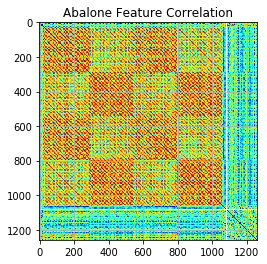

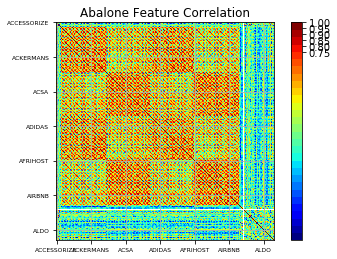

In [112]:
correlation_matrix(df=boe_corr_df,labels=labels)

In [ ]:
amount_corr_df

In [ ]:
amount_corr_df=pd.DataFrame(index=gf.index)
hf=gf['amount_201704'].div(gf['amount_201703'], axis=0)
amount_corr_df['amount_201704']=hf

In [ ]:
amount_corr_df

In [ ]:
inds=np.where(df[amount_col].notnull())[0]

In [ ]:
df.loc[inds,[amount_col, 'franchisename']]